# **Evaluating destinations of Key Stage 5 students (across Level 1 - 3)**
The objective of this notebook is to evaluate destinations of Key Stage 5 students (typically aged 16–18) pursuing Level 1–3 qualifications. These students face varying NEET (Not in Education, Employment or Training) risks, influenced by overlapping social, educational, and personal factors.

Using this analysis to develop machine learning models which can predict lower outcome destination percentages for Level 1–3 students enables targeted interventions, resource optimization, and systemic improvements.

# **1. Data Collection & Understanding**

Based on the meta file, we can gather that the primary dataset (england_ks5-studest.csv) for this analysis provides detailed information on the destinations of students who completed Key Stage 5 (ages 16-18) qualifications in England during the 2023/24 academic year. This data, structured at the school or college level (RECTYPE 1), and also aggregated at the local authority (RECTYPE 4) and national levels (RECTYPE 5 and 7), offers a comprehensive view of post-study pathways across various qualification levels.

The dataset includes several key identifiers for each educational institution, such as the Local Authority number (LEA), Establishment number (ESTAB), Unique Reference Number (URN), and the institution's name (SCHNAME). The type of institution is also specified (NFTYPE), encompassing a wide range from academies and colleges to free schools and special schools. A 'feeder flag' (FEEDER) indicates institutions that typically send students to sixth form centres or consortia.

Crucially, the dataset provides a detailed breakdown of student destinations following their 16-18 study. For the **total cohort of students (TOT_COHORT)**, encompassing all levels of study, it captures the number and percentage of students progressing to various pathways, including staying in education or employment for at least two terms (TOT_OVERALL, TOT_OVERALLPER), entering apprenticeships (TOT_APPREN, TOT_APPRENPER), continuing in further education (level 3 and below: TOT_FE, TOT_FEPER), entering higher education (level 4 and above: TOT_HE, TOT_HEPER), and other education destinations (TOT_OTHER_EDU, TOT_OTHER_EDUPER).

Furthermore, the dataset identifies students who did not sustain education or employment for at least two terms (TOT_NOT_SUSTAINED, TOT_NOT_SUSTAINEDPER) and those whose activity was not captured in the data (TOT_NOT_CAPTURED, TOT_NOT_CAPTUREDPER). This latter category might include students moving abroad or engaging in activities outside of UK education or employment.

A significant aspect of this dataset is the inclusion of information specifically for students identified as **'disadvantaged'** (indicated by the '_DIS' suffix in field names) and those **'not identified as disadvantaged'** (indicated by '_NONDIS') across all qualification levels. This allows for comparative analysis of destination outcomes based on socio-economic background. The same detailed destination breakdowns (overall, apprenticeships, education, FE, HE, other education, not sustained, not captured) are provided separately for these two groups for the **total cohort**.

In addition to the overall cohort, the dataset provides a specific focus on the destinations of students who pursued **Level 3 qualifications** (indicated by the 'L3_' prefix in field names). This includes the cohort size (L3_COHORT) and the number and percentage of students in each destination category (L3_OVERALL, L3_APPREN, L3_EDUCATION, L3_FE, L3_HE, L3_OTHER_EDU, L3_EMPLOYMENT, L3_NOT_SUSTAINED, L3_NOT_CAPTURED, and their corresponding percentages). These Level 3 outcomes are also broken down for disadvantaged and non-disadvantaged students.

While the provided metadata primarily details fields related to the total cohort and Level 3 qualifications, it's important to note that the 'Further education (level 3 and below)' category (TOT_FE, TOT_FEPER, and similarly for disadvantaged and non-disadvantaged students) implicitly includes students pursuing **Level 2 and Level 1 qualifications**, as well as other qualifications below Level 3.

The structure of the dataset, with its comprehensive coverage of overall destinations, specific Level 3 outcomes, and breakdowns by disadvantage, provides a valuable resource for understanding the post-study trajectories of Key Stage 5 students. Further exploration of the 'Further education (level 3 and below)' data will yield more granular insights into the destinations of students with Level 1 and Level 2 qualifications and other qualifications below Level 3.

This rich dataset forms the foundation for our analysis of Key Stage 5 outcomes across all qualification levels and the development of predictive models for identifying students at higher risk of lower outcome destinations.

In [ ]:
"""
DATA SCIENCE NOTEBOOK INITIALIZATION
------------------------------------
This section imports essential packages for:
- Data loading/cleaning (pandas/numpy)
- Visualization (matplotlib/seaborn)
- Environment configuration (warnings)

Note: Warning suppression is temporary for cleaner output during development.
Always validate warnings in final analysis.
"""
# Importing core data manipulation and analysis libraries
import pandas as pd  # Primary library for dataframes and structured data operations
import numpy as np   # Foundational package for numerical computing and array operations

# Data visualization libraries
import matplotlib.pyplot as plt  # Base plotting library (static, animated, and interactive visualizations)
import seaborn as sns           # High-level interface for statistical graphics (built on matplotlib)

# Warning configuration
import warnings
warnings.filterwarnings('ignore')  # Suppress runtime warnings to keep notebook output clean
                                  # (Use cautiously - may hide important issues. Remove during debugging.)

In [ ]:
# Load the Key Stage 5 student destinations dataset into a pandas DataFrame.
# This DataFrame will be the primary data structure used for analysis and model development.
ks5_destination_df = pd.read_csv('/content/england_ks5-studest.csv')

In [ ]:
# Display the first 5 rows of the 'census_df' DataFrame.
# This provides a quick initial look at the structure and content of the dataset,
# including the column names and some sample values. It's useful for verifying
# that the data has been loaded correctly and to get a feel for the variables.
# census_df.head()

In [ ]:
# Display the first 5 rows of the 'ks5_destination_df' DataFrame.
# This provides a quick initial look at the structure and content of the dataset,
# including the column names and some sample values. It's useful for verifying
# that the data has been loaded correctly and to get a feel for the variables.
ks5_destination_df.head()

RECTYPE    LEA   ESTAB       URN                 SCHNAME NFTYPE  FEEDER  \
0       1  202.0  4000.0  137181.0         The UCL Academy     AC     0.0   
1       1  202.0  4104.0  100049.0       Haverstock School     CY     0.0   
2       1  202.0  4166.0  100050.0  Parliament Hill School     CY     1.0   
3       1  202.0  4196.0  100051.0      Regent High School     CY     0.0   
4       1  202.0  4275.0  100052.0        Hampstead School     CY     0.0   

   ICLOSE  TOT_COHORT TOT_OVERALL  ... LALLOTH_NOT_CAPTURED_NONDIS  \
0     0.0         137         125  ...                        SUPP   
1     0.0          81          61  ...                        SUPP   
2     0.0         140         116  ...                         NaN   
3     0.0          75          62  ...                         NaN   
4     0.0         117          93  ...                        SUPP   

  LALLOTH_OVERALLPER_NONDIS LALLOTH_APPRENPER_NONDIS  \
0                      SUPP                     SUPP   
1                      SUPP                     SUPP   
2                       NaN                      NaN   
3                       NaN                      NaN   
4                      SUPP                     SUPP   

  LALLOTH_EDUCATIONPER_NONDIS LALLOTH_FEPER_NONDIS LALLOTH_HEPER_NONDIS  \
0                        SUPP                 SUPP                 SUPP   
1                        SUPP                 SUPP                 SUPP   
2                         NaN                  NaN                  NaN   
3                         NaN                  NaN                  NaN   
4                        SUPP                 SUPP                 SUPP   

  LALLOTH_OTHER_EDUPER_NONDIS LALLOTH_EMPLOYMENTPER_NONDIS  \
0                        SUPP                         SUPP   
1                        SUPP                         SUPP   
2                         NaN                          NaN   
3                         NaN                          NaN   
4                        SUPP                         SUPP   

  LALLOTH_NOT_SUSTAINEDPER_NONDIS LALLOTH_NOT_CAPTUREDPER_NONDIS  
0                            SUPP                           SUPP  
1                            SUPP                           SUPP  
2                             NaN                            NaN  
3                             NaN                            NaN  
4                            SUPP                           SUPP  

[5 rows x 236 columns]

# **2. Data Cleaning - Key Stage 5 Destination Dataset**
Before diving into Exploratory Data Analysis (EDA), it's essential to ensure the quality and integrity of our Key Stage 5 destinations dataset through a thorough data cleaning process. This stage focuses on identifying and rectifying issues that could lead to inaccurate or misleading insights during EDA and subsequent modeling.

Key steps in this data cleaning phase include:

* **Handling Missing Values:** We will identify columns with missing data and implement appropriate strategies to address them.

* **Data Type Correction:** We will verify that the data type assigned to each column accurately reflects the nature of the information it contains. Incorrect data types can hinder analysis and modeling, so we will convert columns (e.g., from string to numeric) as necessary.

* **Identifying and Resolving Inconsistencies:** This involves scrutinizing the data for any inconsistencies, such as variations in the representation of categorical values (e.g., different spellings or capitalizations), unexpected or invalid entries, and ensuring uniformity across the dataset.

* **Handling Duplicates:** We will check for and manage any duplicate records that might skew our analysis. The decision on whether to remove duplicates will depend on the context and whether they represent genuine repeated entries or different instances.

* **Addressing Suppressed Values (SUPP):** The dataset contains values denoted as "SUPP," which stands for "Suppressed." According to the data's conventions, data for a specific establishment is typically suppressed when the number of pupils or students covered by a particular measure is 5 or fewer (or 10 or fewer for destination measures). These suppressed values are intended to protect the anonymity of small groups of students. During the cleaning process, we will need to decide how to handle these "SUPP" entries. This might involve treating them as missing values and applying our chosen missing value strategy, or it could require a more nuanced approach depending on the specific analysis being conducted. It's crucial to be aware of the implications of these suppressed values on our overall understanding and modeling efforts.

* **Initial Outlier Detection:** While a more in-depth outlier analysis might occur during EDA, we will perform an initial scan for obvious or problematic outliers that could indicate data entry errors or other issues requiring attention before further exploration.

* **Filtering and Structuring:** As demonstrated in the previous step, this might involve filtering the dataset to focus on relevant levels of aggregation (e.g., removing LA and NAT level data) to ensure that subsequent EDA is performed on the appropriate unit of analysis.

The specific cleaning steps undertaken and the rationale behind them will be carefully documented in the corresponding code cells. The goal of this rigorous data cleaning process is to create a reliable and consistent dataset that forms a solid foundation for meaningful Exploratory Data Analysis, leading to more accurate insights and robust machine learning models.

In [ ]:
# Get a concise summary of the first 100 columns of the 'ks5_destination_df' DataFrame.
# The .info() method provides essential details about the DataFrame, including:
# - The number of rows (entries).
# - The number of columns (non-null).
# - The data type of each column.
# - The number of non-null values in each column.
# - The memory usage of the DataFrame.
# By focusing on the first 100 columns (using .iloc[:,:100]), we can efficiently
# inspect a significant portion of the dataset's structure and data types,
# especially when dealing with a wide DataFrame. This helps in understanding
# the initial data composition and identifying potential data quality issues
# like missing values or incorrect data types that might require preprocessing.
ks5_destination_df.iloc[:,:100].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 100 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   RECTYPE                      2290 non-null   object 
 1   LEA                          2289 non-null   float64
 2   ESTAB                        2140 non-null   float64
 3   URN                          2140 non-null   float64
 4   SCHNAME                      2140 non-null   object 
 5   NFTYPE                       2129 non-null   object 
 6   FEEDER                       2129 non-null   float64
 7   ICLOSE                       2140 non-null   float64
 8   TOT_COHORT                   2290 non-null   int64  
 9   TOT_OVERALL                  2290 non-null   object 
 10  TOT_APPREN                   2290 non-null   object 
 11  TOT_EDUCATION                2290 non-null   object 
 12  TOT_FE                       2290 non-null   object 
 13  TOT_HE           

In [ ]:
# Get a concise summary of columns 100 to 199 (inclusive) of the 'ks5_destination_df' DataFrame.
# Similar to the previous .info() call
ks5_destination_df.iloc[:,100:200].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 100 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   L3_EMPLOYMENTPER_DIS        2278 non-null   object 
 1   L3_NOT_SUSTAINEDPER_DIS     2278 non-null   object 
 2   L3_NOT_CAPTUREDPER_DIS      2278 non-null   object 
 3   L3_COHORT_NONDIS            2278 non-null   object 
 4   L3_OVERALL_NONDIS           2278 non-null   object 
 5   L3_APPREN_NONDIS            2278 non-null   object 
 6   L3_EDUCATION_NONDIS         2278 non-null   object 
 7   L3_FE_NONDIS                2278 non-null   object 
 8   L3_HE_NONDIS                2278 non-null   object 
 9   L3_OTHER_EDU_NONDIS         2278 non-null   object 
 10  L3_EMPLOYMENT_NONDIS        2278 non-null   object 
 11  L3_NOT_SUSTAINED_NONDIS     2278 non-null   object 
 12  L3_NOT_CAPTURED_NONDIS      2278 non-null   object 
 13  L3_OVERALLPER_NONDIS        2278

### Observations from `.describe()`

The output of the `.describe()` method reveales a significant range between the minimum and maximum values for several numerical columns. This vast range is likely influenced by the inclusion of aggregated data at the Local Authority (LA) and National (NAT) levels within the dataset. These aggregated rows represent summaries across multiple schools or colleges, naturally leading to larger values compared to individual institution-level data.

**To ensure a more meaningful and accurate Exploratory Data Analysis (EDA) focused on individual school and college characteristics, it will be necessary to filter out these LA and NAT level aggregate rows.** This step will allow for a clearer understanding of the distribution and relationships within the core unit of analysis – the individual educational institutions.

In [ ]:
# Generate descriptive statistics for the numerical columns in the 'ks5_destination_df' DataFrame.
# The .describe() method calculates and returns several key statistical measures for each
# numerical column, including:
# - count: The number of non-missing values.
# - mean: The average value.
# - std: The standard deviation, indicating the spread of the data.
# - min: The minimum value.
# - 25%: The 25th percentile (the value below which 25% of the data falls).
# - 50%: The 50th percentile (the median, the middle value).
# - 75%: The 75th percentile (the value below which 75% of the data falls).
# - max: The maximum value.
# This provides a high-level overview of the distribution and central tendency of the
# numerical features in the dataset, which can be helpful for identifying potential
# outliers, understanding the scale of different variables, and getting a general
# sense of the data's characteristics before more in-depth analysis.
ks5_destination_df.describe()

LEA        ESTAB            URN       FEEDER       ICLOSE  \
count  2289.000000  2140.000000    2140.000000  2129.000000  2140.000000   
mean    665.581477  5079.400935  134453.250000     0.019728     0.006542   
std     278.961264  1380.618165   11098.536411     0.139095     0.080637   
min     202.000000  2006.000000  100049.000000     0.000000     0.000000   
25%     336.000000  4032.000000  134032.250000     0.000000     0.000000   
50%     839.000000  4501.000000  137105.500000     0.000000     0.000000   
75%     888.000000  5411.000000  139826.000000     0.000000     0.000000   
max     943.000000  8609.000000  150001.000000     1.000000     1.000000   

          TOT_COHORT      L3_COHORT     L2_COHORT  LALLOTH_COHORT  
count    2290.000000    2278.000000   1286.000000     1823.000000  
mean      698.154585     525.191396    165.845257      103.736149  
std     11255.841125    8423.525376   2020.070679     1505.171701  
min         1.000000       1.000000      1.000000        1.000000  
25%        69.000000      65.000000      1.000000        1.000000  
50%       116.000000     113.000000      4.000000        3.000000  
75%       197.000000     189.750000     43.000000        8.000000  
max    536200.000000  400297.000000  72026.000000    63877.000000

In [ ]:
# Display the frequency of each unique value in the 'RECTYPE' column to understand data aggregation levels.
ks5_destination_df['RECTYPE'].value_counts()

RECTYPE
1      2129
LA      149
3        11
NAT       1
Name: count, dtype: int64

In [ ]:
# Remove the last row of the 'ks5_destination_df' DataFrame.
# This step is taken based on the understanding that the last row contains
# a specific type of aggregate data (e.g., a final national summary or a total)
# that is not suitable for school/college-level EDA.
ks5_destination_df = ks5_destination_df.drop(ks5_destination_df.index[-1])

# Filter the 'ks5_destination_df' DataFrame to exclude rows where the 'RECTYPE'
# column is equal to 'LA'.
# Based on the metadata, 'LA' represents Local Authority level aggregate data.
# For the purpose of performing EDA at the school and college level, these
# aggregated rows are not relevant and are therefore removed. This ensures that
# subsequent analyses focus on the individual educational institutions.
ks5_destination_df = ks5_destination_df[ks5_destination_df['RECTYPE'] != 'LA']

In [ ]:
ks5_destination_df.describe()

LEA        ESTAB            URN       FEEDER       ICLOSE  \
count  2140.000000  2140.000000    2140.000000  2129.000000  2140.000000   
mean    669.000000  5079.400935  134453.250000     0.019728     0.006542   
std     278.731965  1380.618165   11098.536411     0.139095     0.080637   
min     202.000000  2006.000000  100049.000000     0.000000     0.000000   
25%     336.000000  4032.000000  134032.250000     0.000000     0.000000   
50%     840.000000  4501.000000  137105.500000     0.000000     0.000000   
75%     891.000000  5411.000000  139826.000000     0.000000     0.000000   
max     943.000000  8609.000000  150001.000000     1.000000     1.000000   

        TOT_COHORT    L3_COHORT    L2_COHORT  LALLOTH_COHORT  
count  2140.000000  2128.000000  1138.000000     1673.000000  
mean    247.689252   187.269737    61.309315       36.924686  
std     460.018733   282.048360   158.041930      112.627829  
min       1.000000     1.000000     1.000000        1.000000  
25%      67.000000    62.000000     1.000000        1.000000  
50%     109.000000   105.000000     3.000000        3.000000  
75%     172.000000   167.000000    12.000000        5.000000  
max    5416.000000  2917.000000  1368.000000     1192.000000

As highlighted by the descriptive statistics, the inclusion of aggregated data at the Local Authority (LA) and National (NAT) levels can skew our understanding of individual school and college performance and student destinations. To focus our Exploratory Data Analysis (EDA) on the characteristics of these individual educational institutions, we have undertaken a filtering process.

First, based on initial inspection, we identified and removed any potential summary rows at the very end of the dataset. In this case, the last row appeared to represent an aggregate that was not relevant for our school/college-level analysis.

Subsequently, we filtered the DataFrame to exclude rows where the 'RECTYPE' column indicated Local Authority level data. According to the dataset's metadata, different integer codes in the 'RECTYPE' column specify the level of aggregation. By excluding rows with the code corresponding to 'Local Authority' ('LA'), we are isolating the records pertaining to individual schools and colleges.

This filtering step is crucial for ensuring that our EDA provides meaningful insights into the variations and patterns at the level of the educational institutions themselves, which is essential for understanding the factors influencing student destinations and for developing effective predictive models.

## Visualisation of Missing Values

During the data cleaning phase, a crucial step involves identifying and addressing missing values within our Key Stage 5 destinations dataset. Missing data can arise for various reasons and, if not handled appropriately, can introduce bias and reduce the reliability of our subsequent analysis and machine learning models.

Our approach to handling missing values will involve the following steps:

1.  **Identification:** We will first identify the columns that contain missing values and quantify the extent of missingness in each. This will help us understand the scope of the issue.

2.  **Analysis of Missingness:** We will investigate the patterns of missing data. Are the missing values randomly distributed, or is there a systematic reason for their absence? Understanding the underlying causes of missingness can inform our handling strategy.

In [ ]:
# Calculate the number of missing values (NaN) in each column of the 'ks5_destination_df' DataFrame.
# The `.isna()` method returns a DataFrame of boolean values, where True indicates a missing value.
# `.sum()` then aggregates these boolean values for each column, effectively counting the number of True values (missing values).
# `.sort_values(ascending=False)` sorts the resulting Series in descending order, displaying the columns with the most missing values at the top.
# This step is crucial for understanding the extent of missing data across different features,
# informing decisions on how to handle these missing values during the data cleaning process
# (e.g., imputation, removal). Identifying columns with significant missingness early on is essential.
ks5_destination_df.isna().sum().sort_values(ascending=False)

L2_EMPLOYMENT_NONDIS     1002
L2_OTHER_EDU_NONDIS      1002
L2_HE_NONDIS             1002
L2_FE_NONDIS             1002
L2_EDUCATION_NONDIS      1002
                         ... 
TOT_EDUCATIONPER_DIS        0
TOT_FEPER_DIS               0
TOT_EMPLOYMENTPER_DIS       0
TOT_OTHER_EDUPER_DIS        0
TOT_EDUCATION               0
Length: 236, dtype: int64

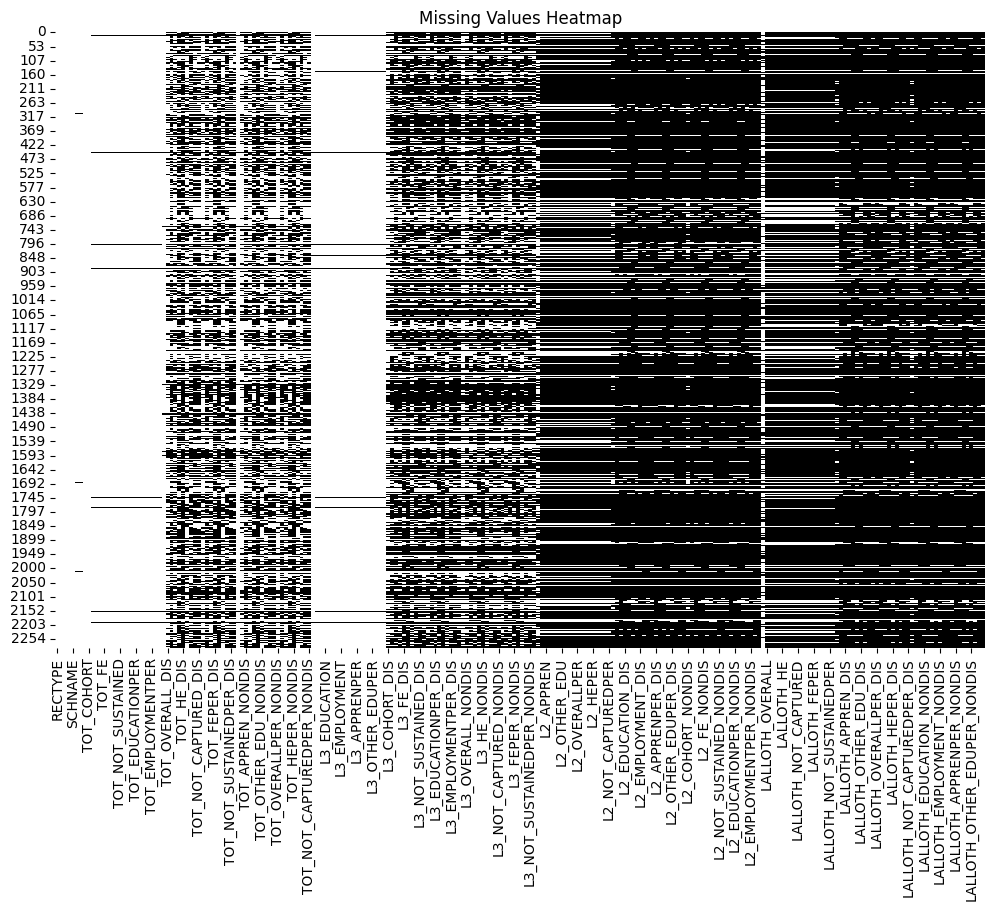

In [ ]:
# Replace all occurrences of the string 'SUPP' in the 'ks5_destination_df' DataFrame with the NumPy NaN (Not a Number) value.
# This step is crucial because 'SUPP' likely represents suppressed data, which we want to treat as missing values
# for consistent handling in subsequent analysis and visualization. Using np.nan allows us to leverage pandas'
# built-in functionalities for dealing with missing data.
nan_ks5_destination_df_df = ks5_destination_df.replace('SUPP', np.nan)

# Create a heatmap to visualize the pattern of missing values in the DataFrame after replacing 'SUPP' with NaN.
# plt.figure(figsize=(12, 8)) sets the size of the plot for better readability, adjust the dimensions as needed
# based on the number of columns in your DataFrame.
plt.figure(figsize=(12, 8))
# sns.heatmap() generates the heatmap.
# The first argument (nan_ks5_destination_df_df.isnull()) provides the data for the heatmap:
#   - .isnull() returns a boolean DataFrame where True indicates a NaN (missing) value and False otherwise.
# The 'cbar=False' argument hides the color bar, as we are only interested in the presence or absence of missing data.
# The 'cmap='binary'' argument uses a binary colormap (e.g., white for non-missing, black for missing) for a clear visual distinction.
sns.heatmap(nan_ks5_destination_df_df.isnull(), cbar=False, cmap='binary')
# plt.title() sets the title of the heatmap for better context and interpretation.
plt.title('Missing Values Heatmap')
# plt.show() displays the generated heatmap. This visualization helps in identifying if there are any
# patterns in the missing data across different columns, which can inform our missing value handling strategies.
plt.show()

To gain a clearer understanding of the distribution of missing values (including those originally represented as "SUPP"), we generated a heatmap. In this visualization, each row represents a record (educational institution), and each column represents a variable. White cells indicate non-missing values, while black cells highlight the presence of missing data.

The heatmap provides a visual overview of the missingness patterns across the dataset. Several observations can be made:

* **Columns with Extensive Missingness:** Certain columns appear to have a significant number of missing values, indicated by long vertical bands of black. These columns might require careful consideration regarding our missing value handling strategy (e.g., imputation or potential removal).
* **Patterns of Missingness:** We can observe if the missing values occur randomly or if there are patterns. For instance, some rows might have missing values across a set of related columns, suggesting a common underlying reason for the data suppression or absence.
* **Comparison Across Qualification Levels:** The heatmap allows us to visually compare the extent of missingness in columns related to different qualification levels (e.g., 'TOT\_', 'L3\_', 'L2\_', 'L1\_', 'OTHER\_QUAL\_'). This can inform our understanding of data availability for different student cohorts.
* **Disadvantaged vs. Non-Disadvantaged:** By examining columns with the '\_DIS' and '\_NONDIS' suffixes, we can also visually assess if there are notable differences in missing data patterns between these student groups.

This visual representation complements the numerical summary of missing values obtained earlier, providing a more intuitive way to identify potential data quality issues and guide our subsequent data preprocessing decisions. Based on these patterns, we can now make more informed choices about how to handle the missing data in each column to ensure the robustness of our analysis and modeling efforts.

## Segmenting the Dataset by Qualification Level

Following the visualization of missing values, our next step is to segment the primary dataset (`ks5_destination_df`) into distinct DataFrames based on the qualification level of the students. This strategic separation is driven by several key considerations:

* **Targeted Analysis:** Our primary objective is to evaluate destinations for students pursuing Level 1-3 qualifications. By creating separate DataFrames for each level, we can perform more focused and granular analysis on the specific cohorts of interest. This allows us to identify trends and patterns unique to each qualification level.

* **Addressing Potential Heterogeneity:** Student characteristics, the factors influencing their destinations, and the nature of missing data might vary significantly across different qualification levels. Analyzing the data separately initially can help us account for this heterogeneity and understand the unique data landscape for each level before a potential combined analysis.

* **Preparing for Integrated Modeling with Qualification Level as a Feature:** While we plan to combine these datasets later and incorporate 'Qualification Level' as a feature in our machine learning models, the initial separation allows us to:
    * **Handle Level-Specific Data Cleaning and Preprocessing:** We can apply cleaning and preprocessing steps that are particularly relevant or necessary for each qualification level before merging. For example, the extent of missingness or the distribution of certain features might differ significantly across levels, requiring tailored treatment.
    * **Perform Level-Specific Exploratory Data Analysis:** Understanding the baseline destination outcomes and the relationships between variables within each qualification level independently will provide valuable context when we later analyze the combined dataset with 'Qualification Level' as a unifying feature. This initial separate EDA can inform feature engineering and model selection for the integrated approach.

* **Clearer Initial Reporting and Interpretation:** Presenting the initial analysis separately for Level 1, Level 2, Level 3, and other qualifications can enhance the clarity and interpretability of our preliminary findings before moving to a more integrated modeling approach.

To achieve this segmentation, we will utilize the column prefixes in our dataset (e.g., 'L1\_', 'L2\_', 'L3\_') to identify the relevant columns for each qualification level. We will then create new DataFrames containing only these columns, along with any common identifying columns such as school/college information. This structured approach will enable a more systematic and effective initial evaluation of student destinations across the different qualification pathways, laying the groundwork for a later combined analysis where 'Qualification Level' will serve as an important feature.

In [ ]:
# Select the first 8 columns of the 'ks5_destination_df' DataFrame and store them in the 'school_detail_columns' list.
# These columns are contain identifying information about the schools or colleges,
# such as record type, local authority, establishment number, URN, school name, etc.
school_detail_columns = [i for i in ks5_destination_df.columns][:8]

# Create a list called 'L3_columns' containing all column names from 'ks5_destination_df' that start with the prefix 'L3_'.
# This prefix is assumed to denote columns specifically related to students pursuing Level 3 qualifications,
# such as cohort size, destination numbers, and destination percentages for this level.
L3_columns = [i for i in ks5_destination_df.columns if i.startswith('L3_')]

# Create a new DataFrame called 'L3_df' by selecting specific columns from the original 'ks5_destination_df'.
# The selected columns include all the 'school_detail_columns' (to maintain school/college identifiers)
# combined with all the 'L3_columns' (containing the Level 3 qualification data).
# This new DataFrame will contain information about each school/college along with the destination data
# specifically for their Level 3 students, facilitating focused analysis on this qualification level.
L3_df = ks5_destination_df[school_detail_columns + L3_columns]

In [ ]:
# Get a concise summary of the 'L3_df' DataFrame.
L3_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2140 entries, 0 to 2287
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RECTYPE                     2140 non-null   object 
 1   LEA                         2140 non-null   float64
 2   ESTAB                       2140 non-null   float64
 3   URN                         2140 non-null   float64
 4   SCHNAME                     2140 non-null   object 
 5   NFTYPE                      2129 non-null   object 
 6   FEEDER                      2129 non-null   float64
 7   ICLOSE                      2140 non-null   float64
 8   L3_COHORT                   2128 non-null   float64
 9   L3_OVERALL                  2128 non-null   object 
 10  L3_APPREN                   2128 non-null   object 
 11  L3_EDUCATION                2128 non-null   object 
 12  L3_FE                       2128 non-null   object 
 13  L3_HE                       2128 non-n

In [ ]:
# Calculate and display the total number of missing values (NaN) specifically within the 'L3_COHORT' column of the 'L3_df' DataFrame.
# The 'L3_COHORT' column represents the number of students who reached the end of their 16 to 18 study in 2023/24 at Level 3 for each school/college.
# `.isna()` returns a boolean Series where True indicates a missing value in the 'L3_COHORT' column.
# `.sum()` then aggregates these True values, giving us the total count of missing entries in this crucial column.
# Understanding the number of missing values in the Level 3 cohort size is important as it forms the basis for many percentage calculations and overall analysis of this qualification level.
L3_df['L3_COHORT'].isna().sum()

np.int64(12)

In [ ]:
# Remove rows from the 'L3_df' DataFrame where the value in the 'L3_COHORT' column is missing (NaN).
# The `dropna()` method with the `subset` argument ensures that we only drop rows that have a missing value
# in the specified column ('L3_COHORT').
# Since the cohort size is a fundamental piece of information for calculating percentages and understanding
# the scale of student outcomes at Level 3, rows with missing cohort data are often removed to avoid
# errors or inaccuracies in subsequent analyses focused on Level 3 students. This step ensures that
# all remaining records in 'L3_df' have a valid number of students in the Level 3 cohort.
L3_df = L3_df.dropna(subset=['L3_COHORT'])

Handling Missing Values in Qualification Level Cohort Data

A critical step in preparing the qualification level student destinations data for analysis is addressing missing values, particularly in the `L3_COHORT` column for the `L3_df` DataFrame. These columns represent the total number of students who completed their studies at each institution for the specific qualification level and serve as the essential denominator for calculating destination percentages.

Given the fundamental role of the cohort size in understanding and comparing destination outcomes across different educational institutions, rows with missing `_COHORT` values pose a significant challenge. Without a valid cohort size, we cannot accurately calculate or interpret the percentages of students progressing to various destinations. Including records with missing cohort data could lead to skewed analyses and potentially misleading conclusions about student outcomes at each qualification level.

Therefore, for each qualification-specific DataFrame, we have applied the `dropna(subset=['[QUALIFICATION_PREFIX]_COHORT'])` method. For instance, in the case of `L3_df`, we removed rows where the `L3_COHORT` value is missing. This ensures that all subsequent analyses focusing on destinations for a particular qualification level are based on complete and reliable cohort data. While removing data can lead to a loss of information, in this specific case, retaining records with an unknown cohort size would be more detrimental to the accuracy and interpretability of our analysis for that level.

By removing these rows, we are prioritizing the integrity and reliability of the data for each qualification level, ensuring that our subsequent explorations and modeling efforts are grounded in accurate representations of student progression. This consistent approach will be followed when cleaning the `L2_df` and `LALLOTH_df` DataFrames.

In [ ]:
# --- Create and Clean DataFrames for Specific Qualification Levels ---
# This section creates separate DataFrames for Level 2 and Level 1/Other Qualifications
# by selecting relevant columns from the main dataset and handling missing cohort data.

# Level 2 Data:
# - Identify columns starting with 'L2_' to capture Level 2 specific data (cohort, destinations).
L2_columns = [i for i in ks5_destination_df.columns if i.startswith('L2_')]
# - Create the 'L2_df' DataFrame by combining school details with Level 2 data.
L2_df = ks5_destination_df[school_detail_columns + L2_columns]
# - Remove rows with missing 'L2_COHORT' values to ensure reliable Level 2 analysis.
L2_df = L2_df.dropna(subset=['L2_COHORT'])

# Level 1 and Other Qualifications Data:
# - Identify columns starting with 'LALLOTH_' for Level 1 and other qualifications data.
LALLOTH_columns = [i for i in ks5_destination_df.columns if i.startswith('LALLOTH_')]
# - Create the 'LALLOTH_df' DataFrame by combining school details with Level 1/Other data.
LALLOTH_df = ks5_destination_df[school_detail_columns + LALLOTH_columns]
# - Remove rows with missing 'LALLOTH_COHORT' values for reliable analysis of this group.
LALLOTH_df = LALLOTH_df.dropna(subset=['LALLOTH_COHORT'])

In [ ]:
# Get a concise summary of the 'L2_df' DataFrame *after* dropping rows with missing 'L2_COHORT' values.
# The .info() method now helps us verify the impact of the `dropna()` operation by showing:
# - The updated number of rows (which should be less than or equal to the number before dropping).
# - The data types of the remaining columns.
# - The number of non-null values in each column. We should specifically check that the 'L2_COHORT'
#   column now has the same number of non-null values as the total number of rows, confirming that
#   missing values in this crucial column have been successfully removed.
# This step is essential to ensure that our data cleaning process has had the intended effect and that
# we are proceeding with a DataFrame that has complete cohort information for Level 2 students.
L2_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1138 entries, 1 to 2287
Data columns (total 65 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   RECTYPE                     1138 non-null   object 
 1   LEA                         1138 non-null   float64
 2   ESTAB                       1138 non-null   float64
 3   URN                         1138 non-null   float64
 4   SCHNAME                     1138 non-null   object 
 5   NFTYPE                      1129 non-null   object 
 6   FEEDER                      1129 non-null   float64
 7   ICLOSE                      1138 non-null   float64
 8   L2_COHORT                   1138 non-null   float64
 9   L2_OVERALL                  1138 non-null   object 
 10  L2_APPREN                   1138 non-null   object 
 11  L2_EDUCATION                1138 non-null   object 
 12  L2_FE                       1138 non-null   object 
 13  L2_HE                       1138 non-n

In [ ]:
# Get a concise summary of the 'LALLOTH_df' DataFrame *after* dropping rows with missing 'LALLOTH_COHORT' values.
# The .info() method now helps us verify the impact of the `dropna()` operation by showing:
# - The updated number of rows (which should be less than or equal to the number before dropping).
# - The data types of the remaining columns.
# - The number of non-null values in each column. We should specifically check that the 'LALLOTH_COHORT'
#   column now has the same number of non-null values as the total number of rows, confirming that
#   missing values in this crucial column have been successfully removed.
# This step is essential to ensure that our data cleaning process has had the intended effect and that
# we are proceeding with a DataFrame that has complete cohort information for Level 1 and other
# qualifications.
LALLOTH_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1673 entries, 0 to 2287
Data columns (total 65 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   RECTYPE                          1673 non-null   object 
 1   LEA                              1673 non-null   float64
 2   ESTAB                            1673 non-null   float64
 3   URN                              1673 non-null   float64
 4   SCHNAME                          1673 non-null   object 
 5   NFTYPE                           1662 non-null   object 
 6   FEEDER                           1662 non-null   float64
 7   ICLOSE                           1673 non-null   float64
 8   LALLOTH_COHORT                   1673 non-null   float64
 9   LALLOTH_OVERALL                  1673 non-null   object 
 10  LALLOTH_APPREN                   1673 non-null   object 
 11  LALLOTH_EDUCATION                1673 non-null   object 
 12  LALLOTH_FE               

## Converting Percentage Columns to Numeric and Handling Suppressed Values

As part of our data cleaning and preparation for Exploratory Data Analysis (EDA) and modeling, we need to ensure that columns representing percentages are in a numerical format that can be readily used for calculations and visualizations. Upon initial inspection (potentially during the `.info()` or `.head()` steps), we may observe that percentage columns are currently stored as text (e.g., objects in pandas). This is due to the presence of non-numeric characters, such as the percentage symbol ('%'), and the presence of the string 'SUPP' indicating suppressed data.

To address this, we will undertake the following steps with the rationale outlined below:

1.  **Handling Suppressed Values ('SUPP'):** As previously discussed during our initial data cleaning, the value 'SUPP' signifies that the underlying data for a particular measure at an establishment has been suppressed, typically due to a very small number of students (5 or fewer, or 10 or fewer for destination measures). For analytical purposes, these suppressed values do not provide meaningful quantitative information and are essentially a form of missing data intended to protect student anonymity. Therefore, we will treat these 'SUPP' entries as null values (NaN - Not a Number). This will allow us to consistently apply our missing value handling strategies (which we have already started by dropping rows with missing cohort data) to these suppressed entries as well.

2.  **Converting Percentage Columns to Numeric:** Once the 'SUPP' values are converted to NaN, we can proceed with converting the remaining percentage values from text to a numeric format (float). This typically involves:
    * **Removing the Percentage Symbol:** We will remove the '%' character from each value in the percentage columns.
    * **Converting to Numeric:** After removing the symbol, we will use pandas functions (e.g., `pd.to_numeric()`) to convert the column's data type to a float. This will enable us to perform mathematical operations, calculate correlations, and effectively use these percentage features in our models and visualizations during EDA.

By performing these conversions and handling the suppressed values as missing data, we will create a cleaner and more analytically useful dataset, paving the way for robust Exploratory Data Analysis and the development of reliable predictive models.

In [ ]:
# Function to clean and convert columns in a DataFrame.
def clean_columns(df, qualification_columns):
    # Identify percentage columns.
    per_columns = [col for col in df.columns if 'PER' in col]
    # Identify numerical count columns.
    num_columns = [col for col in qualification_columns if 'PER' not in col]

    # Process percentage columns: replace 'SUPP' with NaN, remove '%', convert to numeric (0-1 scale).
    for col in per_columns:
        df[col] = df[col].replace('SUPP', np.nan)
        df[col] = pd.to_numeric(df[col].str.rstrip('%'), errors='coerce') / 100

    # Process numerical count columns: replace 'SUPP' with NaN, convert to numeric.
    for col in num_columns:
        df[col] = df[col].replace('SUPP', np.nan)
        df[col] = pd.to_numeric(df[col], errors='coerce')

In [ ]:
# --- Clean Columns for All Qualification Level DataFrames ---
# This section iterates through each of the qualification-specific DataFrames (L3_df, L2_df, LALLOTH_df)
# and applies the 'clean_columns' function. This function is designed to standardize the format of
# percentage and numerical count columns within each DataFrame, ensuring they are in a usable numeric
# format for subsequent analysis. It also handles the replacement of 'SUPP' values with NaN to treat
# suppressed data as missing. The respective column lists (L3_columns, L2_columns, LALLOTH_columns)
# are used to specify which columns within each DataFrame should be cleaned.

# Clean Level 3 data.
clean_columns(L3_df, L3_columns)

# Clean Level 2 data.
clean_columns(L2_df, L2_columns)

# Clean Level 1 and Other Qualifications data.
clean_columns(LALLOTH_df, LALLOTH_columns)

## Target Variable Development: Lower Outcome Percentage

The code block below focuses on developing a key target variable for subsequent analysis and potential modeling: the **Lower Outcome Percentage**. This variable aims to quantify the proportion of students at each qualification level who experience less positive post-study outcomes.

The rationale behind creating this target variable is to aggregate and normalize the counts of students in the 'Not Sustained' and 'Not Captured' destination categories. These categories are considered 'lower outcomes' as they represent students who may be at higher risk of becoming NEET (Not in Education, Employment, or Training) or for whom destination data is incomplete. By combining these counts and expressing them as a percentage of the total cohort for each qualification level, we achieve the following:

* **Normalization:** Dividing by the cohort size ('L3_COHORT', 'L2_COHORT', 'LALLOTH_COHORT') standardizes the measure across schools with varying numbers of students. This allows for a more meaningful comparison of the prevalence of lower outcomes, irrespective of the school's size.
* **Aggregation:** Combining the 'Not Sustained' and 'Not Captured' categories provides a single metric that captures the overall proportion of students facing potential challenges in their immediate post-qualification pathways or for whom data is lacking. This aggregated view can be useful for identifying schools or factors associated with a higher overall risk of less positive outcomes.
* **Target Variable Creation:** This calculated percentage ('LOWER_OUTCOME_PCT') can serve as a crucial target variable in predictive modeling efforts to identify school-level characteristics and student demographics that are associated with a higher percentage of lower outcomes.

**Implementation:**

The code performs this calculation separately for each qualification level:

1.  **Level 3:** For the `L3_df` DataFrame, a new column named `LOWER_OUTCOME_PCT` is created. Its values are calculated by summing the counts in the `L3_NOT_SUSTAINED` and `L3_NOT_CAPTURED` columns for each school and then dividing this sum by the corresponding `L3_COHORT`.

2.  **Level 2:** A similar process is applied to the `L2_df` DataFrame, creating the `LOWER_OUTCOME_PCT` column using the `L2_NOT_SUSTAINED`, `L2_NOT_CAPTURED`, and `L2_COHORT` columns.

3.  **Level 1 and Other Qualifications:** The same logic is used for the `LALLOTH_df` DataFrame, calculating `LOWER_OUTCOME_PCT` based on the `LALLOTH_NOT_SUSTAINED`, `LALLOTH_NOT_CAPTURED`, and `LALLOTH_COHORT` columns.

By developing this `LOWER_OUTCOME_PCT` target variable for each qualification level, we create a consistent and normalized metric that can be used for comparative analysis, visualization, and predictive modeling of less positive post-study outcomes.

In [ ]:
# --- Calculate Percentage of Lower Outcomes for Each Qualification Level ---
# This section calculates the percentage of students with combined lower progression outcomes
# ('NOT_SUSTAINED' + 'NOT_CAPTURED') relative to their respective total cohort sizes
# ('COHORT') for each qualification level's DataFrame. This normalization allows for
# comparison of these less positive outcomes across different sized cohorts.

# Calculate lower outcome percentage for Level 3.
L3_df['LOWER_OUTCOME_PCT'] = (
    L3_df['L3_NOT_SUSTAINED'] + L3_df['L3_NOT_CAPTURED']
) / L3_df['L3_COHORT']

# Calculate lower outcome percentage for Level 2.
L2_df['LOWER_OUTCOME_PCT'] = (
    L2_df['L2_NOT_SUSTAINED'] + L2_df['L2_NOT_CAPTURED']
) / L2_df['L2_COHORT']

# Calculate lower outcome percentage for Level 1 and Other Qualifications.
LALLOTH_df['LOWER_OUTCOME_PCT'] = (
    LALLOTH_df['LALLOTH_NOT_SUSTAINED'] + LALLOTH_df['LALLOTH_NOT_CAPTURED']
) / LALLOTH_df['LALLOTH_COHORT']

## Dropping Rows where Target Variable is missing
Rows where the LOWER_OUTCOME_PCT is missing (NaN) are removed from each DataFrame. This is a critical data cleaning step for the following reasons:

Target Variable Necessity: LOWER_OUTCOME_PCT serves as a key target variable for analysis and potential modeling. Rows lacking this value provide no information about the outcome we aim to understand or predict.

Preventing Errors in Analysis: Many statistical and machine learning techniques cannot process missing target values, leading to errors or biased results.

Focusing on Complete Records: Removing these rows ensures that subsequent analyses are conducted on a complete dataset with respect to the target variable, leading to more reliable insights.

Addressing Potential Data Issues: A missing target variable might indicate underlying data collection problems or inconsistencies for those specific records. Removing them can mitigate the impact of such issues.

By dropping rows with missing LOWER_OUTCOME_PCT, we ensure the integrity of our target variable and prepare the DataFrames for robust and accurate further analysis.

In [ ]:
L3_df['LOWER_OUTCOME_PCT'].isna().sum()

np.int64(11)

In [ ]:
L3_df = L3_df.dropna(subset='LOWER_OUTCOME_PCT')
L2_df = L2_df.dropna(subset='LOWER_OUTCOME_PCT')
LALLOTH_df = LALLOTH_df.dropna(subset='LOWER_OUTCOME_PCT')

# **3. Exploratory Data Analysis Across Qualification Levels**

With our datasets now cleaned and preprocessed for Level 3 (`L3_df`), Level 2 (`L2_df`), and Level 1 and Other Qualifications (`LALLOTH_df`), we can proceed with Exploratory Data Analysis (EDA). The primary goal of this stage is to gain a deeper understanding of the characteristics, distributions, and relationships within the destination data for each qualification level. By visualizing patterns and calculating descriptive statistics, we aim to uncover insights that will inform our subsequent modeling efforts and help us address our core objective of evaluating destination outcomes and identifying potential NEET risks.

Our EDA will be conducted systematically across all three qualification-specific DataFrames, allowing for comparisons and identification of commonalities and differences in destination trends. Key areas of focus for our exploration will include:

* **Distribution of Destination Outcomes:** For each qualification level, we will examine the distribution of students across various destination categories (e.g., Higher Education, Further Education, Apprenticeships, Employment, Not Sustained, Not Captured). This will involve creating visualizations such as bar charts, histograms, and pie charts to understand the prevalence of different pathways.

* **Cohort Size and Destination Counts:** We will explore the range and distribution of cohort sizes for each qualification level. Additionally, we will examine the absolute numbers of students in different destination categories to understand the scale of these outcomes.

* **Comparison of Destination Percentages Across Levels:** A central aspect of our EDA will be to compare the percentages of students progressing to different destinations across Level 3, Level 2, and Level 1/Other Qualifications. This will help us identify if there are significant differences in typical pathways based on the level of qualification achieved.

* **Analysis of 'Not Sustained' and 'Not Captured' Categories:** Understanding the factors associated with students who do not sustain education or employment or whose activity is not captured in the data is crucial for addressing NEET risk. We will analyze the prevalence of these categories across qualification levels and explore potential correlations with other variables.

* **Distribution of Disadvantaged vs. Non-Disadvantaged Students:** We will compare the destination outcomes for disadvantaged and non-disadvantaged students within each qualification level to identify any disparities.

Through this comprehensive EDA across the different qualification levels, we aim to build a strong empirical understanding of the factors influencing student destinations and to identify key patterns and potential areas of concern that will inform our subsequent machine learning model development. The insights gained will be crucial for tailoring interventions and optimizing resources to improve outcomes for all Key Stage 5 students.

In [ ]:
# --- Define Destination Column Lists for All Qualification Levels ---
# This section defines lists of column names that specify the different post-study destination categories
# for each of the qualification levels being analyzed (Level 3, Level 2, and Level 1/Other).
# These lists are structured to correspond to the columns within their respective DataFrames
# (L3_df, L2_df, LALLOTH_df) and will be used for targeted analysis and visualization of outcome patterns.
# The destination categories are consistent across all qualification levels to facilitate direct comparisons.

# Defines the destination columns for Level 3 students.
L3_destination_columns = ['L3_OVERALL', 'L3_EDUCATION',
                         'L3_APPREN', 'L3_FE', 'L3_HE', 'L3_OTHER_EDU',
                         'L3_EMPLOYMENT', 'L3_NOT_SUSTAINED', 'L3_NOT_CAPTURED'
                         ]

# Defines the destination columns for Level 2 students.
L2_destination_columns = ['L2_OVERALL', 'L2_EDUCATION',
                         'L2_APPREN', 'L2_FE', 'L2_HE', 'L2_OTHER_EDU',
                         'L2_EMPLOYMENT', 'L2_NOT_SUSTAINED', 'L2_NOT_CAPTURED'
                         ]

# Defines the destination columns for Level 1 and Other Qualifications students.
LALLOTH_destination_columns = ['LALLOTH_OVERALL', 'LALLOTH_EDUCATION',
                              'LALLOTH_APPREN', 'LALLOTH_FE', 'LALLOTH_HE', 'LALLOTH_OTHER_EDU',
                              'LALLOTH_EMPLOYMENT', 'LALLOTH_NOT_SUSTAINED', 'LALLOTH_NOT_CAPTURED'
                              ]

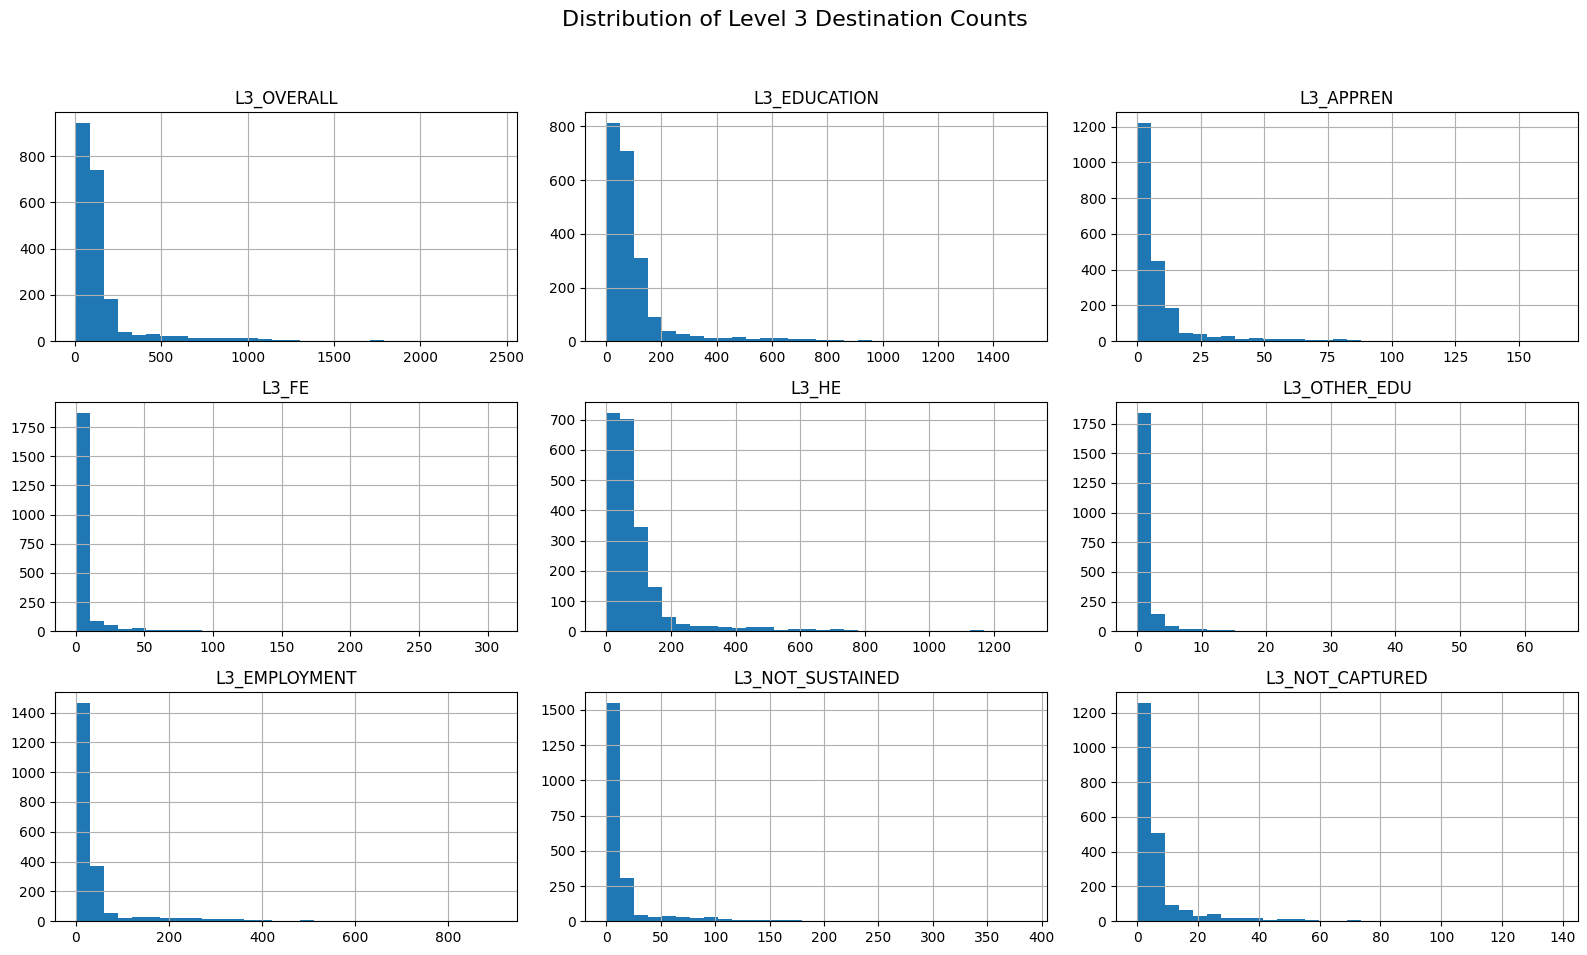

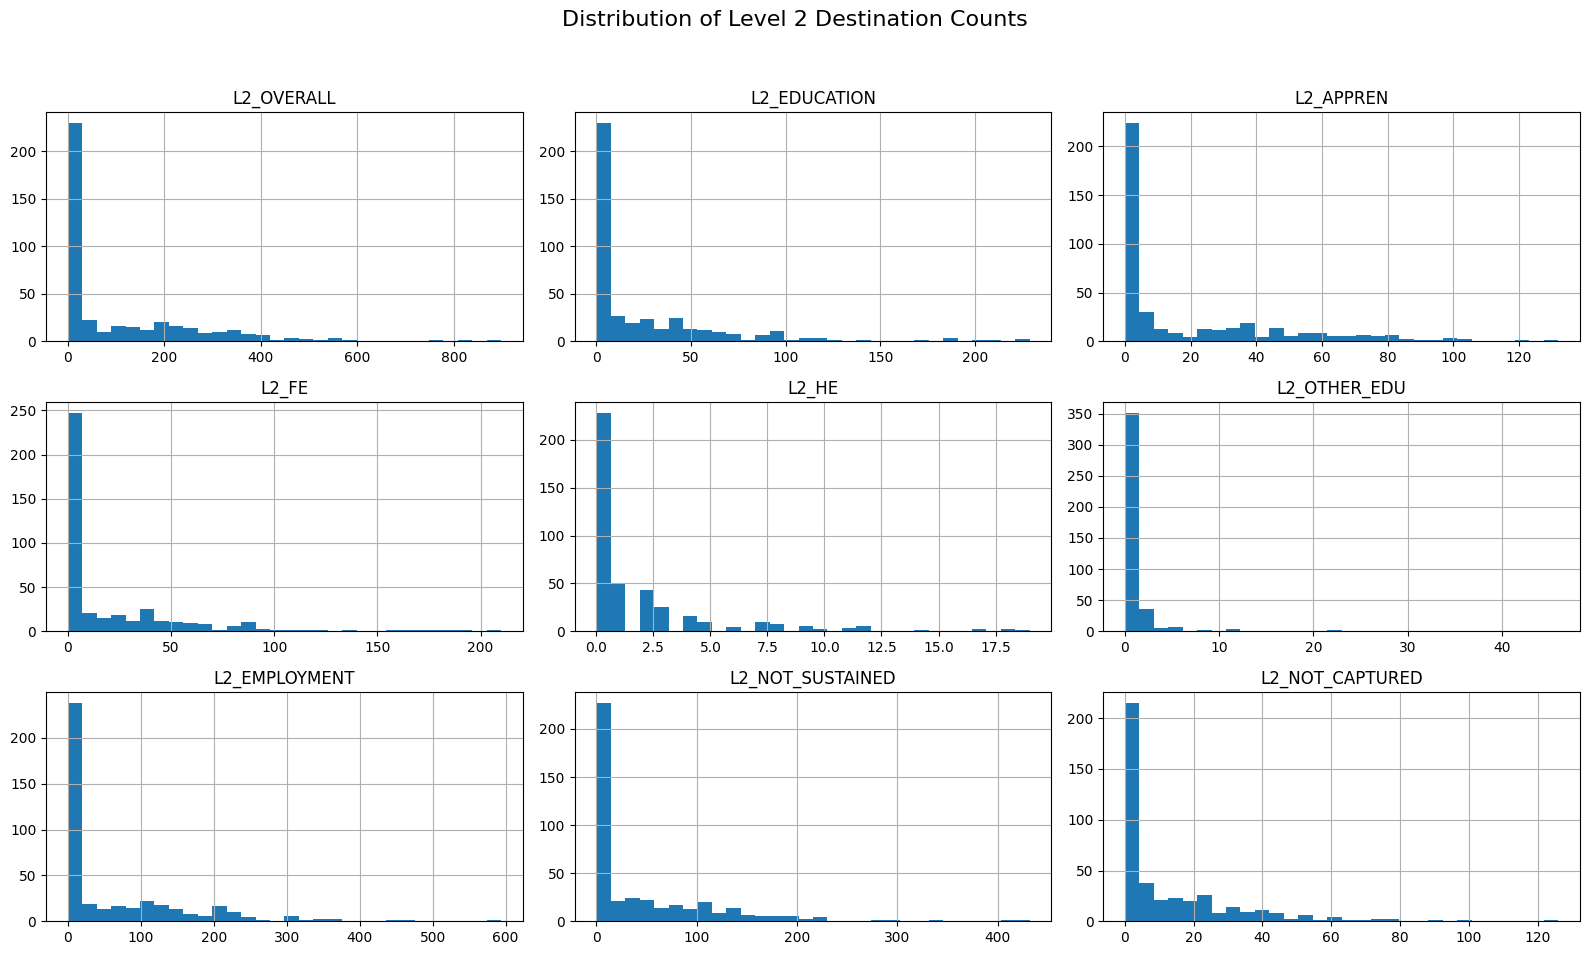

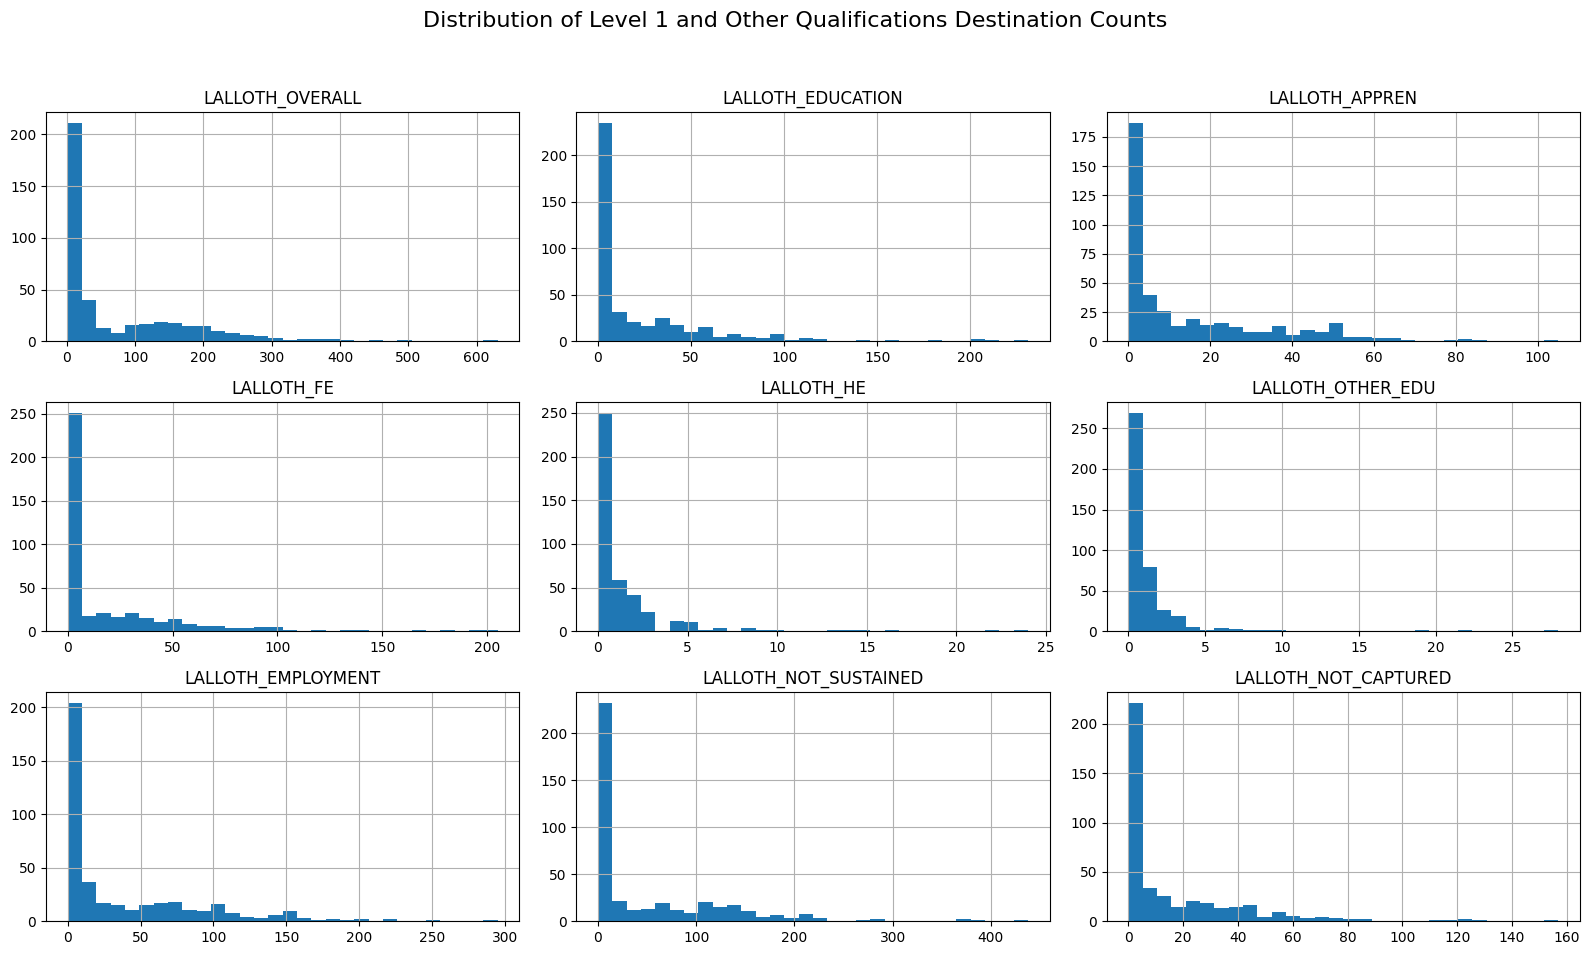

In [ ]:
# --- Distribution of Destination Counts by Qualification Level ---
# This section generates histograms to visualize the distribution of the number of students
# in each destination category for each qualification level (Level 3, Level 2, and Level 1/Other).

# For each qualification level's DataFrame and corresponding destination columns:
# - Call the .hist() method to create histograms for each destination count column.
#   - 'bins=30' controls the number of bins in each histogram.
#   - 'figsize=(16, 10)' sets the size of the figure for better readability.
#   - 'layout=(3, 3)' arranges the histograms in a 3x3 grid.
# - Set a super title for the entire figure using plt.suptitle() to indicate the qualification level.
# - Adjust the layout using plt.tight_layout() with the 'rect' parameter to make space for the super title.
# - Display the generated figure using plt.show().

# Level 3
L3_df[L3_destination_columns].hist(bins=30, figsize=(16, 10), layout=(3, 3))
plt.suptitle("Distribution of Level 3 Destination Counts", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Level 2
L2_df[L2_destination_columns].hist(bins=30, figsize=(16, 10), layout=(3, 3))
plt.suptitle("Distribution of Level 2 Destination Counts", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

# Level 1 and Other Qualifications
LALLOTH_df[LALLOTH_destination_columns].hist(bins=30, figsize=(16, 10), layout=(3, 3))
plt.suptitle("Distribution of Level 1 and Other Qualifications Destination Counts", fontsize=16)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.show()

The histograms illustrating the distribution of Level 3 destination counts reveal a consistent pattern of **heavy positive skewness** across the majority of destination categories. This indicates that for most schools and colleges, the number of students progressing to a particular destination is concentrated towards the lower end of the scale, with a long tail extending towards higher values for a smaller number of institutions.

For example, we observe that the distributions for 'L3_OVERALL', 'L3_EDUCATION', 'L3_APPREN', 'L3_EMPLOYMENT', and others show a high frequency of schools reporting lower numbers of students in these categories, with fewer schools reporting significantly higher numbers. This skewness can make it challenging to discern underlying patterns and relationships, as the visual representation and statistical measures can be heavily influenced by these extreme values.

To better analyze these distributions and potentially reveal more subtle trends, a common technique for handling skewed data is to apply a **logarithmic transformation**. By taking the logarithm of the destination counts, we can compress the range of the data, reduce the impact of outliers, and potentially make the distributions more symmetrical. This transformation can often make it easier to identify patterns, model relationships, and perform statistical analyses.

Therefore, in subsequent steps of our Exploratory Data Analysis, we will consider applying a logarithmic transformation to these heavily skewed destination count columns. This will allow us to explore the data on a different scale and potentially gain a more nuanced understanding of the factors influencing Level 3 student destinations. We will apply a similar approach to the Level 2 and Level 1/Other Qualifications data.

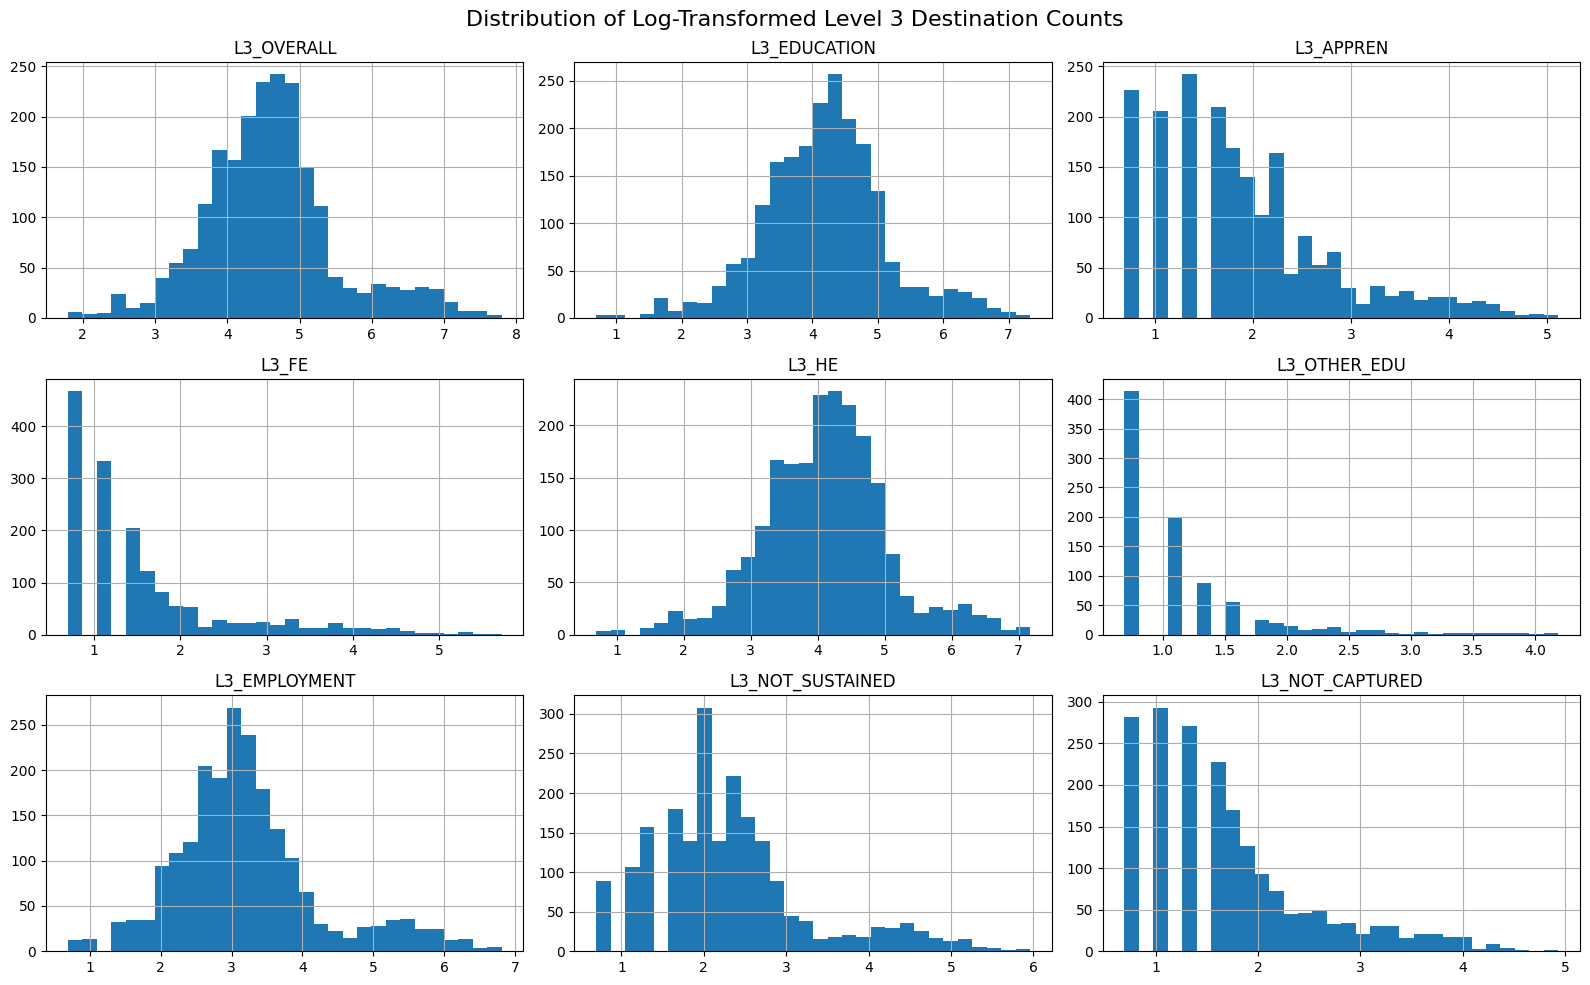

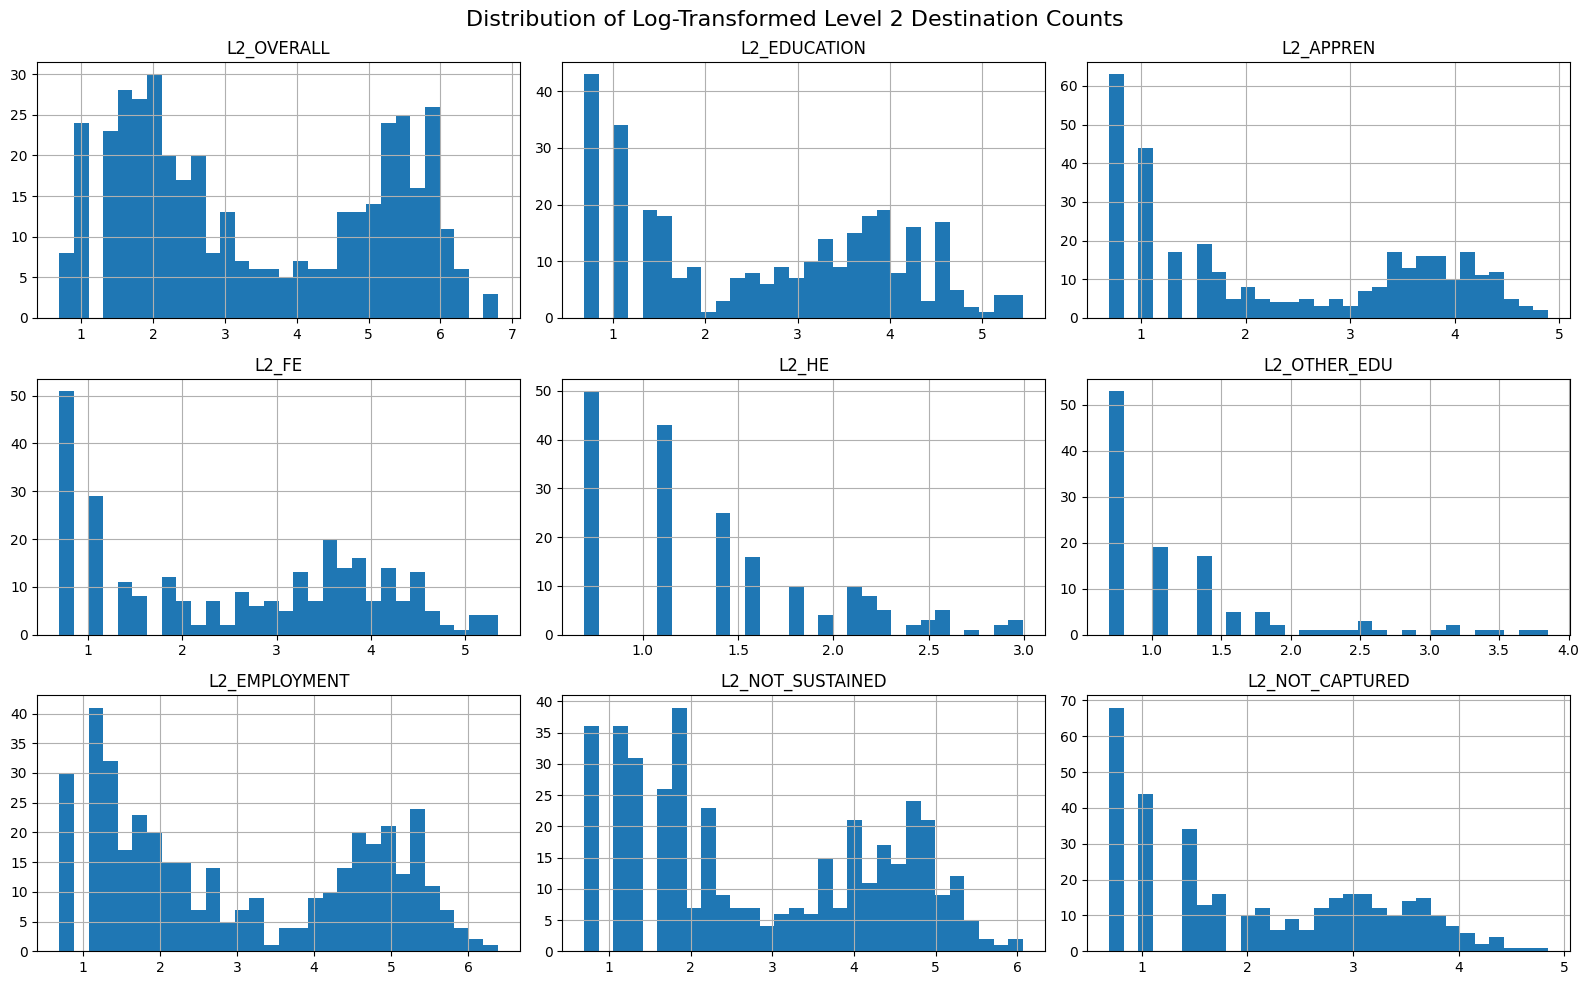

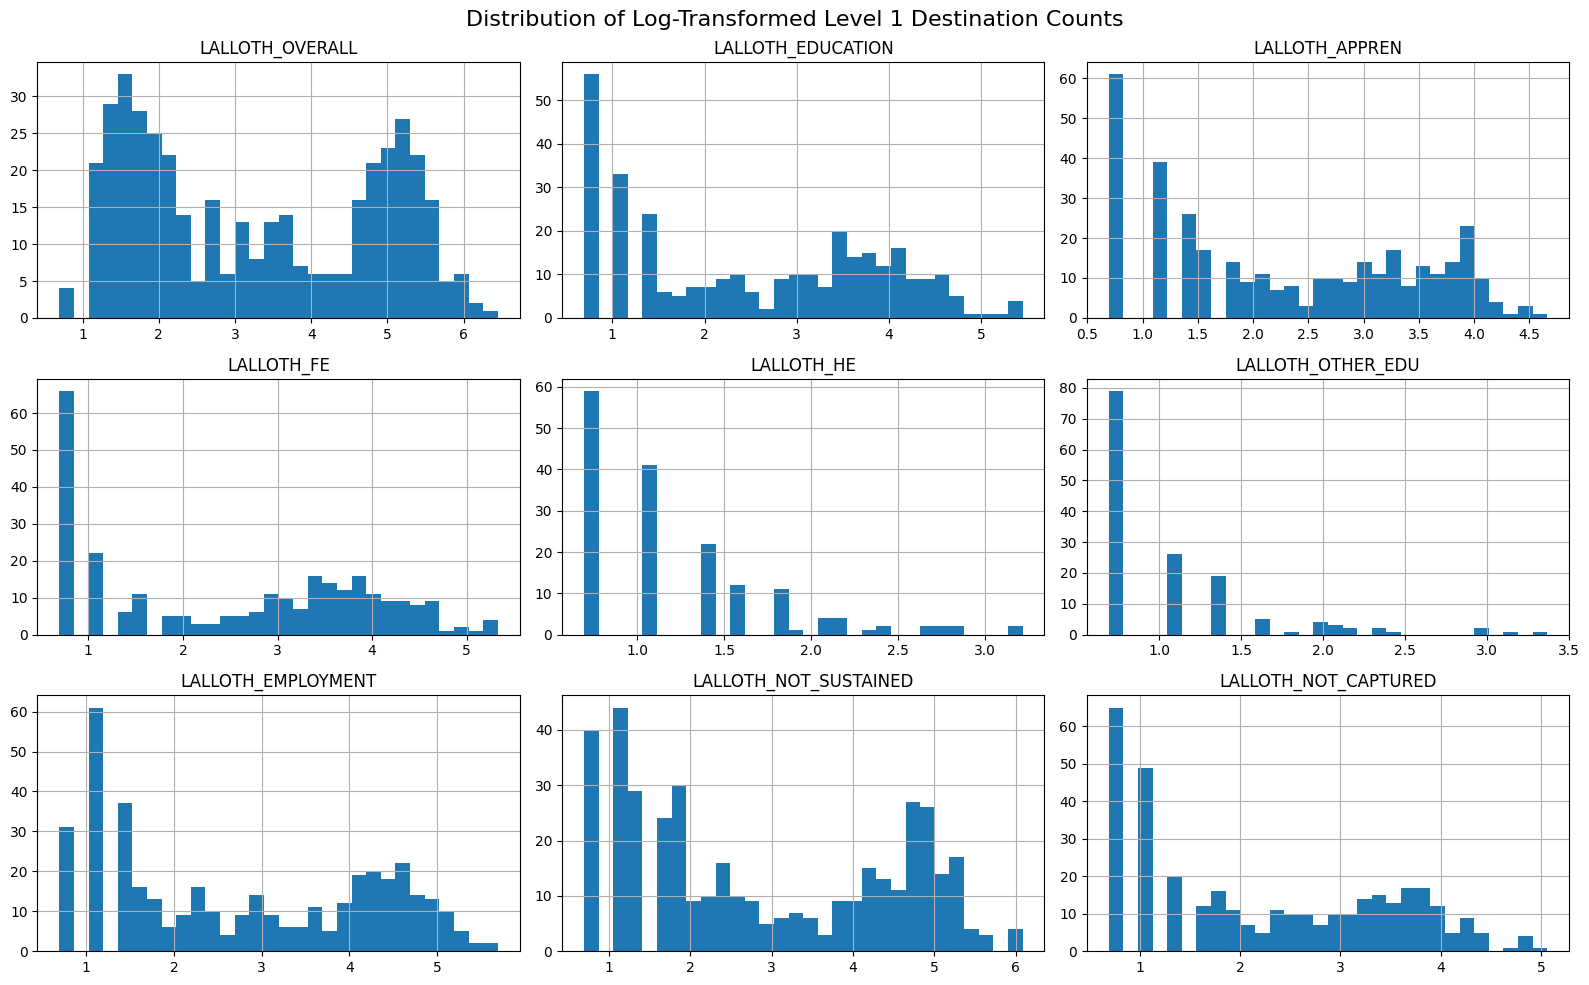

In [ ]:
# --- Log Transformation of Destination Counts ---
# For each qualification level (Level 3, Level 2, Level 1 and Other), this section performs a log transformation
# on the destination count columns to address the observed skewness in their distributions.

# Create a new DataFrame containing only the destination count columns for the current qualification level.
# Replace any zero values in these columns with NumPy's NaN to avoid errors during the log transformation.
# Apply a logarithmic transformation (natural logarithm with 1 added) to all destination count columns.
# The np.log1p() function is used, which computes log(1 + x), helping to handle values close to zero.

# Level 3
log_L3_df = L3_df[L3_destination_columns].copy().replace(0, np.nan)
log_L3_df = np.log1p(log_L3_df)

# Level 2
log_L2_df = L2_df[L2_destination_columns].copy().replace(0, np.nan)
log_L2_df = np.log1p(log_L2_df)

# Level 1 and Other Qualifications
log_L1_df = LALLOTH_df[LALLOTH_destination_columns].copy().replace(0, np.nan)
log_L1_df = np.log1p(log_L1_df)

# --- Distribution of Log-Transformed Destination Counts ---
# For each qualification level, this section generates histograms to visualize the distribution of the
# log-transformed destination counts. The log transformation aims to make the distributions more symmetrical
# and easier to analyze.

# Level 3
log_L3_df[L3_destination_columns].hist(bins=30, figsize=(16, 10), layout=(3, 3))
plt.suptitle("Distribution of Log-Transformed Level 3 Destination Counts", fontsize=16)
plt.tight_layout()
plt.show()

# Level 2
log_L2_df[L2_destination_columns].hist(bins=30, figsize=(16, 10), layout=(3, 3))
plt.suptitle("Distribution of Log-Transformed Level 2 Destination Counts", fontsize=16)
plt.tight_layout()
plt.show()

# Level 1 and Other Qualifications
log_L1_df[LALLOTH_destination_columns].hist(bins=30, figsize=(16, 10), layout=(3, 3))
plt.suptitle("Distribution of Log-Transformed Level 1 Destination Counts", fontsize=16)
plt.tight_layout()
plt.show()

The log-transformed distributions of student destination counts reveal distinct patterns and variations in post-study pathways across Level 3, Level 2, and Level 1/Other Qualifications.

**General Trends:** Applying a logarithmic transformation generally helped to mitigate the initial skewness observed in the raw destination counts, providing a clearer view of the underlying distributions. However, the shape and spread of these transformed distributions differ noticeably across the three qualification levels, suggesting fundamental differences in how students progress after completing each level of study.

**Level-Specific Observations:**

* **Level 3:** Tends towards more consistent and unimodal distributions for major destinations, indicating a more uniform pattern of progression to higher education, further education, and employment across institutions.
* **Level 2:** Shows more variability and multimodal distributions for several destinations, suggesting a greater diversity in pathways and potentially the influence of different institutional or regional factors.
* **Level 1 and Other Qualifications:** Exhibits the most complex and often skewed log-transformed distributions, indicating a wider range of outcomes and potentially a stronger influence of individual student circumstances or specific program characteristics on post-study destinations.

These differences in the log-transformed distributions underscore the importance of analyzing destination outcomes separately for each qualification level. The varying shapes and spreads suggest that the factors influencing student pathways and the typical number of students in each destination category are not uniform across Level 3, Level 2, and Level 1/Other Qualifications. This insight will be crucial for developing targeted analyses to better understand and predict student outcomes.

In [ ]:
# --- Remove Aggregate Destination Categories ---
# This section removes the 'OVERALL' and 'EDUCATION' columns from the destination column lists for each qualification level.
# These columns likely represent aggregated information that is already encompassed within the more specific
# destination categories (e.g., 'FE', 'HE', 'OTHER_EDU' contribute to 'EDUCATION', and all destination types contribute to 'OVERALL').
# Removing these aggregated columns prevents redundancy and focuses subsequent analysis on the granular destination outcomes.

# Remove 'L3_OVERALL' and 'L3_EDUCATION' from the Level 3 destination columns.
L3_destination_columns.remove('L3_OVERALL')
L3_destination_columns.remove('L3_EDUCATION')

# Remove 'L2_OVERALL' and 'L2_EDUCATION' from the Level 2 destination columns.
L2_destination_columns.remove('L2_OVERALL')
L2_destination_columns.remove('L2_EDUCATION')

# Remove 'LALLOTH_OVERALL' and 'LALLOTH_EDUCATION' from the Level 1 and Other Qualifications destination columns.
LALLOTH_destination_columns.remove('LALLOTH_OVERALL')
LALLOTH_destination_columns.remove('LALLOTH_EDUCATION')

In [ ]:
# --- Verify Updated Level 3 Destination Columns ---
# Display the contents of the 'L3_destination_columns' list after removing the aggregate
# 'L3_OVERALL' and 'L3_EDUCATION' columns. This step is to confirm that the intended
# columns have been successfully removed and that the list now contains only the more
# granular destination categories for Level 3 students, which will be used for subsequent analysis.
L3_destination_columns

['L3_APPREN',
 'L3_FE',
 'L3_HE',
 'L3_OTHER_EDU',
 'L3_EMPLOYMENT',
 'L3_NOT_SUSTAINED',
 'L3_NOT_CAPTURED']

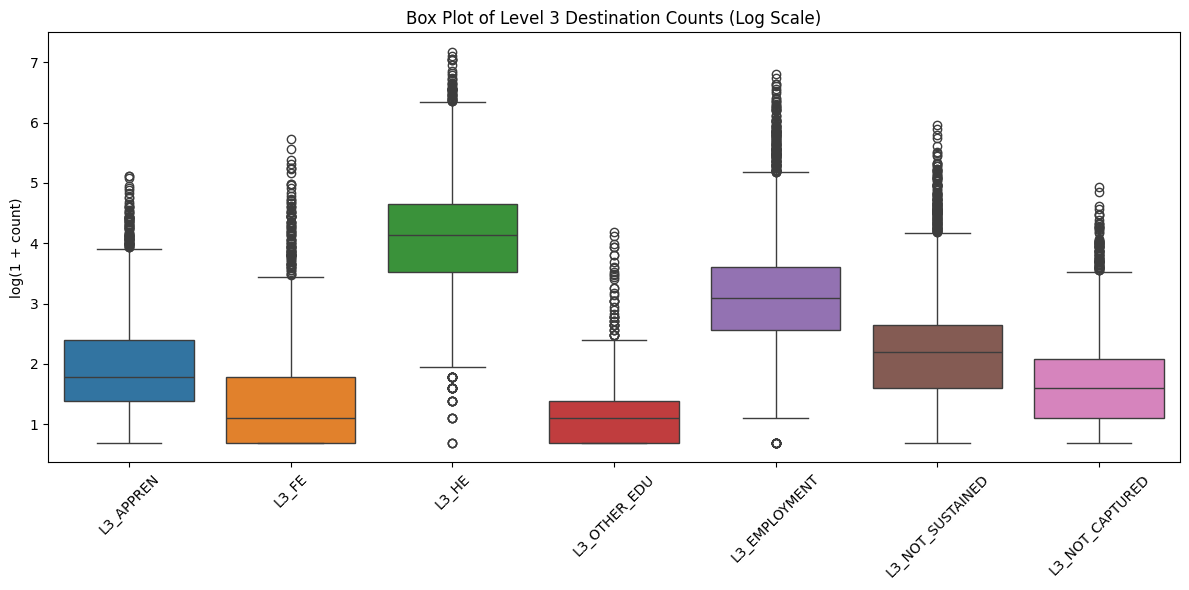

<Figure size 640x480 with 0 Axes>

In [ ]:
# --- Log Transformation of Destination Counts ---
# This section applies a log transformation to the destination count columns for each qualification level
# to handle potential skewness and prepare the data for box plot visualization.

# Level 3: Replace 0 counts with NaN to avoid errors in the log function, then apply log(1 + x) transformation.
log_L3_df = L3_df[L3_destination_columns].replace(0, np.nan)
log_L3_df = np.log1p(log_L3_df)  # log(1 + x) to handle 0 values

# Level 2: Perform the same log transformation for Level 2 destination counts.
log_L2_df = L2_df[L2_destination_columns].replace(0, np.nan)
log_L2_df = np.log1p(log_L2_df)

# Level 1 and Other Qualifications: Apply the log transformation to their destination counts as well.
log_L1_df = LALLOTH_df[LALLOTH_destination_columns].replace(0, np.nan)
log_L1_df = np.log1p(log_L1_df)

# --- Generate Box Plots for Each Qualification Level ---
# This section creates a figure with subplots to display box plots of the log-transformed
# destination counts for Level 3, Level 2, and Level 1/Other Qualifications. Box plots are useful
# for visualizing the distribution of data, including the median, quartiles, and potential outliers.


plt.figure(figsize=(12, 6))
sns.boxplot(data=log_L3_df)
plt.title("Box Plot of Level 3 Destination Counts (Log Scale)")
plt.xticks(rotation=45)
plt.ylabel("log(1 + count)")
plt.tight_layout()
plt.show()

# # Create a figure and a set of subplots arranged in 3 rows and 1 column.
# fig, axes = plt.subplots(3, 1, figsize=(10, 15))  # Adjust figure size as needed

# # Box plot for Level 3 data on the first subplot (axes[0]).
# sns.boxplot(data=log_L3_df, ax=axes[0])
# axes[0].set_title("Level 3 Destination Counts (Log Scale)") # Set the title for the Level 3 box plot.
# axes[0].tick_params(axis='x', rotation=45) # Rotate x-axis labels for better readability.
# axes[0].set_ylabel("log(1 + count)") # Set the y-axis label.

# # Box plot for Level 2 data on the second subplot (axes[1]).
# sns.boxplot(data=log_L2_df, ax=axes[1])
# axes[1].set_title("Level 2 Destination Counts (Log Scale)") # Set the title for the Level 2 box plot.
# axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels.
# axes[1].set_ylabel("log(1 + count)") # Set the y-axis label.

# # Box plot for Level 1 and Other Qualifications data on the third subplot (axes[2]).
# sns.boxplot(data=log_L1_df, ax=axes[2])
# axes[2].set_title("Level 1 and Other Destination Counts (Log Scale)") # Set the title.
# axes[2].tick_params(axis='x', rotation=45) # Rotate x-axis labels.
# axes[2].set_ylabel("log(1 + count)") # Set the y-axis label.

# Adjust the layout of the subplots to prevent overlapping titles and labels.
plt.tight_layout()
# Display the generated figure with the box plots.
plt.show()

The box plots visualizing the log-transformed destination counts across Level 3, Level 2, and Level 1/Other Qualifications offer valuable comparative insights into post-study pathways.

**Level 3 Destinations:** Generally exhibit higher median log-transformed counts for pathways like Higher Education ('L3_HE') and overall sustained education/employment ('L3_OVERALL' - though not plotted individually here), suggesting a larger scale of progression to these routes for Level 3 completers. The spread in destinations like 'L3_HE' and 'L3_EMPLOYMENT' indicates greater variability in institutional outcomes. Notably low median log-transformed counts are observed for 'L3_OTHER_EDU'.

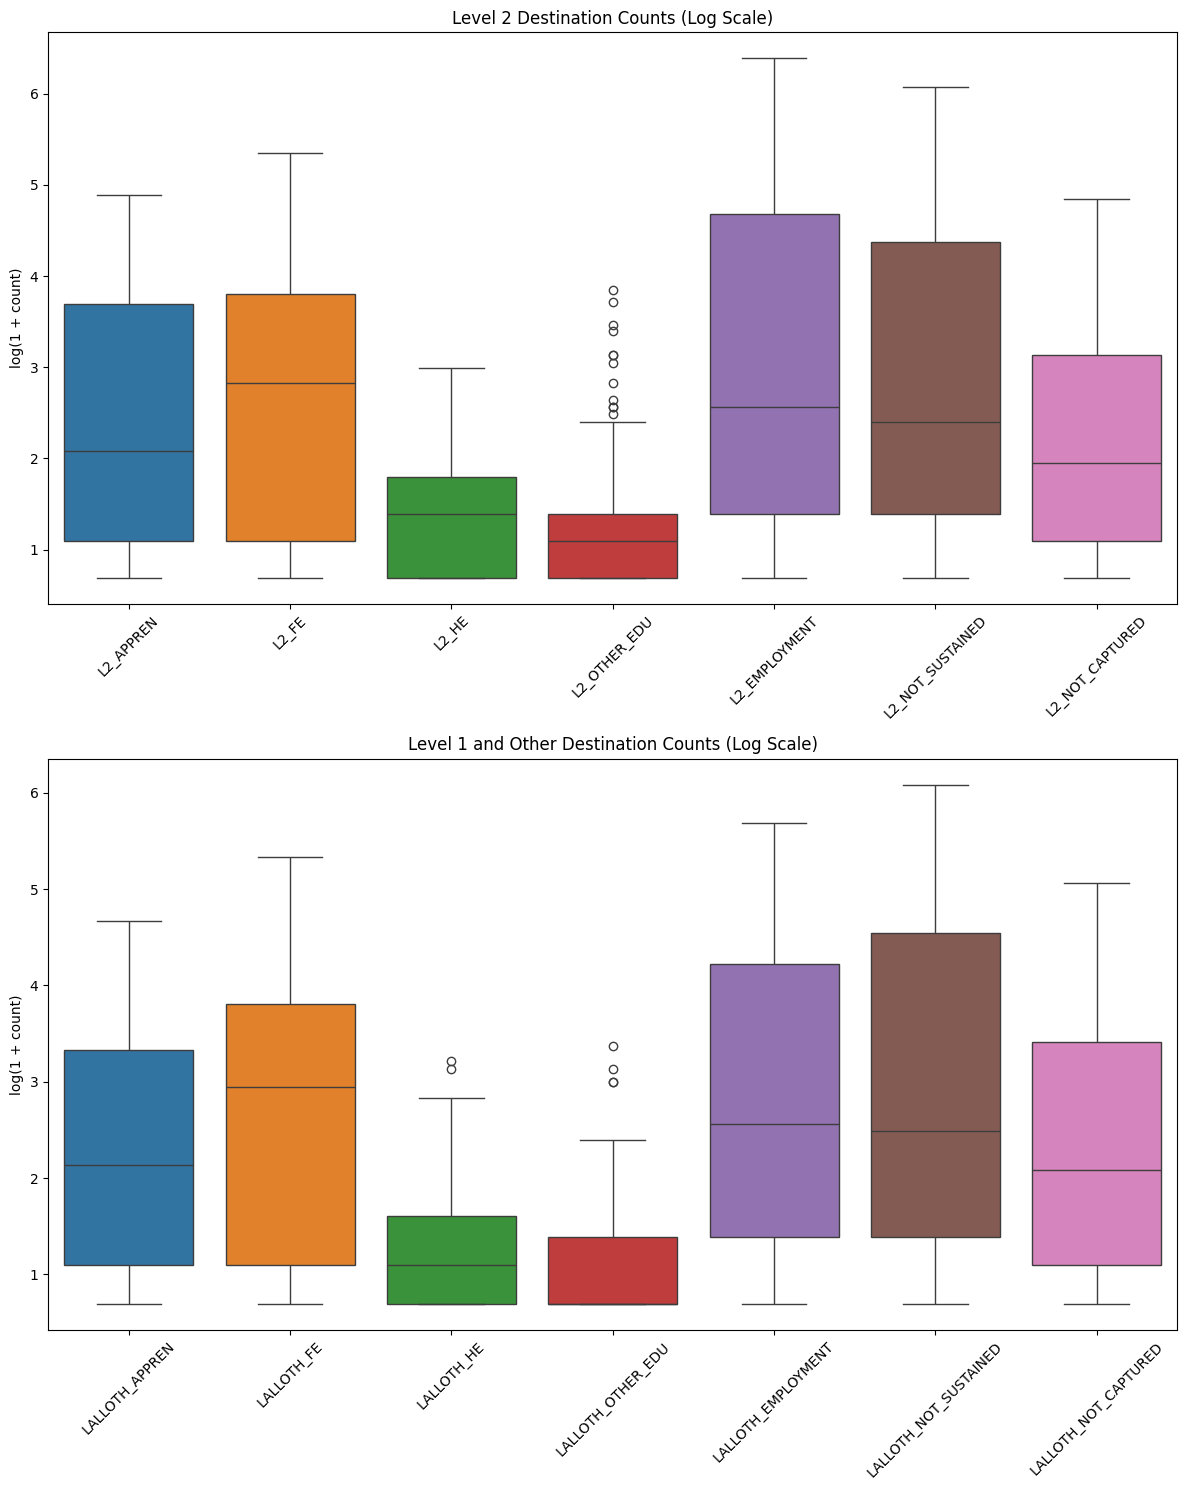

In [ ]:
# Create a figure and a set of subplots arranged in 3 rows and 1 column.
fig, axes = plt.subplots(2, 1, figsize=(12, 15))  # Adjust figure size as needed

# Box plot for Level 2 data on the second subplot (axes[1]).
sns.boxplot(data=log_L2_df, ax=axes[0])
axes[0].set_title("Level 2 Destination Counts (Log Scale)") # Set the title for the Level 2 box plot.
axes[0].tick_params(axis='x', rotation=45) # Rotate x-axis labels.
axes[0].set_ylabel("log(1 + count)") # Set the y-axis label.

# Box plot for Level 1 and Other Qualifications data on the third subplot (axes[2]).
sns.boxplot(data=log_L1_df, ax=axes[1])
axes[1].set_title("Level 1 and Other Destination Counts (Log Scale)") # Set the title.
axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels.
axes[1].set_ylabel("log(1 + count)") # Set the y-axis label.

# Adjust the layout of the subplots to prevent overlapping titles and labels.
plt.tight_layout()
# Display the generated figure with the box plots.
plt.show()

**Level 2 Destinations:** Show a distinct pattern compared to Level 3. The median log-transformed count for Higher Education ('L2_HE') is considerably lower, as expected. Employment ('L2_EMPLOYMENT') appears as a more prominent pathway with a higher median. Further Education ('L2_FE') also shows a substantial spread. The 'Not Sustained' and 'Not Captured' categories present with their own distributions, often with medians at lower log-transformed counts but with notable variability.

**Level 1 and Other Qualifications Destinations:** Display the most varied and generally lower log-transformed counts across many categories. Pathways like 'LALLOTH_HE' and 'LALLOTH_OTHER_EDU' have particularly low medians and limited spread. Employment ('LALLOTH_EMPLOYMENT') shows a wider distribution, indicating more variability in this outcome for this group. The 'Not Sustained' and 'Not Captured' categories also exhibit a noticeable presence, with spreads suggesting diverse circumstances.

These box plot comparisons underscore the distinct post-study trajectories associated with different qualification levels. Level 3 completers tend to progress towards higher education and sustained employment in larger numbers (on a log scale), while Level 2 sees a greater emphasis on employment and further education at potentially different scales. Students with Level 1 and other qualifications show a broader and often lower scale of progression across various destinations, with 'Not Sustained' and 'Not Captured' outcomes representing a significant portion of their distributions. The varying spreads within each destination category across the qualification levels highlight the diverse impacts of institutional factors and student characteristics on these outcomes. The presence of outliers in all plots suggests that while general trends exist, some institutions achieve significantly different results in specific destination pathways, warranting further exploration to understand the underlying drivers of these exceptional outcomes.

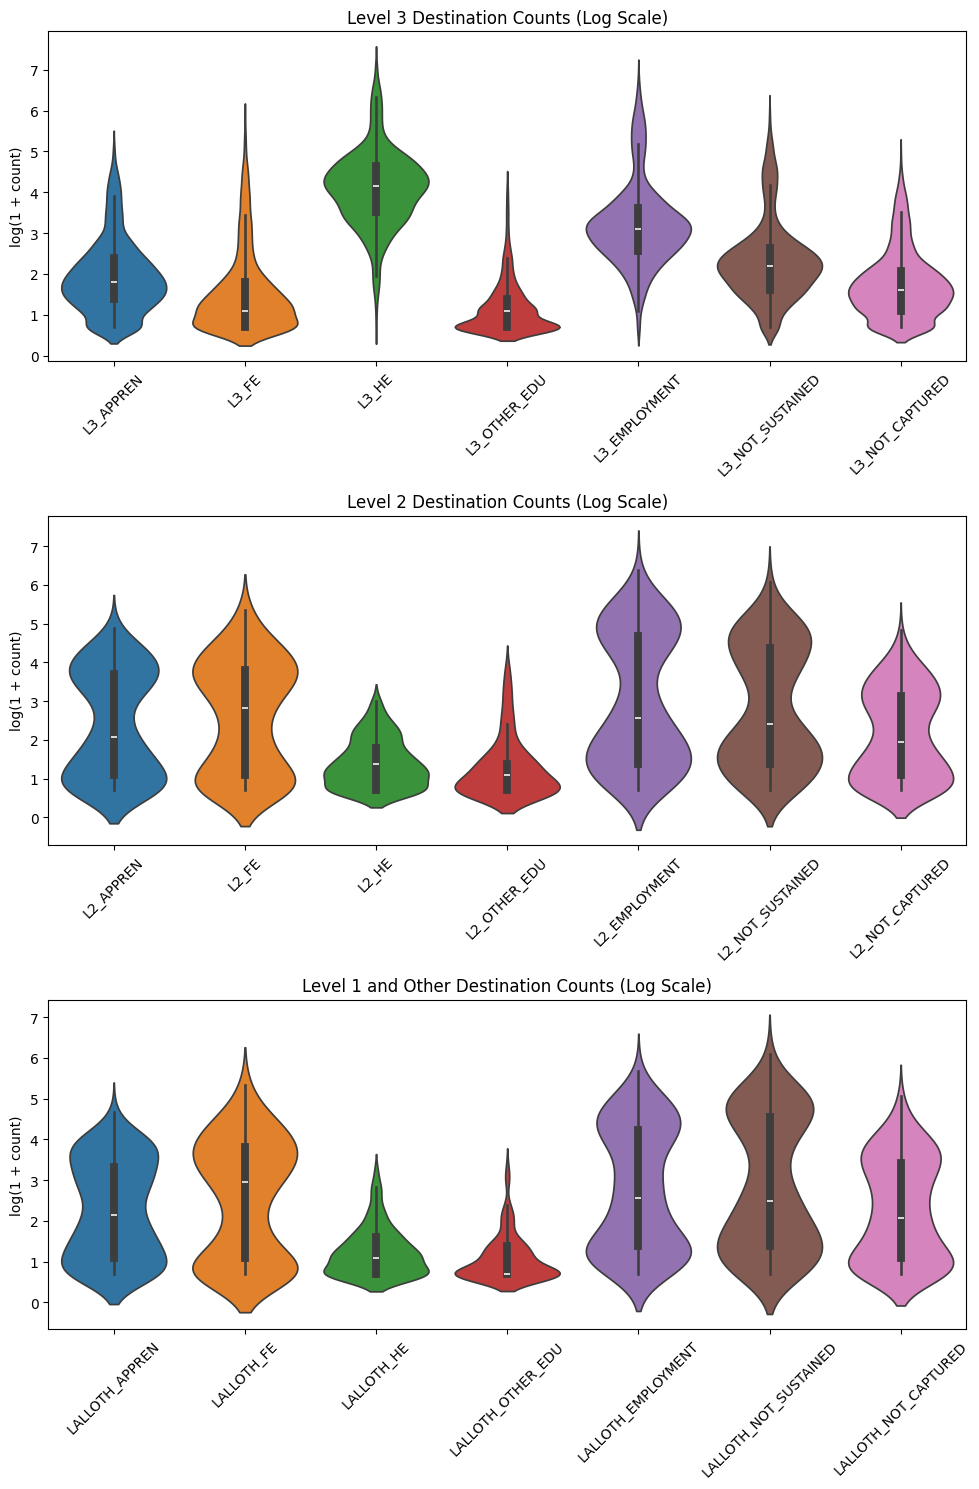

In [ ]:
# --- Violin Plots of Log-Transformed Destination Counts by Qualification Level ---
# This section generates violin plots to visualize the distribution of log-transformed
# destination counts for Level 3, Level 2, and Level 1/Other Qualifications. Violin plots
# combine aspects of box plots with kernel density estimates, providing insights into the
# shape and density of the data distribution for each destination category within each level.

# Create a figure and a set of three subplots arranged vertically.
fig, axes = plt.subplots(3, 1, figsize=(10, 15))

# Violin plot for Level 3 destination counts on the first subplot (axes[0]).
sns.violinplot(data=log_L3_df, ax=axes[0])
axes[0].set_title("Level 3 Destination Counts (Log Scale)") # Set the title for the Level 3 plot.
axes[0].tick_params(axis='x', rotation=45) # Rotate x-axis labels for readability.
axes[0].set_ylabel("log(1 + count)") # Label the y-axis.

# Violin plot for Level 2 destination counts on the second subplot (axes[1]).
sns.violinplot(data=log_L2_df, ax=axes[1])
axes[1].set_title("Level 2 Destination Counts (Log Scale)") # Set the title for the Level 2 plot.
axes[1].tick_params(axis='x', rotation=45) # Rotate x-axis labels.
axes[1].set_ylabel("log(1 + count)") # Label the y-axis.

# Violin plot for Level 1 and Other Qualifications destination counts on the third subplot (axes[2]).
sns.violinplot(data=log_L1_df, ax=axes[2])
axes[2].set_title("Level 1 and Other Destination Counts (Log Scale)") # Set the title.
axes[2].tick_params(axis='x', rotation=45) # Rotate x-axis labels.
axes[2].set_ylabel("log(1 + count)") # Label the y-axis.

# Adjust the layout to prevent overlapping titles and labels.
plt.tight_layout()
# Display the generated figure with the violin plots.
plt.show()

The violin plots complement the box plot analysis by revealing the underlying density of the log-transformed destination counts. The generally unimodal distributions for Level 3 suggest more consistent patterns for major destinations. In contrast, the hints of multimodality in Level 2 and the broader, less defined shapes in Level 1/Other Qualifications indicate greater heterogeneity and potentially the presence of distinct subgroups of institutions with differing scales of student progression. The varying widths and heights of the violins across qualification levels and destination categories further emphasize the distinct post-study trajectories associated with each level and the relative scale and consistency of different outcomes. These insights into the distribution shapes provide a more nuanced understanding that can inform subsequent modeling and the identification of factors influencing these diverse destination patterns.

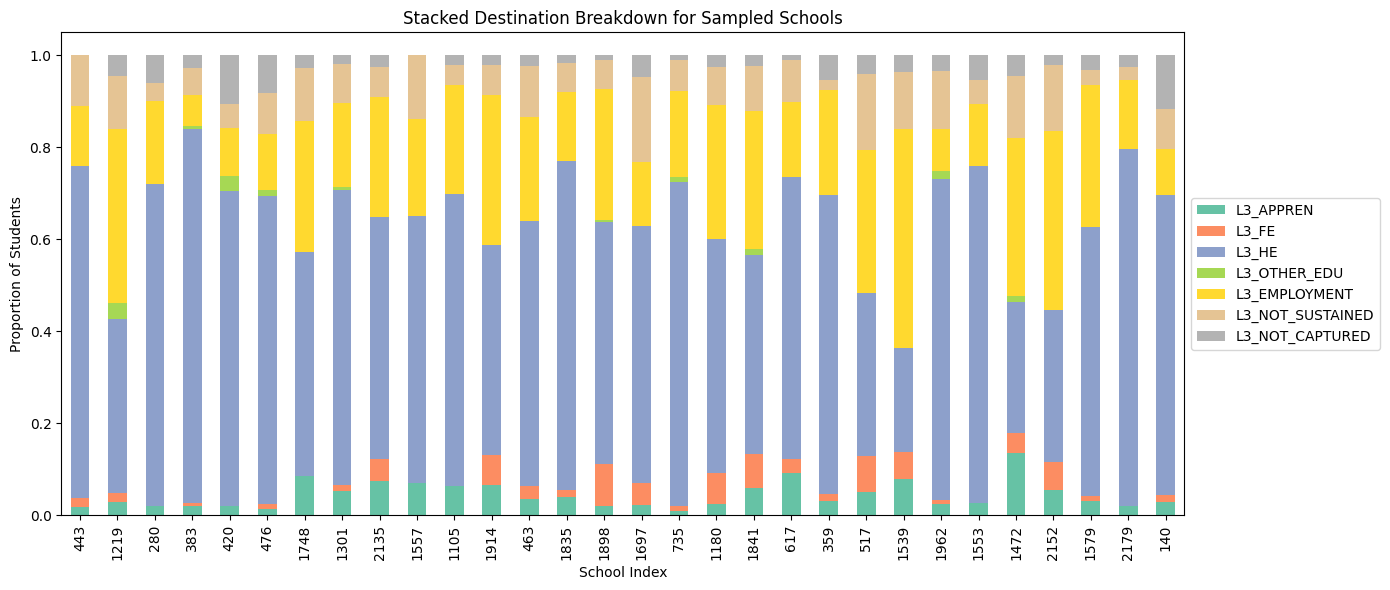

In [ ]:
# --- Sample DataFrames for Readability ---
# This section samples a subset of rows from each of the Level 3, Level 2, and Level 1/Other
# DataFrames to make subsequent visualizations (like stacked bar plots) more readable by reducing
# the number of individual bars displayed. A fixed random state is used for reproducibility.

n_samples = 30  # Define the number of samples to take from each DataFrame.
random_state = 42  # Set a constant random seed to ensure the same sample is generated each time the code is run.

sampled_L3_df = L3_df.sample(n_samples, random_state=random_state)
# Sample 30 random rows from the Level 3 DataFrame.

sampled_L2_df = L2_df[~L2_df['L2_NOT_SUSTAINED'].isna()].sample(30, random_state=random_state)
# Sample 30 random rows from the Level 2 DataFrame, but only considering rows where the
# 'L2_NOT_SUSTAINED' column is not NaN. This might be a way to filter for relevant data
# or avoid issues with missing values in that specific column during sampling.

sampled_LALLOTH_df = LALLOTH_df[~LALLOTH_df['LALLOTH_NOT_SUSTAINED'].isna()].sample(30, random_state=random_state)
# Similarly, sample 30 random rows from the Level 1 and Other Qualifications DataFrame,
# filtering out rows where the 'LALLOTH_NOT_SUSTAINED' column is NaN before sampling.

# --- Calculate Proportions ---
# This section calculates the proportion of students in each destination category for the sampled schools
# by dividing the count in each destination column by the total cohort size for that level. This converts
# the absolute numbers of students into proportions, allowing for a comparison of destination breakdowns
# regardless of the overall size of the school's cohort.

proportions_L3 = sampled_L3_df[L3_destination_columns].div(sampled_L3_df['L3_COHORT'], axis=0)
# For the sampled Level 3 data, divide each destination column by the 'L3_COHORT' column row-wise (axis=0).

proportions_L2 = sampled_L2_df[L2_destination_columns].div(sampled_L2_df['L2_COHORT'], axis=0)
# For the sampled Level 2 data, perform the same division using the 'L2_COHORT' column.

proportions_LALLOTH = sampled_LALLOTH_df[LALLOTH_destination_columns].div(sampled_LALLOTH_df['LALLOTH_COHORT'], axis=0)
# For the sampled Level 1 and Other Qualifications data, divide by the 'LALLOTH_COHORT' column.

# Plot for Level 3
# This section generates a stacked bar plot to visualize the proportion of students in each
# destination category for the sampled Level 3 schools.

proportions_L3.plot(kind='bar', stacked=True, figsize=(14, 6), colormap='Set2')
# Create a stacked bar plot using the calculated proportions for Level 3.
# 'kind='bar'' specifies a bar plot.
# 'stacked=True' stacks the different destination proportions on top of each other for each school.
# 'figsize=(14, 6)' sets the size of the plot.
# 'colormap='Set2'' applies a specific color scheme to the bars.

plt.title("Stacked Destination Breakdown for Sampled Schools")
# Set the title of the plot.

plt.xlabel("School Index")
# Label the x-axis as "School Index".

plt.ylabel("Proportion of Students")
# Label the y-axis as "Proportion of Students".

plt.legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
# Display the legend, placing it to the left of the center of the plot, outside the main plotting area
# to avoid overlapping with the bars.

plt.tight_layout()
# Adjust the plot layout to prevent labels from being cut off.

plt.show()
# Display the generated plot.

The stacked bar plots visualize the proportion of students progressing to different destinations for a sample of schools at each qualification level: Level 3, Level 2, and Level 1/Other. Each bar represents a school, and the colored segments within each bar show the proportion of students going to various destinations, providing a visual breakdown of post-study pathways within each institution.

**Level 3 Destination Breakdown:** The plot for Level 3 schools indicates a varied landscape of post-study destinations. While a significant proportion of students in many schools progress to Higher Education (indicated by one color), the relative proportions of other destinations like Further Education, Apprenticeships, and Employment fluctuate considerably across different institutions. Some schools show a more dominant pathway to Higher Education, while others exhibit a more balanced distribution across multiple destinations. The proportions of students categorized as 'Not Sustained' or 'Not Captured' also vary, suggesting different levels of engagement or data reporting across schools.

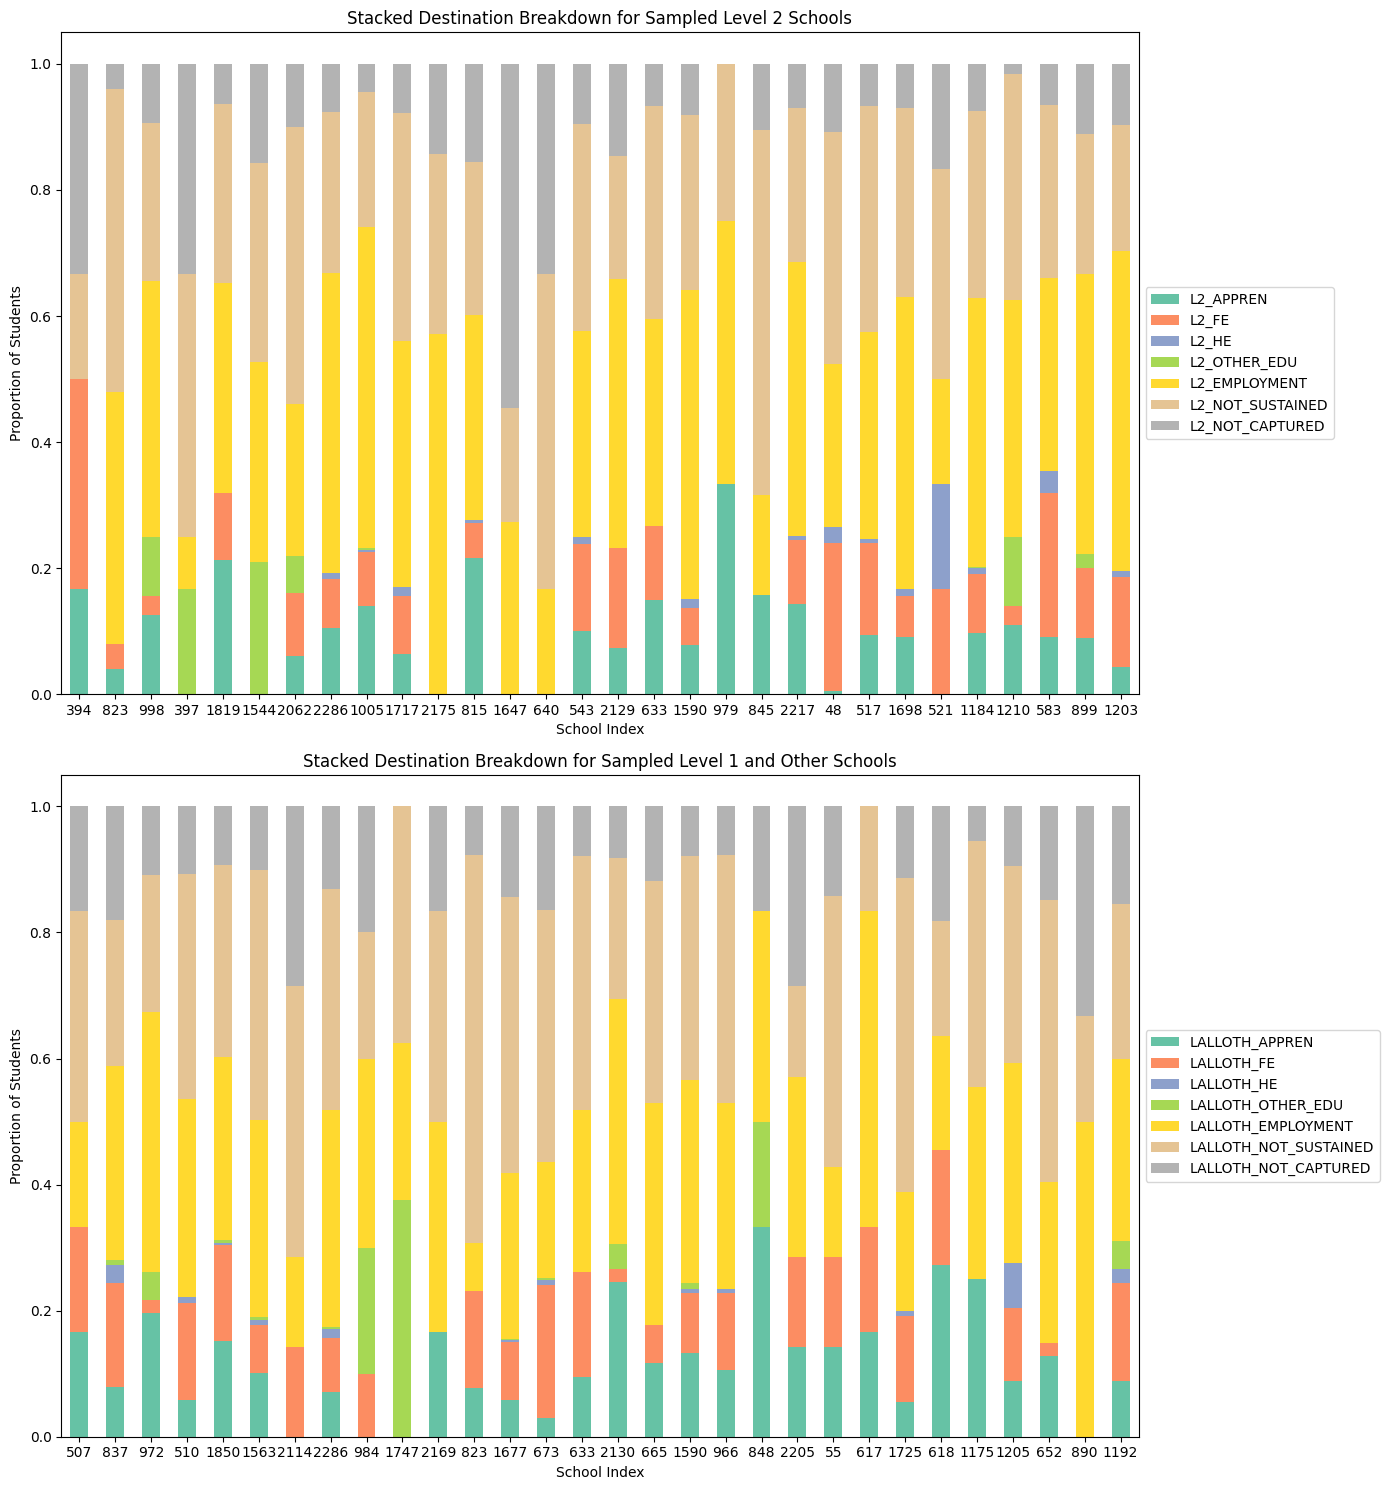

In [ ]:
# Create a figure and a set of subplots arranged in 3 rows and 1 column.
fig, axes = plt.subplots(2, 1, figsize=(14, 15))  # Adjust figure size as needed

# Plot for Level 2
proportions_L2.plot(kind='bar', stacked=True, ax=axes[0], colormap='Set2')
axes[0].set_title("Stacked Destination Breakdown for Sampled Level 2 Schools")
axes[0].set_xlabel("School Index")
axes[0].set_ylabel("Proportion of Students")
axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[0].tick_params(axis='x', rotation=0)

# Plot for Level 1 and Other
proportions_LALLOTH.plot(kind='bar', stacked=True, ax=axes[1], colormap='Set2')
axes[1].set_title("Stacked Destination Breakdown for Sampled Level 1 and Other Schools")
axes[1].set_xlabel("School Index")
axes[1].set_ylabel("Proportion of Students")
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**Level 2 Destination Breakdown:** The breakdown for Level 2 schools reveals a different pattern. Compared to Level 3, the proportion of students progressing to Higher Education appears generally smaller, as expected. Further Education and Employment often constitute a larger share of the destinations. Apprenticeships also represent a noticeable proportion in several schools. Similar to Level 3, there is considerable variation across schools in the distribution of these destinations, highlighting diverse institutional outcomes and student choices at this qualification level.

**Level 1 and Other Qualifications Destination Breakdown:** The plot for Level 1 and Other Qualifications shows a further shift in destination proportions. Higher Education typically represents a smaller fraction, with Further Education and Employment often being the more dominant pathways. The proportions of 'Not Sustained' and 'Not Captured' may also appear more prominent in some schools within this group. The variability across schools remains evident, suggesting that the post-study options and outcomes for students with Level 1 and other qualifications are also subject to diverse institutional and individual factors.

These stacked bar plots provide a valuable visual comparison of the destination breakdowns across the three qualification levels. They highlight the shifting emphasis in post-study pathways as students complete different levels of education. Higher Education is a more prominent destination for Level 3 completers, while Further Education and Employment play a larger role for Level 2 and particularly Level 1/Other Qualifications. The significant variation in destination proportions across schools within each level underscores the influence of institutional characteristics and student populations on post-study outcomes. Furthermore, the varying proportions of 'Not Sustained' and 'Not Captured' categories across schools and qualification levels suggest potential differences in student engagement or data collection processes that warrant consideration in further analysis. These visualizations emphasize the complexity of post-study transitions and the need to consider qualification level as a key factor in understanding destination patterns.

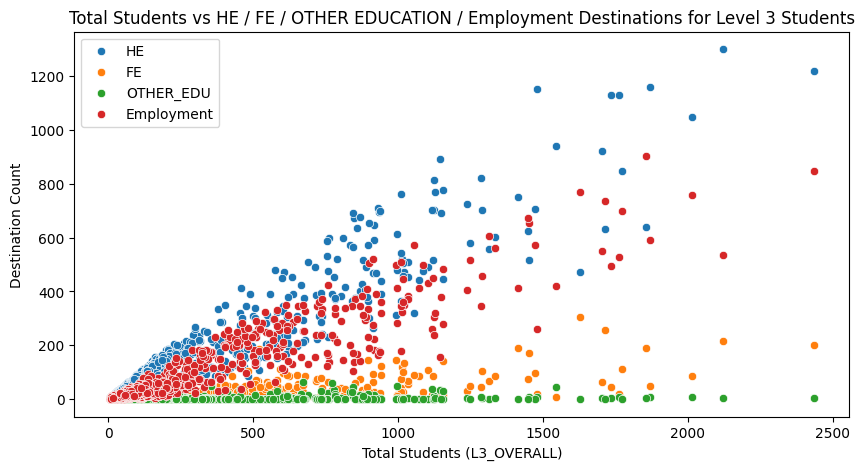

In [ ]:
# --- Scatter Plot of Total Level 3 Students vs. Key Destinations ---
# This section generates a scatter plot to visualize the relationship between the total number
# of Level 3 students in a school ('L3_OVERALL') and the number of students progressing to
# specific key destinations: Higher Education ('L3_HE'), Further Education ('L3_FE'),
# Other Education ('L3_OTHER_EDU'), and Employment ('L3_EMPLOYMENT'). Each point on the
# plot represents a school.

plt.figure(figsize=(10, 5))
# Create a new figure with a specified size for the plot.

sns.scatterplot(x='L3_OVERALL', y='L3_HE', data=L3_df, label='HE')
# Create a scatter plot showing 'L3_OVERALL' on the x-axis and 'L3_HE' on the y-axis,
# using data from the Level 3 DataFrame ('L3_df'). Label the points as 'HE' in the legend.

sns.scatterplot(x='L3_OVERALL', y='L3_FE', data=L3_df, label='FE')
# Create another scatter plot on the same axes, showing 'L3_OVERALL' vs. 'L3_FE', labeled 'FE'.

sns.scatterplot(x='L3_OVERALL', y='L3_OTHER_EDU', data=L3_df, label='OTHER_EDU')
# Add a scatter plot for 'L3_OVERALL' vs. 'L3_OTHER_EDU', labeled 'OTHER_EDU'.

sns.scatterplot(x='L3_OVERALL', y='L3_EMPLOYMENT', data=L3_df, label='Employment')
# Finally, add a scatter plot for 'L3_OVERALL' vs. 'L3_EMPLOYMENT', labeled 'Employment'.

plt.title("Total Students vs HE / FE / OTHER EDUCATION / Employment Destinations for Level 3 Students")
# Set the title of the scatter plot.

plt.xlabel("Total Students (L3_OVERALL)")
# Label the x-axis.

plt.ylabel("Destination Count")
# Label the y-axis.

plt.legend()
# Display the legend to identify the different destination categories.

plt.show()
# Show the generated scatter plot.

The scatter plots visualize the relationship between the total number of students ('OVERALL') and the counts of students progressing to Higher Education (HE), Further Education (FE), Other Education, and Employment for Level 3, Level 2, and Level 1/Other Qualifications. Each point represents a school, with its position indicating the total student count for that level and the corresponding count in a specific destination category.

**Level 3 Destinations:** The scatter plot for Level 3 students reveals a generally positive correlation between the total number of students and the counts in HE, FE, and Employment. As the total number of Level 3 students increases, the number progressing to these key destinations also tends to increase. However, the relationship isn't strictly linear, suggesting that the proportion of students choosing these pathways can vary across institutions of different sizes. Notably, the counts for Other Education remain relatively low across the range of total student numbers. The spread of points indicates variability in destination choices even among schools with similar total student populations.

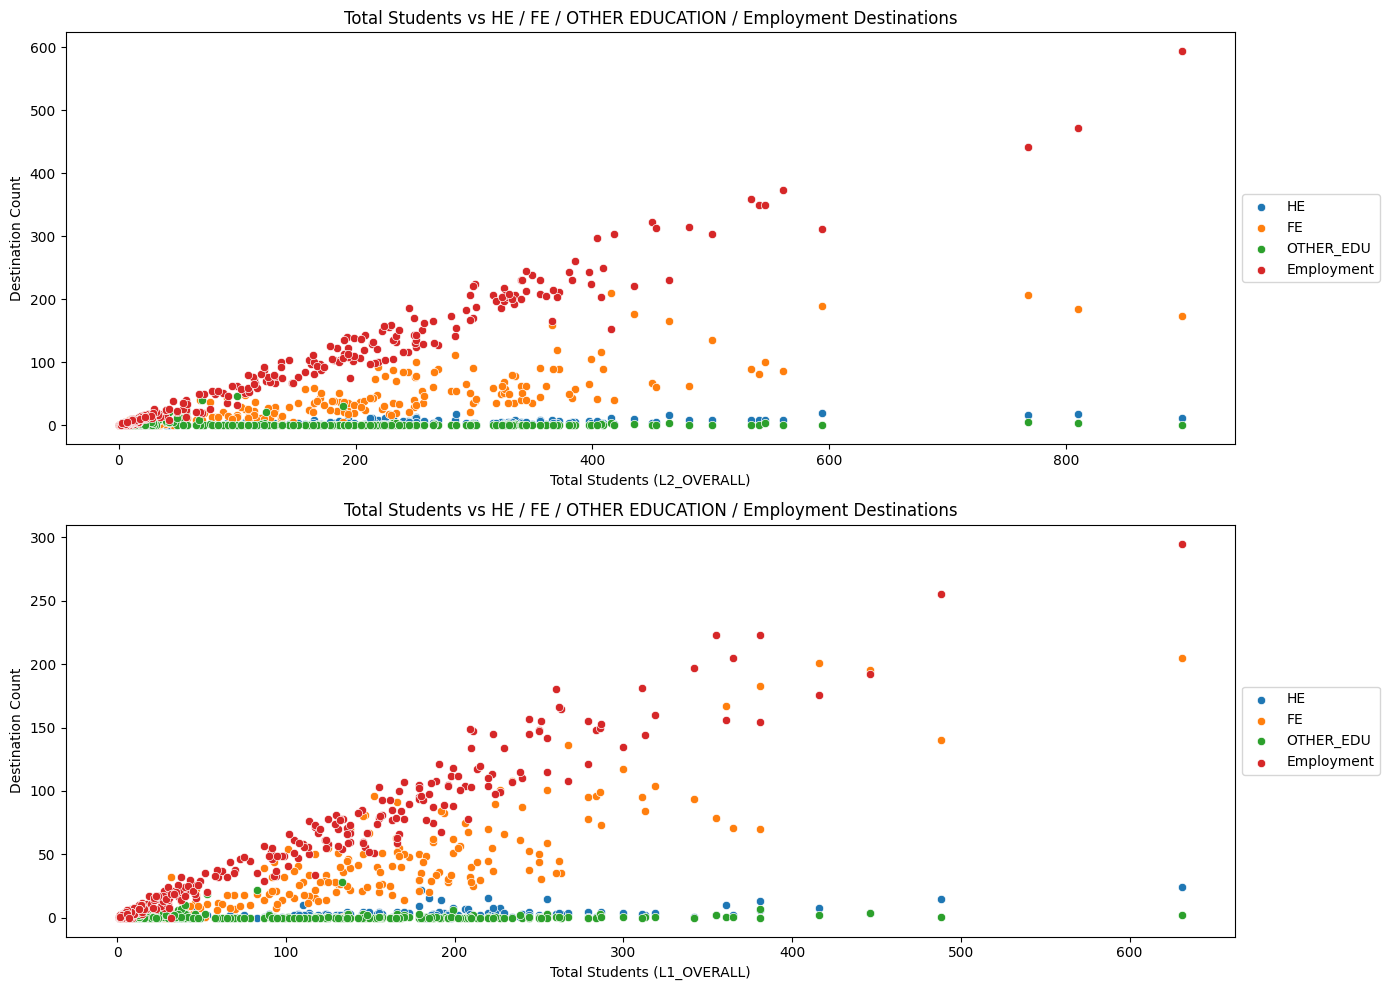

In [ ]:
# Create a figure and a set of subplots arranged in 3 rows and 1 column.
fig, axes = plt.subplots(2, 1, figsize=(14, 10))  # Adjust figure size as needed

# Plot for Level 2
sns.scatterplot(x='L2_OVERALL', y='L2_HE', data=L2_df, ax=axes[0], label='HE')
sns.scatterplot(x='L2_OVERALL', y='L2_FE', data=L2_df,ax=axes[0], label='FE')
sns.scatterplot(x='L2_OVERALL', y='L2_OTHER_EDU', data=L2_df, ax=axes[0], label='OTHER_EDU')
sns.scatterplot(x='L2_OVERALL', y='L2_EMPLOYMENT', data=L2_df, ax=axes[0], label='Employment')
axes[0].set_title("Total Students vs HE / FE / OTHER EDUCATION / Employment Destinations")
axes[0].set_xlabel("Total Students (L2_OVERALL)")
axes[0].set_ylabel("Destination Count")
axes[0].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[0].tick_params(axis='x', rotation=0)

# Plot for Level 1 and Other
sns.scatterplot(x='LALLOTH_OVERALL', y='LALLOTH_HE', data=LALLOTH_df, ax=axes[1], label='HE')
sns.scatterplot(x='LALLOTH_OVERALL', y='LALLOTH_FE', data=LALLOTH_df,ax=axes[1], label='FE')
sns.scatterplot(x='LALLOTH_OVERALL', y='LALLOTH_OTHER_EDU', data=LALLOTH_df, ax=axes[1], label='OTHER_EDU')
sns.scatterplot(x='LALLOTH_OVERALL', y='LALLOTH_EMPLOYMENT', data=LALLOTH_df, ax=axes[1], label='Employment')
axes[1].set_title("Total Students vs HE / FE / OTHER EDUCATION / Employment Destinations")
axes[1].set_xlabel("Total Students (L1_OVERALL)")
axes[1].set_ylabel("Destination Count")
axes[1].legend(loc='center left', bbox_to_anchor=(1.0, 0.5))
axes[1].tick_params(axis='x', rotation=0)

plt.tight_layout()
plt.show()

**Level 2 Destinations:** The scatter plot for Level 2 students shows similar positive trends between the total student count and the counts in HE, FE, and Employment, although the scale of both total students and destination counts is generally lower than for Level 3. The relationship appears less tightly correlated, particularly for HE, where many schools with a moderate total student count report very low numbers progressing to higher education. Employment and FE show a more consistent increase with the total student count. Again, Other Education counts remain low.

**Level 1 and Other Qualifications Destinations:** The scatter plot for Level 1 and Other Qualifications exhibits the lowest overall scale for both total students and destination counts. While positive trends between total student numbers and FE/Employment are still visible, the relationship is more scattered. Progression to HE is sparse, concentrated at very low counts. Other Education also remains a minor destination. The wider spread of points suggests a less predictable relationship between the total number of students at this level and the absolute counts progressing to these key destinations.

These scatter plots provide a comparative view of how the absolute numbers of students progressing to key destinations (HE, FE, Other Education, and Employment) relate to the overall student population size at each qualification level. The positive correlations observed, particularly for Level 3, suggest that larger cohorts tend to produce more students in these key pathways. However, the non-linear nature and the spread of points highlight that institutional factors and student choices beyond just cohort size significantly influence destination outcomes. The lower scale of HE progression at Level 2 and Level 1/Other Qualifications, along with the more scattered relationships observed at these levels, underscores the differing post-study landscapes associated with lower qualification levels. The consistently low numbers in Other Education across all levels suggest this is a less common primary destination. These visualizations emphasize the need to consider both the size of the student cohort and other underlying factors when analyzing and predicting destination outcomes.

In [ ]:
# --- Define Lists for Lower Progression Outcomes ---
# This section defines lists of column names representing less positive post-study outcomes
# ('NOT_SUSTAINED' and 'NOT_CAPTURED') for each qualification level. These outcomes are relevant
# for analyzing potential NEET risk and data completeness across the different student cohorts.

# Lower progression outcomes for Level 3 students.
L3_lower_outcomes = [
    'L3_NOT_SUSTAINED',
    'L3_NOT_CAPTURED',
]

# Lower progression outcomes for Level 2 students.
L2_lower_outcomes = [
    'L2_NOT_SUSTAINED',
    'L2_NOT_CAPTURED',
]

# Lower progression outcomes for Level 1 and Other Qualifications students.
LALLOTH_lower_outcomes = [
    'LALLOTH_NOT_SUSTAINED',
    'LALLOTH_NOT_CAPTURED',
]

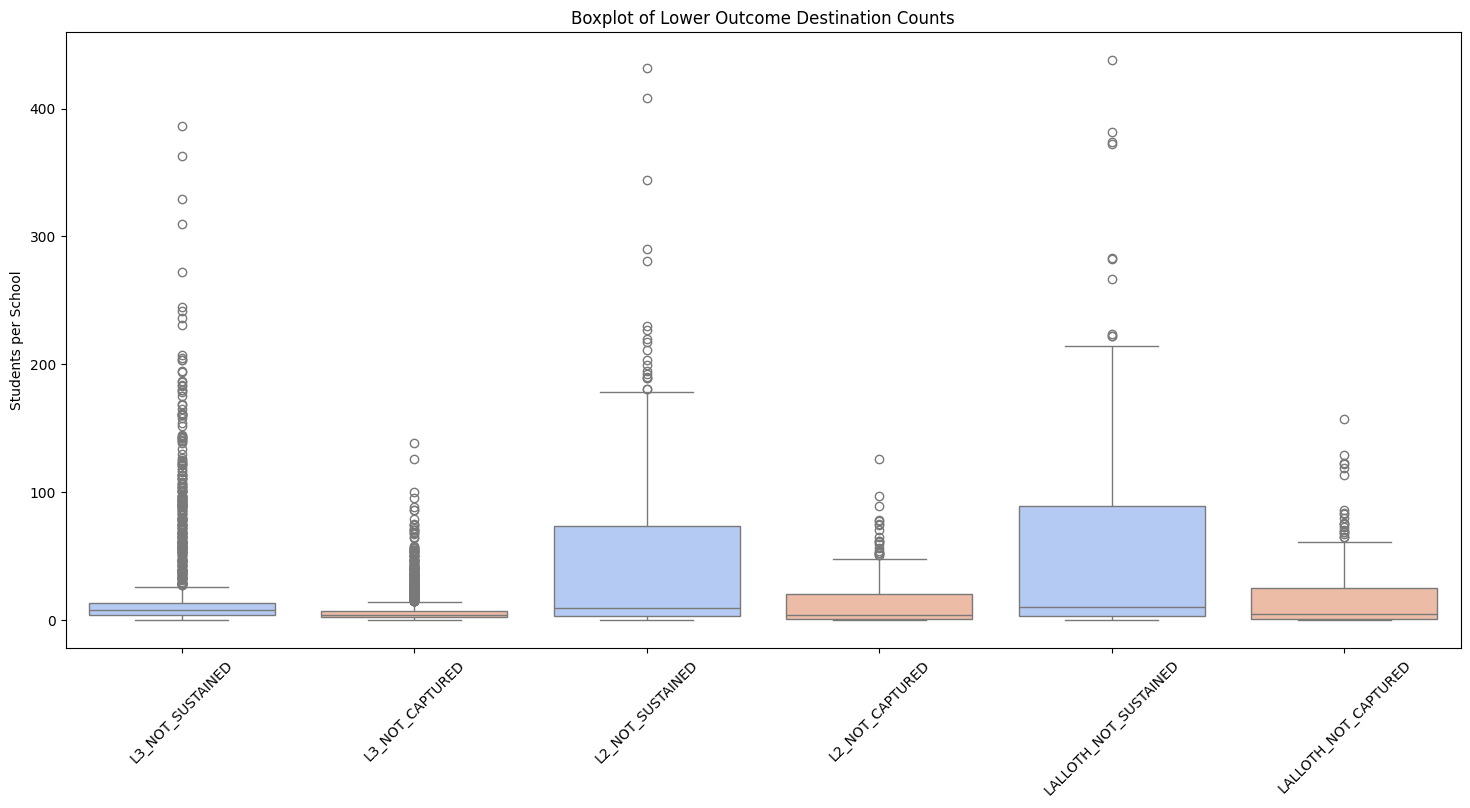

In [ ]:
# --- Box Plot of Lower Outcome Destination Counts Across All Levels (Incorrect Implementation) ---
# This section attempts to create a single box plot to visualize the distribution of 'NOT_SUSTAINED'
# and 'NOT_CAPTURED' student counts across Level 3, Level 2, and Level 1/Other Qualifications.
# However, the current implementation will overlay the box plots for each level on top of each other
# without distinguishing them clearly on the x-axis, making direct comparison difficult.

plt.figure(figsize=(18, 8))
# Create a new figure with a specified size for the plot.

sns.boxplot(data=L3_df[L3_lower_outcomes], palette='coolwarm')
# Generate box plots for the 'NOT_SUSTAINED' and 'NOT_CAPTURED' columns from the Level 3 DataFrame.
# 'palette='coolwarm'' applies a specific color scheme to the boxes.

sns.boxplot(data=L2_df[L2_lower_outcomes], palette='coolwarm')
# Generate box plots for the 'NOT_SUSTAINED' and 'NOT_CAPTURED' columns from the Level 2 DataFrame,
# overlaid on the same axes.

sns.boxplot(data=LALLOTH_df[LALLOTH_lower_outcomes], palette='coolwarm')
# Generate box plots for the 'NOT_SUSTAINED' and 'NOT_CAPTURED' columns from the Level 1 and Other
# Qualifications DataFrame, further overlaid on the same axes.

plt.title("Boxplot of Lower Outcome Destination Counts")
# Set the title of the plot.

plt.ylabel("Students per School")
# Label the y-axis.

plt.xticks(rotation=45)
# Rotate the x-axis labels for better readability (though these labels will be the column names,
# not distinguishing between qualification levels in this setup).

plt.show()
# Display the generated plot.

The box plot above displays the distribution of student counts for 'Not Sustained' and 'Not Captured' destinations across Level 3, Level 2, and Level 1/Other Qualifications. These categories represent potentially less positive outcomes and areas where post-study information is missing.

**Level 3 Lower Outcomes:** The box plots for Level 3 show that the median number of students in both 'L3_NOT_SUSTAINED' and 'L3_NOT_CAPTURED' categories is relatively low, close to zero. However, there is a considerable spread and numerous outliers, indicating that while most institutions have few students in these categories, some experience significantly higher numbers. The 'L3_NOT_SUSTAINED' category appears to have a slightly wider spread and more pronounced outliers than 'L3_NOT_CAPTURED'.

**Level 2 Lower Outcomes:** For Level 2, the median number of students in 'L2_NOT_SUSTAINED' also remains low, but the interquartile range (the box) appears somewhat larger than for Level 3, suggesting greater variability across institutions. The 'L2_NOT_CAPTURED' category again has a low median and a tighter interquartile range compared to 'L2_NOT_SUSTAINED' at this level. Outliers are present in both categories, indicating schools with higher numbers of students in these less positive outcomes.

**Level 1 and Other Qualifications Lower Outcomes:** The box plots for Level 1 and Other Qualifications ('LALLOTH') show a similar pattern of low medians for both 'LALLOTH_NOT_SUSTAINED' and 'LALLOTH_NOT_CAPTURED'. However, the spread, particularly for 'LALLOTH_NOT_SUSTAINED', seems wider than for the higher qualification levels, suggesting even greater variability in this outcome for students with Level 1 and other qualifications. Outliers are also evident, indicating institutions with notably higher numbers of students in these categories.

The comparison of these box plots reveals that while the median number of students in 'Not Sustained' and 'Not Captured' destinations is generally low across all qualification levels, the variability and the presence of outliers suggest that some institutions face greater challenges in ensuring sustained positive outcomes or in capturing destination data for their students. The potentially wider spread observed for 'Not Sustained' outcomes, particularly at Level 2 and Level 1/Other Qualifications, may indicate a greater proportion of students facing difficulties in maintaining post-study education or employment at these levels. The outliers across all levels highlight specific institutions that might require targeted support or improved data collection processes. Understanding the characteristics of these outliers could provide valuable insights into factors contributing to less positive outcomes or data gaps.

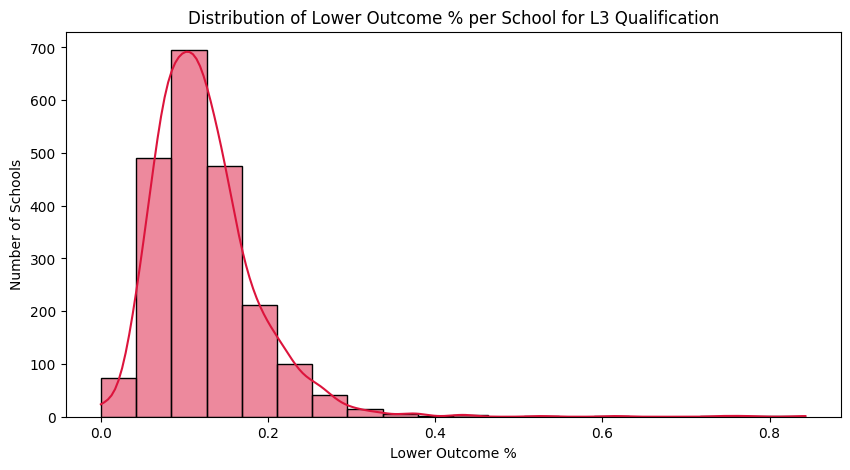

In [ ]:
# --- Histogram of Lower Outcome Percentage for Level 3 Qualifications ---
# This section generates a histogram to visualize the distribution of the calculated
# 'LOWER_OUTCOME_PCT' (percentage of students with 'Not Sustained' or 'Not Captured'
# outcomes) across different schools for students who completed Level 3 qualifications.
# The histogram provides insights into the frequency of different lower outcome percentages
# within the Level 3 school population.

plt.figure(figsize=(10, 5))
# Create a new figure with a specified size for the plot.

sns.histplot(L3_df['LOWER_OUTCOME_PCT'], bins=20, kde=True, color='crimson')
# Generate a histogram using the 'LOWER_OUTCOME_PCT' column from the Level 3 DataFrame (L3_df).
# 'bins=20' specifies that the data should be divided into 20 bins to show the frequency distribution.
# 'kde=True' overlays a Kernel Density Estimate curve on the histogram to provide a smoothed
# estimate of the probability density function of the data.
# 'color='crimson'' sets the color of the histogram bars and the KDE curve to crimson.

plt.title("Distribution of Lower Outcome % per School for L3 Qualification")
# Set the title of the histogram.

plt.xlabel("Lower Outcome %")
# Label the x-axis as "Lower Outcome %".

plt.ylabel("Number of Schools")
# Label the y-axis as "Number of Schools", indicating the frequency of schools within each percentage bin.

plt.show()
# Display the generated histogram.

The histograms above illustrate the distribution of the percentage of students with lower outcomes (Not Sustained + Not Captured) per school for Level 3, Level 2, and Level 1/Other Qualifications. By examining these distributions, we can infer the typical prevalence and variability of these less positive outcomes across different qualification levels.

**Level 3 Lower Outcome Percentage:** The distribution for Level 3 qualifications is heavily skewed towards the lower end of the percentage scale. The majority of schools exhibit a relatively low percentage of students with lower outcomes, with a peak around 5-10%. As the percentage increases, the number of schools at that level drops off sharply, indicating that higher percentages of 'Not Sustained' or 'Not Captured' students are less common for Level 3 completers. The long tail extending towards higher percentages suggests that while infrequent, some schools do experience a more significant proportion of students in these categories.

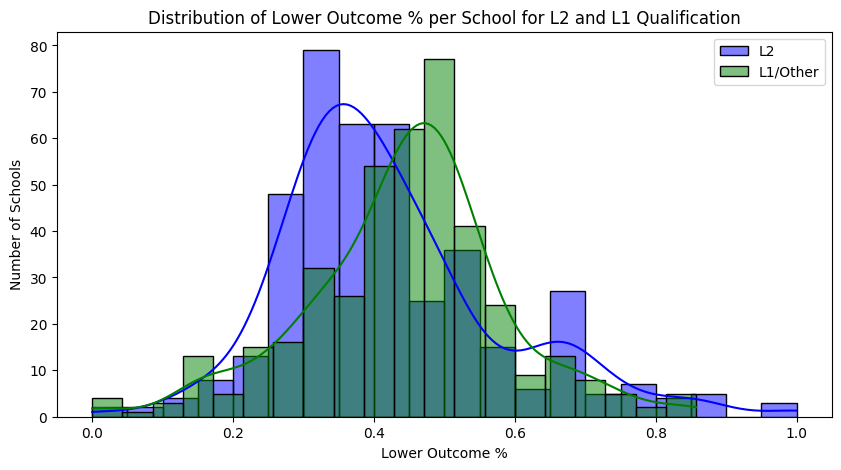

In [ ]:
plt.figure(figsize=(10, 5))
# Create a new figure with a specified size for the plot.

sns.histplot(L2_df['LOWER_OUTCOME_PCT'], bins=20, kde=True, color='blue', label='L2')
# Generate a histogram for the 'LOWER_OUTCOME_PCT' from the Level 2 DataFrame (L2_df).
# 'bins=20' divides the data into 20 bins.
# 'kde=True' overlays a Kernel Density Estimate curve.
# 'color='blue'' sets the color of the bars and KDE for Level 2 to blue.
# 'label='L2'' assigns a label for the legend.

sns.histplot(LALLOTH_df['LOWER_OUTCOME_PCT'], bins=20, kde=True, color='green', label='L1/Other')
# Generate a second histogram on the same axes for the 'LOWER_OUTCOME_PCT' from the
# Level 1 and Other Qualifications DataFrame (LALLOTH_df).
# 'bins=20' ensures consistent binning with the Level 2 histogram.
# 'kde=True' overlays a KDE curve for this group as well.
# 'color='green'' sets the color to green.
# 'label='L1/Other'' assigns a label for the legend.

plt.title("Distribution of Lower Outcome % per School for L2 and L1 Qualification")
# Set the title of the combined histogram.

plt.xlabel("Lower Outcome %")
# Label the x-axis.

plt.ylabel("Number of Schools")
# Label the y-axis.

plt.legend()
# Display the legend to distinguish between the Level 2 and Level 1/Other distributions.

plt.show()
# Display the generated plot.

**Level 2 and Level 1/Other Lower Outcome Percentage:** The distributions for Level 2 and Level 1/Other Qualifications, presented in the lower subplot, show a different pattern. Both distributions are shifted towards higher lower outcome percentages compared to Level 3. Level 2 exhibits a primary peak around 30-40%, suggesting that a substantial number of schools experience this level of lower outcomes. The distribution for Level 1/Other Qualifications is broader and appears to peak at an even higher percentage, around 40-50%, indicating a greater prevalence of 'Not Sustained' or 'Not Captured' outcomes for students in these qualification categories. Both Level 2 and Level 1/Other distributions also show a wider spread compared to Level 3, suggesting greater variability in these outcomes across schools.

The comparative distributions of lower outcome percentages across qualification levels reveal a clear trend. Level 3 qualifications are generally associated with a lower proportion of students in the 'Not Sustained' or 'Not Captured' categories, suggesting more positive and well-documented post-study pathways for this group. In contrast, Level 2 and particularly Level 1/Other Qualifications exhibit a higher prevalence of these less positive outcomes, indicating potential challenges in sustained engagement or data capture for students completing these levels. The wider spread observed in the Level 2 and Level 1/Other distributions also suggests greater variability in how schools manage or report these outcomes for their students. These findings underscore the importance of considering qualification level when analyzing student outcomes and highlight potential areas where targeted interventions or improved data collection might be necessary, especially for students with lower-level qualifications.

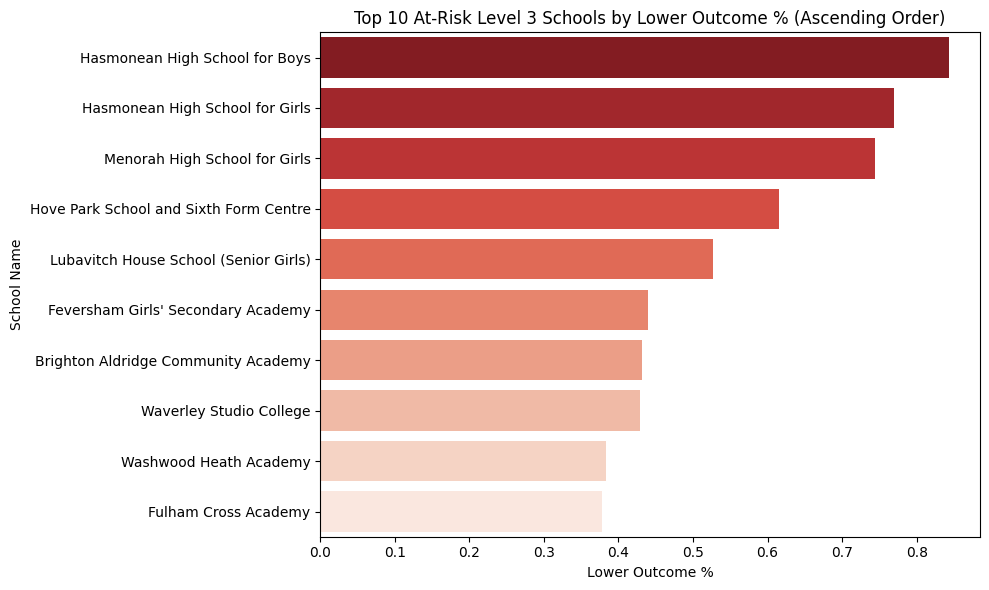

In [ ]:
# --- Top 10 Level 3 Schools by Lower Outcome Percentage ---
# Identifies and visualizes the 10 schools with the highest proportion of 'Not Sustained'
# or 'Not Captured' outcomes using a horizontal bar plot.

# Select top 10 schools by 'LOWER_OUTCOME_PCT'.
top_risk_schools = L3_df.nlargest(10, 'LOWER_OUTCOME_PCT')

# Sort by 'LOWER_OUTCOME_PCT' in descending order.
top_risk_schools = top_risk_schools.sort_values(by='LOWER_OUTCOME_PCT', ascending=False)

# Convert 'URN' to string for categorical plotting.
top_risk_schools['URN'] = top_risk_schools['URN'].astype(str)

# Create horizontal bar plot.
plt.figure(figsize=(10, 6))
sns.barplot(x='LOWER_OUTCOME_PCT', y='SCHNAME', data=top_risk_schools, palette="Reds_r")
plt.title("Top 10 At-Risk Level 3 Schools by Lower Outcome % (Ascending Order)")
plt.xlabel("Lower Outcome %")
plt.ylabel("School Name")
plt.tight_layout()
plt.show()

This chart shows the ten Level 3 schools with the largest proportion of students in 'Not Sustained' or 'Not Captured' destinations. The horizontal bars, colored in increasing shades of red, represent the percentage of these lower outcomes for each school.

**Key Points:**

* **Wide Range:** Lower outcome percentages vary significantly, from around 35% to over 80% among these top 10 schools.
* **High-Risk Identification:** The chart pinpoints schools where a large fraction of Level 3 students lack sustained positive destinations or have unrecorded outcomes.
* **Intervention Focus:** These high-ranking schools may benefit from targeted support to improve student transitions.
* **Data Issues:** High 'Not Captured' rates could indicate data collection problems.

This visualization helps identify Level 3 institutions facing the greatest challenges in ensuring positive and recorded post-study pathways.

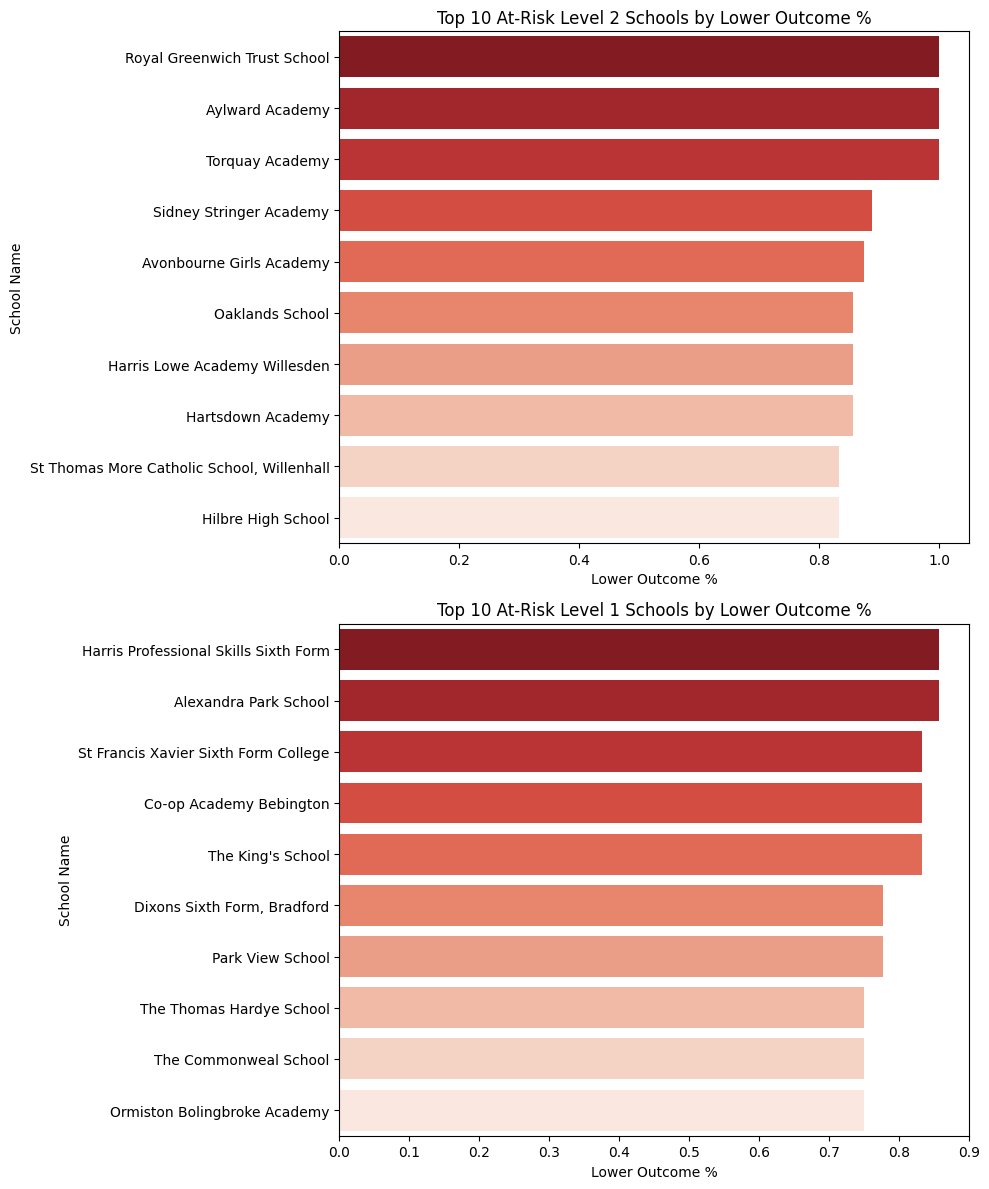

In [ ]:
# --- Identify Top 10 Schools by Lower Outcome Percentage for Level 2 and Level 1/Other ---

# Level 2: Select and sort top 10 schools
top_risk_L2 = L2_df.nlargest(10, 'LOWER_OUTCOME_PCT').sort_values(by='LOWER_OUTCOME_PCT', ascending=False)
top_risk_L2['URN'] = top_risk_L2['URN'].astype(str)

# Level 1/Other: Select and sort top 10 schools
top_risk_LALLOTH = LALLOTH_df.nlargest(10, 'LOWER_OUTCOME_PCT').sort_values(by='LOWER_OUTCOME_PCT', ascending=False)
top_risk_LALLOTH['URN'] = top_risk_LALLOTH['URN'].astype(str)

# --- Create Subplots ---
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Level 2
sns.barplot(x='LOWER_OUTCOME_PCT', y='SCHNAME', data=top_risk_L2, palette="Reds_r", ax=axes[0])
axes[0].set_title("Top 10 At-Risk Level 2 Schools by Lower Outcome %")
axes[0].set_xlabel("Lower Outcome %")
axes[0].set_ylabel("School Name")

# Plot for Level 1 and Other
sns.barplot(x='LOWER_OUTCOME_PCT', y='SCHNAME', data=top_risk_LALLOTH, palette="Reds_r", ax=axes[1])
axes[1].set_title("Top 10 At-Risk Level 1 Schools by Lower Outcome %")
axes[1].set_xlabel("Lower Outcome %")
axes[1].set_ylabel("School Name")

plt.tight_layout()
plt.show()

These visualizations clearly highlight the institutions within Level 2 and Level 1 qualifications that require attention to address the high rates of lower outcomes and ensure better post-study transitions for their students.

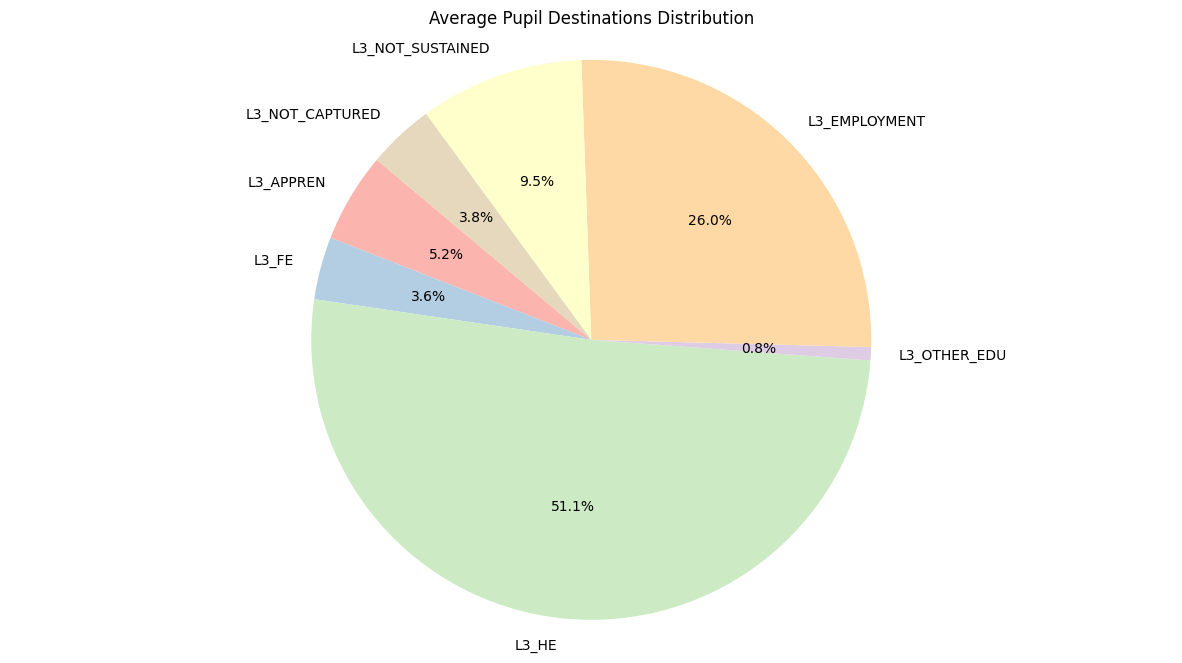

In [ ]:
# Average Level 3 destination counts.
avg_destinations = L3_df[L3_destination_columns].mean()

# Pie chart of average destinations.
plt.figure(figsize=(15, 8))
plt.pie(avg_destinations, labels=avg_destinations.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
plt.title("Average Pupil Destinations Distribution")
plt.axis('equal')
plt.show()

The pie charts above illustrate the average distribution of pupil destinations for Level 3. Each slice represents a destination category, with its size indicating the average proportion of students progressing to that pathway across all schools within the respective qualification level.

**Level 3 Average Destinations:** The Level 3 pie chart reveals that, on average, the largest proportion of students progress to Higher Education ('L3_HE'), accounting for over half of the destinations. Employment ('L3_EMPLOYMENT') is the next most significant pathway. Further Education ('L3_FE') and Apprenticeships ('L3_APPREN') represent smaller average proportions. The 'Not Sustained' and 'Not Captured' categories constitute the smallest average proportions for Level 3.







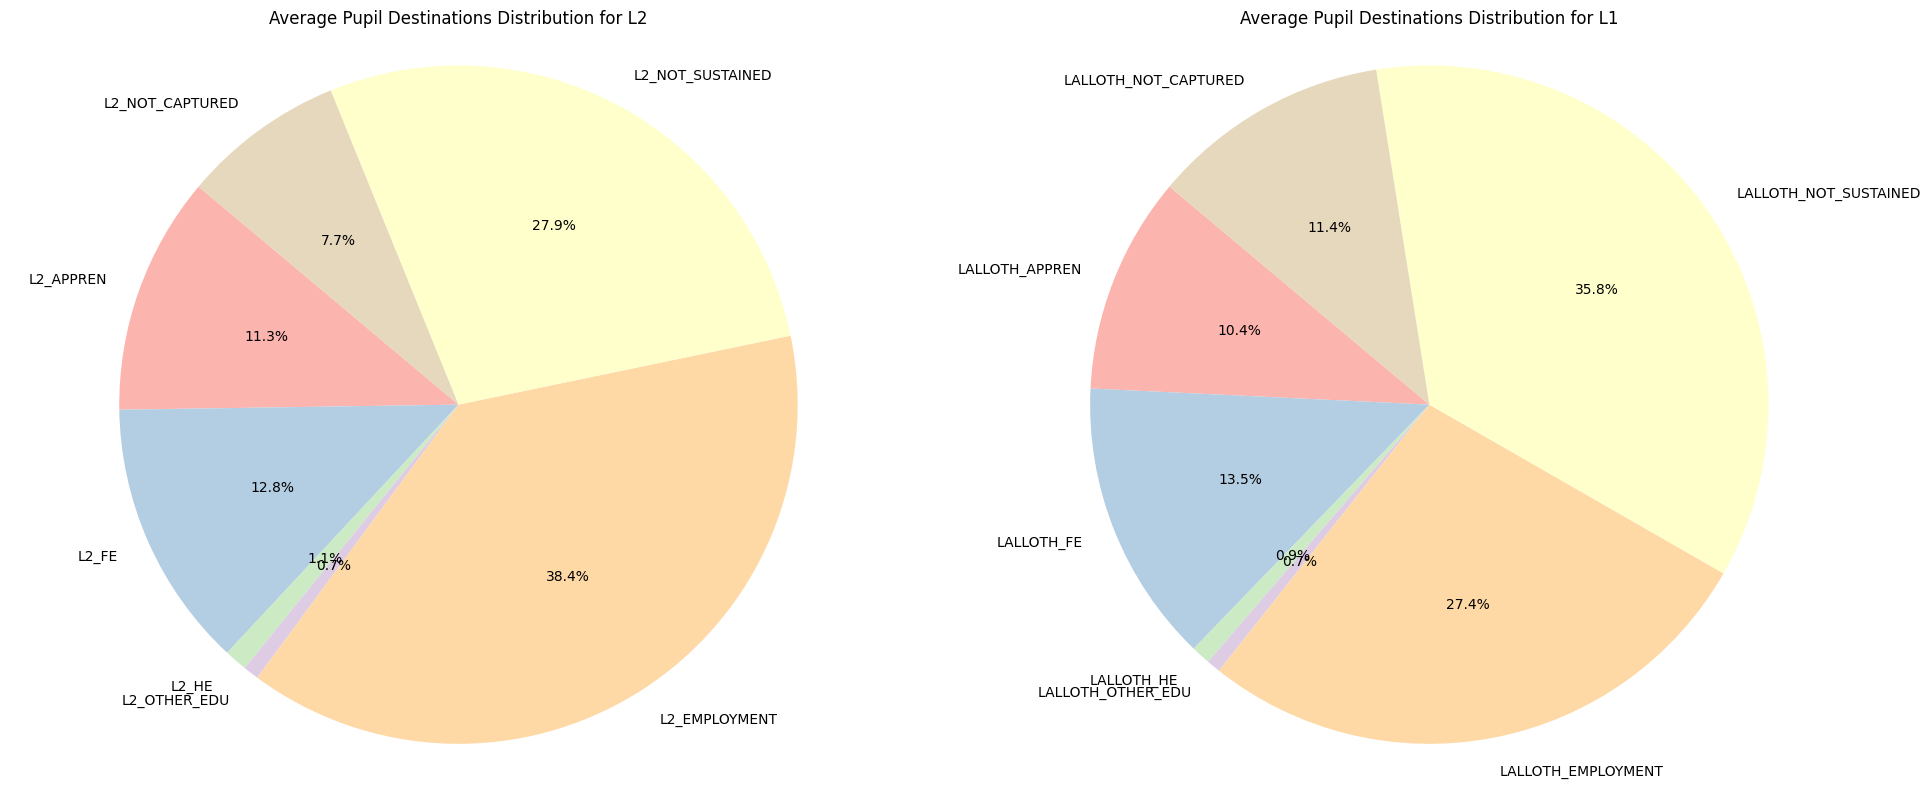

In [ ]:
# Average Level 2 and Level 1 destination counts.
avg_destinations_L2 = L2_df[L2_destination_columns].mean()
avg_destinations_L1 = LALLOTH_df[LALLOTH_destination_columns].mean()

# Create subplots (1 row, 2 columns).
fig, axes = plt.subplots(1, 2, figsize=(20, 8))

# Pie chart for Level 2.
axes[0].pie(avg_destinations_L2, labels=avg_destinations_L2.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
axes[0].set_title("Average Pupil Destinations Distribution for L2")
axes[0].axis('equal')

# Pie chart for Level 1.
axes[1].pie(avg_destinations_L1, labels=avg_destinations_L1.index, autopct='%1.1f%%', startangle=140, colors=plt.cm.Pastel1.colors)
axes[1].set_title("Average Pupil Destinations Distribution for L1")
axes[1].axis('equal')

plt.tight_layout()
plt.show()

**Level 2 Average Destinations:** The distribution for Level 2 shows a notable shift. While Higher Education ('L2_HE') still represents a considerable proportion, it is smaller than for Level 3. Employment ('L2_EMPLOYMENT') becomes the largest average destination for Level 2 students. Further Education ('L2_FE') and Apprenticeships ('L2_APPREN') represent more substantial average proportions compared to Level 3. The 'Not Sustained' and 'Not Captured' categories show a slightly larger average proportion than in Level 3.

**Level 1 and Other Qualifications Average Destinations:** The pie chart for Level 1/Other Qualifications presents a further divergence. Higher Education ('LALLOTH_HE') accounts for a much smaller average proportion. Employment ('LALLOTH_EMPLOYMENT') remains a significant pathway, but Further Education ('LALLOTH_FE') and the 'Not Sustained' category represent the largest average proportions. Apprenticeships ('LALLOTH_APPREN') show a more substantial average proportion compared to the higher qualification levels, and 'Not Captured' also constitutes a notable average proportion.

The comparative analysis of these average destination distributions across qualification levels highlights distinct post-study trends. Higher Education is the dominant average pathway for Level 3 completers, while Employment takes precedence for Level 2. For Level 1/Other Qualifications, Further Education and 'Not Sustained' outcomes represent the largest average proportions. Apprenticeships generally become a more significant average pathway at lower qualification levels. Notably, the average proportion of students in the 'Not Sustained' and 'Not Captured' categories tends to increase as the qualification level decreases, suggesting potential challenges in sustained engagement or data capture for students with lower-level qualifications. These average distributions provide a valuable overview of the typical post-study landscape for each qualification level, setting the stage for further investigation into the factors influencing these trends.

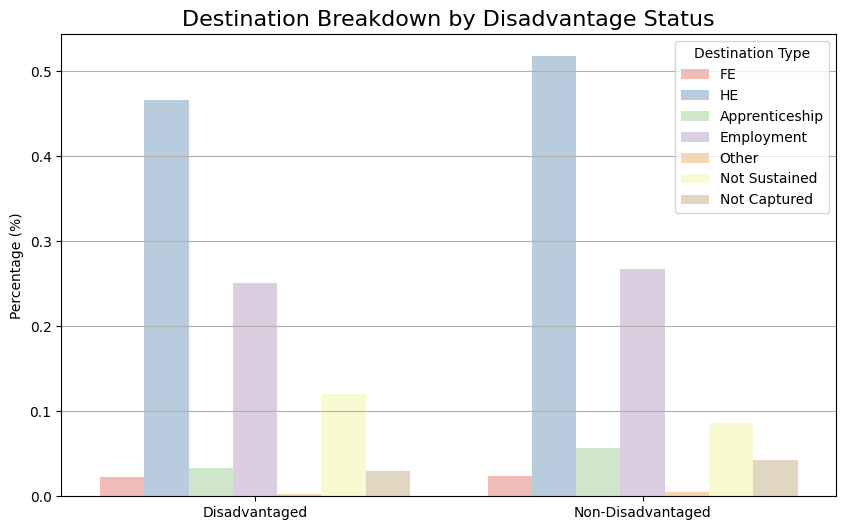

In [ ]:
# --- Create DataFrame for Destination Percentages by Disadvantage Status (Level 3) ---
# This section creates a Pandas DataFrame to store the average percentage of students
# progressing to different destinations, broken down by their disadvantage status
# (Disadvantaged vs. Non-Disadvantaged) within the Level 3 cohort.

stack_df = pd.DataFrame({
    'Group': ['Disadvantaged', 'Non-Disadvantaged'],
    'FE': [L3_df['L3_FEPER_DIS'].mean(), L3_df['L3_FEPER_NONDIS'].mean()],
    'HE': [L3_df['L3_HEPER_DIS'].mean(), L3_df['L3_HEPER_NONDIS'].mean()],
    'Apprenticeship': [L3_df['L3_APPRENPER_DIS'].mean(), L3_df['L3_APPRENPER_NONDIS'].mean()],
    'Employment': [L3_df['L3_EMPLOYMENTPER_DIS'].mean(), L3_df['L3_EMPLOYMENTPER_NONDIS'].mean()],
    'Other': [L3_df['L3_OTHER_EDUPER_DIS'].mean(), L3_df['L3_OTHER_EDUPER_NONDIS'].mean()],
    'Not Sustained': [L3_df['L3_NOT_SUSTAINEDPER_DIS'].mean(), L3_df['L3_NOT_SUSTAINEDPER_NONDIS'].mean()],
    'Not Captured': [L3_df['L3_NOT_CAPTUREDPER_DIS'].mean(), L3_df['L3_NOT_CAPTUREDPER_NONDIS'].mean()]
})
# This dictionary is used to create the DataFrame. 'Group' indicates disadvantage status,
# and subsequent keys represent destination categories. The values are the mean percentages
# for each destination, calculated separately for disadvantaged and non-disadvantaged students
# using columns from the Level 3 DataFrame (L3_df).

# --- Melt DataFrame for Easier Seaborn Plotting ---
# This section reshapes the DataFrame from a wide format to a long format, which is more
# suitable for creating grouped bar plots using Seaborn. The 'melt' function unpivots
# the DataFrame.

stack_melted = stack_df.melt(id_vars='Group', var_name='Destination', value_name='Percentage')
# 'id_vars='Group'' specifies the column(s) to keep as identifier variables.
# 'var_name='Destination'' specifies the name to use for the column containing the former column names (destinations).
# 'value_name='Percentage'' specifies the name to use for the column containing the values from the former columns (percentages).

# --- Create Grouped Bar Plot of Destination Percentages by Disadvantage Status ---
# This section generates a bar plot using Seaborn to visualize the average percentage
# of students in each destination category, grouped by their disadvantage status.

plt.figure(figsize=(10,6))
# Set the size of the figure.

sns.barplot(
    data=stack_melted,
    x='Group',
    y='Percentage',
    hue='Destination',
    palette='Pastel1'
)
# Create the bar plot.
# 'data=stack_melted' specifies the DataFrame to use.
# 'x='Group'' sets the disadvantage status on the x-axis.
# 'y='Percentage'' sets the average destination percentage on the y-axis.
# 'hue='Destination'' groups the bars by destination category, creating separate bars for each destination within each disadvantage group.
# 'palette='Pastel1'' applies a pastel color scheme to the bars for different destinations.

plt.title('Destination Breakdown by Disadvantage Status', fontsize=16)
# Set the title of the plot.

plt.ylabel('Percentage (%)')
# Label the y-axis.

plt.xlabel('')
# Remove the label for the x-axis as 'Group' is self-explanatory.

plt.legend(title='Destination Type')
# Display the legend to identify the colors corresponding to each destination type.

plt.grid(axis='y')
# Add a horizontal grid to the y-axis for easier reading of percentages.

plt.show()
# Display the generated plot.

The grouped bar charts illustrate the average percentage of students progressing to different destinations, broken down by disadvantage status (Disadvantaged vs. Non-Disadvantaged). Each group of bars represents a disadvantage status, with colored bars within each group showing the average percentage for various destination types (FE, HE, Apprenticeship, Employment, Other, Not Sustained, Not Captured).

**Level 3 Destination Breakdown by Disadvantage:** For Level 3 students, the chart indicates a notable difference in progression to Higher Education (HE) between non-disadvantaged and disadvantaged students, with a higher percentage of non-disadvantaged students progressing to HE. Conversely, a slightly higher percentage of disadvantaged students are observed in the 'Not Sustained' category. The proportions for other destinations like FE, Apprenticeship, and Employment appear relatively similar between the two groups.


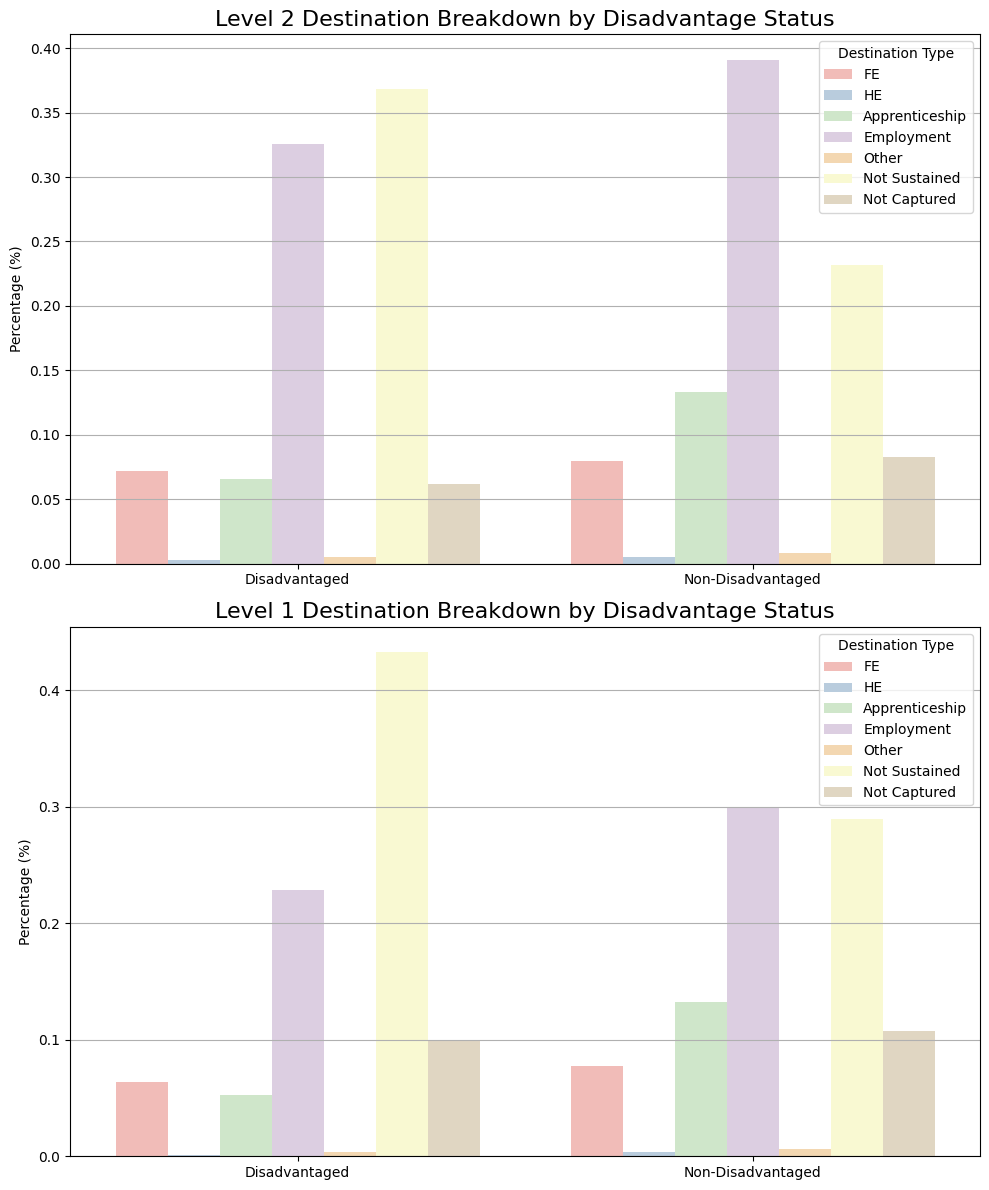

In [ ]:
# --- Create DataFrames for Destination Percentages by Disadvantage Status ---

# Level 2
stack_df_L2 = pd.DataFrame({
    'Group': ['Disadvantaged', 'Non-Disadvantaged'],
    'FE': [L2_df['L2_FEPER_DIS'].mean(), L2_df['L2_FEPER_NONDIS'].mean()],
    'HE': [L2_df['L2_HEPER_DIS'].mean(), L2_df['L2_HEPER_NONDIS'].mean()],
    'Apprenticeship': [L2_df['L2_APPRENPER_DIS'].mean(), L2_df['L2_APPRENPER_NONDIS'].mean()],
    'Employment': [L2_df['L2_EMPLOYMENTPER_DIS'].mean(), L2_df['L2_EMPLOYMENTPER_NONDIS'].mean()],
    'Other': [L2_df['L2_OTHER_EDUPER_DIS'].mean(), L2_df['L2_OTHER_EDUPER_NONDIS'].mean()],
    'Not Sustained': [L2_df['L2_NOT_SUSTAINEDPER_DIS'].mean(), L2_df['L2_NOT_SUSTAINEDPER_NONDIS'].mean()],
    'Not Captured': [L2_df['L2_NOT_CAPTUREDPER_DIS'].mean(), L2_df['L2_NOT_CAPTUREDPER_NONDIS'].mean()]
})
stack_melted_L2 = stack_df_L2.melt(id_vars='Group', var_name='Destination', value_name='Percentage')

# Level 1/Other
stack_df_LALLOTH = pd.DataFrame({
    'Group': ['Disadvantaged', 'Non-Disadvantaged'],
    'FE': [LALLOTH_df['LALLOTH_FEPER_DIS'].mean(), LALLOTH_df['LALLOTH_FEPER_NONDIS'].mean()],
    'HE': [LALLOTH_df['LALLOTH_HEPER_DIS'].mean(), LALLOTH_df['LALLOTH_HEPER_NONDIS'].mean()],
    'Apprenticeship': [LALLOTH_df['LALLOTH_APPRENPER_DIS'].mean(), LALLOTH_df['LALLOTH_APPRENPER_NONDIS'].mean()],
    'Employment': [LALLOTH_df['LALLOTH_EMPLOYMENTPER_DIS'].mean(), LALLOTH_df['LALLOTH_EMPLOYMENTPER_NONDIS'].mean()],
    'Other': [LALLOTH_df['LALLOTH_OTHER_EDUPER_DIS'].mean(), LALLOTH_df['LALLOTH_OTHER_EDUPER_NONDIS'].mean()],
    'Not Sustained': [LALLOTH_df['LALLOTH_NOT_SUSTAINEDPER_DIS'].mean(), LALLOTH_df['LALLOTH_NOT_SUSTAINEDPER_NONDIS'].mean()],
    'Not Captured': [LALLOTH_df['LALLOTH_NOT_CAPTUREDPER_DIS'].mean(), LALLOTH_df['LALLOTH_NOT_CAPTUREDPER_NONDIS'].mean()]
})
stack_melted_LALLOTH = stack_df_LALLOTH.melt(id_vars='Group', var_name='Destination', value_name='Percentage')

# --- Create Subplots ---
fig, axes = plt.subplots(2, 1, figsize=(10, 12))

# Plot for Level 2
sns.barplot(
    data=stack_melted_L2,
    x='Group',
    y='Percentage',
    hue='Destination',
    palette='Pastel1',
    ax=axes[0]
)
axes[0].set_title('Level 2 Destination Breakdown by Disadvantage Status', fontsize=16)
axes[0].set_ylabel('Percentage (%)')
axes[0].set_xlabel('')
axes[0].legend(title='Destination Type')
axes[0].grid(axis='y')

# Plot for Level 1/Other
sns.barplot(
    data=stack_melted_LALLOTH,
    x='Group',
    y='Percentage',
    hue='Destination',
    palette='Pastel1',
    ax=axes[1]
)
axes[1].set_title('Level 1 Destination Breakdown by Disadvantage Status', fontsize=16)
axes[1].set_ylabel('Percentage (%)')
axes[1].set_xlabel('')
axes[1].legend(title='Destination Type')
axes[1].grid(axis='y')

plt.tight_layout()
plt.show()

**Level 2 Destination Breakdown by Disadvantage:** The Level 2 chart reveals a more pronounced disparity. Non-disadvantaged students show a considerably higher percentage progressing to Higher Education compared to their disadvantaged peers. Employment appears as a more significant pathway for disadvantaged students at Level 2. The 'Not Sustained' and 'Not Captured' categories also show a higher percentage for disadvantaged students compared to non-disadvantaged students at this level.

**Level 1 and Other Qualifications Destination Breakdown by Disadvantage:** The breakdown for Level 1/Other Qualifications shows the most significant differences related to disadvantage. A much lower percentage of disadvantaged students progress to Higher Education compared to non-disadvantaged students. Employment and, notably, the 'Not Sustained' and 'Not Captured' categories represent a considerably larger proportion of outcomes for disadvantaged students at this level. Apprenticeships also appear as a slightly more prominent pathway for disadvantaged students compared to HE.

The comparative analysis across the three qualification levels consistently highlights the impact of disadvantage on post-study pathways. At all levels, non-disadvantaged students exhibit a higher propensity to progress to Higher Education. Conversely, disadvantaged students, particularly at Level 2 and Level 1/Other Qualifications, show a higher percentage in the 'Not Sustained' and 'Not Captured' categories, suggesting greater challenges in achieving sustained positive outcomes or in having their destinations recorded. Employment emerges as a relatively more significant pathway for disadvantaged students, especially at the lower qualification levels. These findings underscore the persistent influence of disadvantage on educational progression and the need for targeted interventions to ensure equitable outcomes for all students, particularly those from disadvantaged backgrounds.

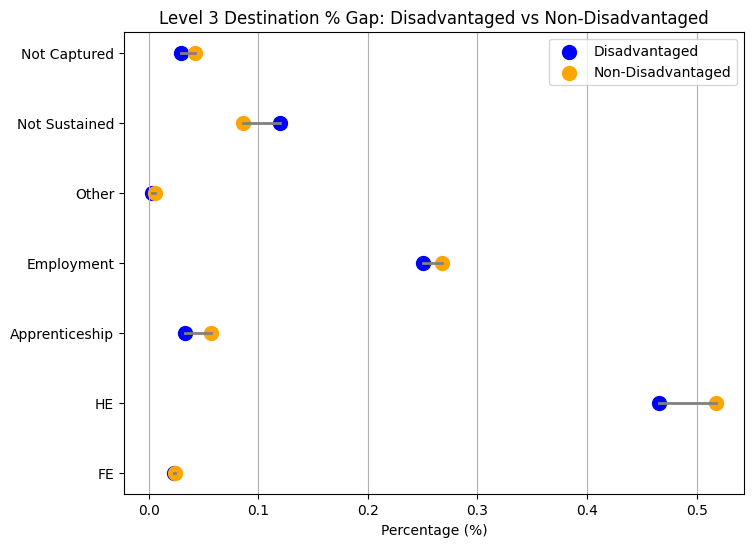

In [ ]:
# --- Create DataFrame for Destination Percentage Gap by Disadvantage (Level 3) ---
# This section generates a Pandas DataFrame to store the average destination percentages
# for both disadvantaged and non-disadvantaged students at Level 3, facilitating
# the calculation and visualization of the gap between these two groups for each destination.

gap_df = pd.DataFrame({
    'Destination': ['FE', 'HE', 'Apprenticeship', 'Employment', 'Other','Not Sustained','Not Captured'],
    'Disadvantaged': [
        L3_df['L3_FEPER_DIS'].mean(),
        L3_df['L3_HEPER_DIS'].mean(),
        L3_df['L3_APPRENPER_DIS'].mean(),
        L3_df['L3_EMPLOYMENTPER_DIS'].mean(),
        L3_df['L3_OTHER_EDUPER_DIS'].mean(),
        L3_df['L3_NOT_SUSTAINEDPER_DIS'].mean(),
        L3_df['L3_NOT_CAPTUREDPER_DIS'].mean()
    ],
    'Non_Disadvantaged': [
        L3_df['L3_FEPER_NONDIS'].mean(),
        L3_df['L3_HEPER_NONDIS'].mean(),
        L3_df['L3_APPRENPER_NONDIS'].mean(),
        L3_df['L3_EMPLOYMENTPER_NONDIS'].mean(),
        L3_df['L3_OTHER_EDUPER_NONDIS'].mean(),
        L3_df['L3_NOT_SUSTAINEDPER_NONDIS'].mean(),
        L3_df['L3_NOT_CAPTUREDPER_NONDIS'].mean()
    ]
})
# The DataFrame 'gap_df' is created with columns for 'Destination' and the average
# percentages for 'Disadvantaged' and 'Non_Disadvantaged' students across different
# destination categories, calculated from the Level 3 DataFrame (L3_df).

# --- Visualize Destination Percentage Gap ---
# This section generates a scatter plot with connecting lines to visualize the difference
# in average destination percentages between disadvantaged and non-disadvantaged students
# for each destination category.

plt.figure(figsize=(8,6))
# Set the size of the figure.

for i, row in gap_df.iterrows():
    plt.plot([row['Disadvantaged'], row['Non_Disadvantaged']], [row['Destination']] * 2, color='gray', lw=2)
    plt.scatter(row['Disadvantaged'], row['Destination'], color='blue', label='Disadvantaged' if i==0 else "", s=100)
    plt.scatter(row['Non_Disadvantaged'], row['Destination'], color='orange', label='Non-Disadvantaged' if i==0 else "", s=100)
# This loop iterates through each row of the 'gap_df'. For each destination:
# - It plots a gray line connecting the percentage for disadvantaged and non-disadvantaged students.
# - It plots a blue scatter point for the disadvantaged percentage.
# - It plots an orange scatter point for the non-disadvantaged percentage.
# - The legend labels are added only for the first iteration to avoid redundancy.

plt.xlabel('Percentage (%)')
# Label the x-axis.

plt.title('Level 3 Destination % Gap: Disadvantaged vs Non-Disadvantaged')
# Set the title of the plot.

plt.legend()
# Display the legend.

plt.grid(axis='x')
# Add a vertical grid to the x-axis for easier comparison of percentages.

plt.show()
# Display the plot.

The scatter plots with connecting lines visualize the difference in average destination percentages between disadvantaged (blue dots) and non-disadvantaged (yellow dots) students. Each horizontal line connects the average percentages for a specific destination for the two disadvantage groups, with the length of the line indicating the magnitude of the gap.

**Level 3 Destination Percentage Gap:** The Level 3 plot shows a clear positive gap for Higher Education (HE), with non-disadvantaged students progressing at a higher average percentage. Conversely, there's a slight negative gap for 'Not Sustained', indicating a slightly higher percentage for disadvantaged students. The gaps for other destinations like FE, Apprenticeship, and Employment appear relatively small.

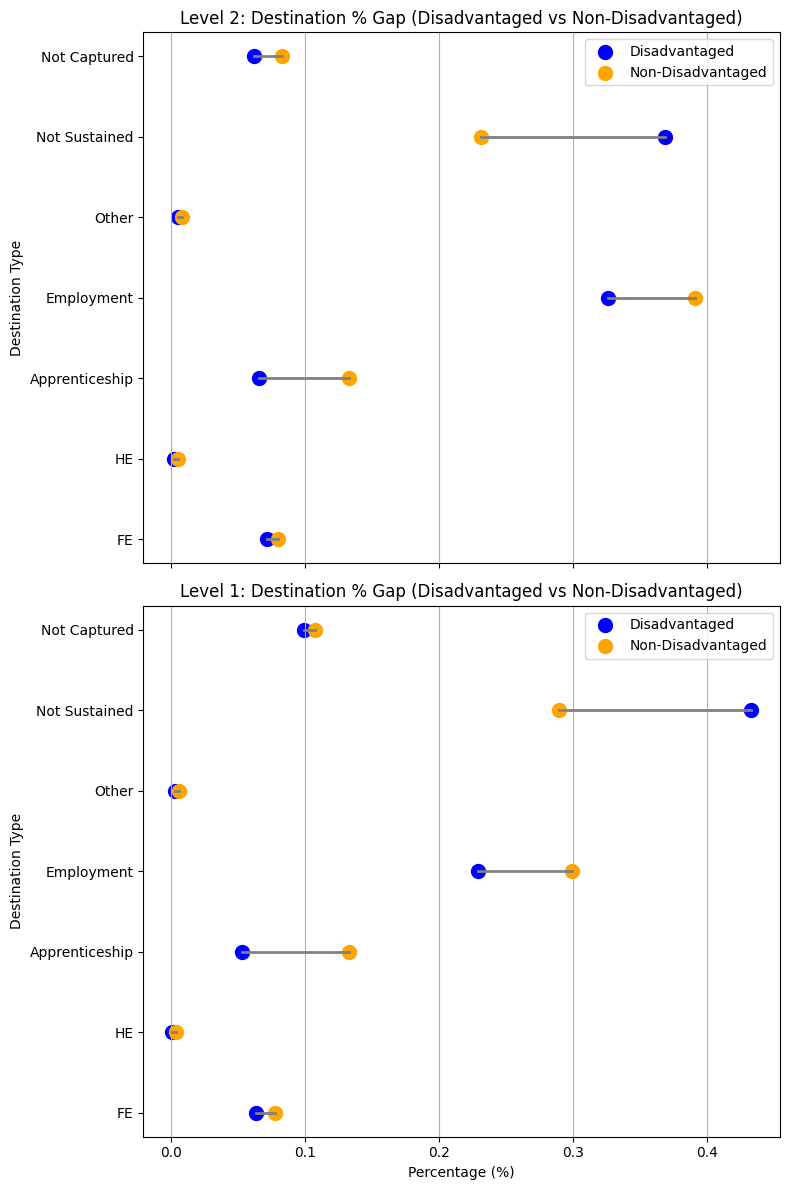

In [ ]:
# --- Create DataFrames for Destination Percentage Gap ---

# Level 2
gap_df_L2 = pd.DataFrame({
    'Destination': ['FE', 'HE', 'Apprenticeship', 'Employment', 'Other','Not Sustained','Not Captured'],
    'Disadvantaged': [
        L2_df['L2_FEPER_DIS'].mean(),
        L2_df['L2_HEPER_DIS'].mean(),
        L2_df['L2_APPRENPER_DIS'].mean(),
        L2_df['L2_EMPLOYMENTPER_DIS'].mean(),
        L2_df['L2_OTHER_EDUPER_DIS'].mean(),
        L2_df['L2_NOT_SUSTAINEDPER_DIS'].mean(),
        L2_df['L2_NOT_CAPTUREDPER_DIS'].mean()
    ],
    'Non_Disadvantaged': [
        L2_df['L2_FEPER_NONDIS'].mean(),
        L2_df['L2_HEPER_NONDIS'].mean(),
        L2_df['L2_APPRENPER_NONDIS'].mean(),
        L2_df['L2_EMPLOYMENTPER_NONDIS'].mean(),
        L2_df['L2_OTHER_EDUPER_NONDIS'].mean(),
        L2_df['L2_NOT_SUSTAINEDPER_NONDIS'].mean(),
        L2_df['L2_NOT_CAPTUREDPER_NONDIS'].mean()
    ]
})

# Level 1/Other
gap_df_LALLOTH = pd.DataFrame({
    'Destination': ['FE', 'HE', 'Apprenticeship', 'Employment', 'Other','Not Sustained','Not Captured'],
    'Disadvantaged': [
        LALLOTH_df['LALLOTH_FEPER_DIS'].mean(),
        LALLOTH_df['LALLOTH_HEPER_DIS'].mean(),
        LALLOTH_df['LALLOTH_APPRENPER_DIS'].mean(),
        LALLOTH_df['LALLOTH_EMPLOYMENTPER_DIS'].mean(),
        LALLOTH_df['LALLOTH_OTHER_EDUPER_DIS'].mean(),
        LALLOTH_df['LALLOTH_NOT_SUSTAINEDPER_DIS'].mean(),
        LALLOTH_df['LALLOTH_NOT_CAPTUREDPER_DIS'].mean()
    ],
    'Non_Disadvantaged': [
        LALLOTH_df['LALLOTH_FEPER_NONDIS'].mean(),
        LALLOTH_df['LALLOTH_HEPER_NONDIS'].mean(),
        LALLOTH_df['LALLOTH_APPRENPER_NONDIS'].mean(),
        LALLOTH_df['LALLOTH_EMPLOYMENTPER_NONDIS'].mean(),
        LALLOTH_df['LALLOTH_OTHER_EDUPER_NONDIS'].mean(),
        LALLOTH_df['LALLOTH_NOT_SUSTAINEDPER_NONDIS'].mean(),
        LALLOTH_df['LALLOTH_NOT_CAPTUREDPER_NONDIS'].mean()
    ]
})

# --- Create Subplots ---
fig, axes = plt.subplots(2, 1, figsize=(8, 12), sharex=True)

# Plot for Level 2
for i, row in gap_df_L2.iterrows():
    axes[0].plot([row['Disadvantaged'], row['Non_Disadvantaged']], [row['Destination']] * 2, color='gray', lw=2)
    axes[0].scatter(row['Disadvantaged'], row['Destination'], color='blue', label='Disadvantaged' if i==0 else "", s=100)
    axes[0].scatter(row['Non_Disadvantaged'], row['Destination'], color='orange', label='Non-Disadvantaged' if i==0 else "", s=100)
axes[0].set_title('Level 2: Destination % Gap (Disadvantaged vs Non-Disadvantaged)')
axes[0].set_ylabel('Destination Type')
axes[0].grid(axis='x')
axes[0].legend()

# Plot for Level 1/Other
for i, row in gap_df_LALLOTH.iterrows():
    axes[1].plot([row['Disadvantaged'], row['Non_Disadvantaged']], [row['Destination']] * 2, color='gray', lw=2)
    axes[1].scatter(row['Disadvantaged'], row['Destination'], color='blue', label='Disadvantaged' if i==0 else "", s=100)
    axes[1].scatter(row['Non_Disadvantaged'], row['Destination'], color='orange', label='Non-Disadvantaged' if i==0 else "", s=100)
axes[1].set_title('Level 1: Destination % Gap (Disadvantaged vs Non-Disadvantaged)')
axes[1].set_xlabel('Percentage (%)')
axes[1].set_ylabel('Destination Type')
axes[1].grid(axis='x')
axes[1].legend()

plt.tight_layout()
plt.show()

**Level 2 Destination Percentage Gap:** The Level 2 plot reveals a more pronounced positive gap for HE, favoring non-disadvantaged students. A notable negative gap exists for Employment, suggesting a higher average percentage for disadvantaged students. The 'Not Sustained' and 'Not Captured' categories also show negative gaps, indicating higher percentages for disadvantaged students compared to their non-disadvantaged peers.

**Level 1 and Other Qualifications Destination Percentage Gap:** The Level 1/Other plot exhibits the most significant disparities. The positive gap for HE favoring non-disadvantaged students is substantial. Conversely, there are considerable negative gaps for Employment and, particularly, 'Not Sustained', indicating much higher average percentages for disadvantaged students in these categories. Apprenticeships also show a slight negative gap.

The comparative analysis of destination percentage gaps across the three qualification levels consistently underscores the impact of disadvantage on post-study pathways. A clear trend emerges where non-disadvantaged students have a considerable advantage in progressing to Higher Education at all levels. Conversely, disadvantaged students are consistently over-represented in the 'Not Sustained' category, and often in 'Not Captured' and Employment, particularly at the lower qualification levels. The magnitude of these gaps tends to widen as the qualification level decreases, suggesting that disadvantage may have a more pronounced influence on outcomes for students with Level 2 and Level 1/Other Qualifications. These visualizations highlight the persistent and widening inequalities in post-study destinations based on disadvantage, emphasizing the need for targeted interventions to mitigate these gaps and promote more equitable outcomes across all qualification levels.

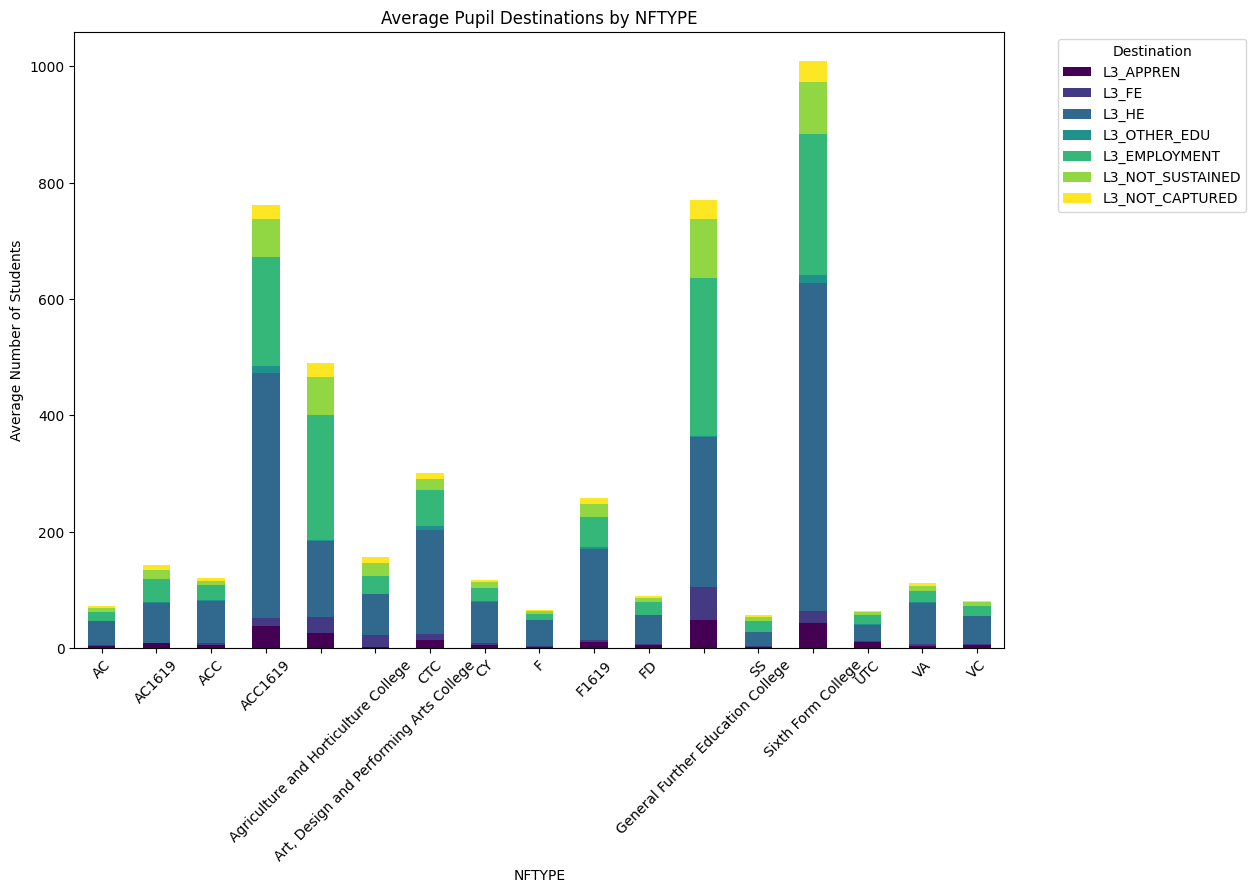

In [ ]:
# --- Calculate Average Destinations by NFTYPE (Level 3) ---
# This section groups the Level 3 DataFrame by 'NFTYPE'
# and then calculates the mean (average) number of students progressing to each
# destination category within each NFTYPE group. This allows for the comparison of
# typical destination patterns across different types of schools.

avg_destinations_by_nftype = L3_df.groupby('NFTYPE')[L3_destination_columns].mean()
# 'L3_df.groupby('NFTYPE')' groups the DataFrame by the unique values in the 'NFTYPE' column.
# '[L3_destination_columns]' selects only the columns representing destination counts.
# '.mean()' calculates the average of these destination columns for each 'NFTYPE' group.

# --- Stacked Bar Plot of Average Destinations by NFTYPE ---
# This section generates a stacked bar plot to visualize the average number of students
# in each destination category for each 'NFTYPE'. The stacked bars allow for easy
# comparison of the total average number of students and the contribution of each
# destination type within each school type.

avg_destinations_by_nftype.plot(kind='bar', stacked=True, colormap='viridis', figsize=(12, 8))
# '.plot(kind='bar', stacked=True, ...)' creates a stacked bar plot directly from the grouped and averaged DataFrame.
# 'stacked=True' ensures that the bars for different destinations within each NFTYPE are stacked on top of each other.
# 'colormap='viridis'' applies the 'viridis' color scheme to the different destination segments.
# 'figsize=(12, 8)' sets the size of the plot.

plt.title('Average Pupil Destinations by NFTYPE')
# Sets the title of the plot.

plt.xlabel('NFTYPE')
# Labels the x-axis with 'NFTYPE'.

plt.ylabel('Average Number of Students')
# Labels the y-axis with 'Average Number of Students'.

plt.xticks(rotation=45)
# Rotates the x-axis labels for better readability, especially if NFTYPE categories are long.

plt.legend(title='Destination', bbox_to_anchor=(1.05, 1), loc='upper left')
# Adds a legend to identify the colors corresponding to each destination category.
# 'bbox_to_anchor=(1.05, 1), loc='upper left'' positions the legend outside the plot area to prevent overlap.

# plt.tight_layout()
# This line is commented out, but it would typically adjust the plot to fit all elements nicely.

plt.show()
# Displays the generated stacked bar plot.

The stacked bar chart illustrates the average number of Level 3 students progressing to various destinations, categorized by their institution type (NFTYPE). Each bar represents a specific NFTYPE, and the stacked segments within each bar show the average number of students transitioning to different pathways, as indicated by the color-coded legend on the right.

**Key Observations:**

* **Dominance of Higher Education in Sixth Form Colleges:** Notably, 'Sixth Form College' (SS) exhibits a significantly higher average number of students progressing to Higher Education ('L3_HE') compared to other institution types. This suggests that Sixth Form Colleges are a primary pathway to university for Level 3 students.
* **Varied Employment Pathways:** The average number of students entering employment ('L3_EMPLOYMENT') varies considerably across NFTYPES. For instance, 'General Further Education College' (F) and potentially some specialist colleges show a relatively higher average number of students moving into employment compared to Sixth Form Colleges.
* **Further Education and Apprenticeships:** The prevalence of Further Education ('L3_FE') and Apprenticeships ('L3_APPREN') also differs by institution type, indicating the diverse educational and vocational focus of these establishments.
* **'Not Sustained' and 'Not Captured' Outcomes:** The yellow and light yellow segments, representing 'L3_NOT_SUSTAINED' and 'L3_NOT_CAPTURED' destinations, show varying average numbers across NFTYPES. Some institution types appear to have a higher average number of students in these less certain outcome categories, potentially warranting further investigation.
* **Specialist Institutions:** Certain NFTYPES, such as 'Agriculture and Horticulture College' and 'Art, Design and Performing Arts College', show distinct destination profiles likely aligned with their specific educational focus.

This analysis by institution type (NFTYPE) reveals substantial heterogeneity in the average post-Level 3 pathways of students. Sixth Form Colleges appear strongly oriented towards Higher Education, while other college types facilitate more direct entry into employment or further vocational training. The varying levels of 'Not Sustained' and 'Not Captured' outcomes across institution types may also reflect differences in student support, data tracking, or the nature of the educational programs offered. Understanding these average destination patterns by NFTYPE provides valuable context for interpreting overall Level 3 progression trends and for tailoring support and resources to the specific needs and typical pathways of students from different types of institutions.

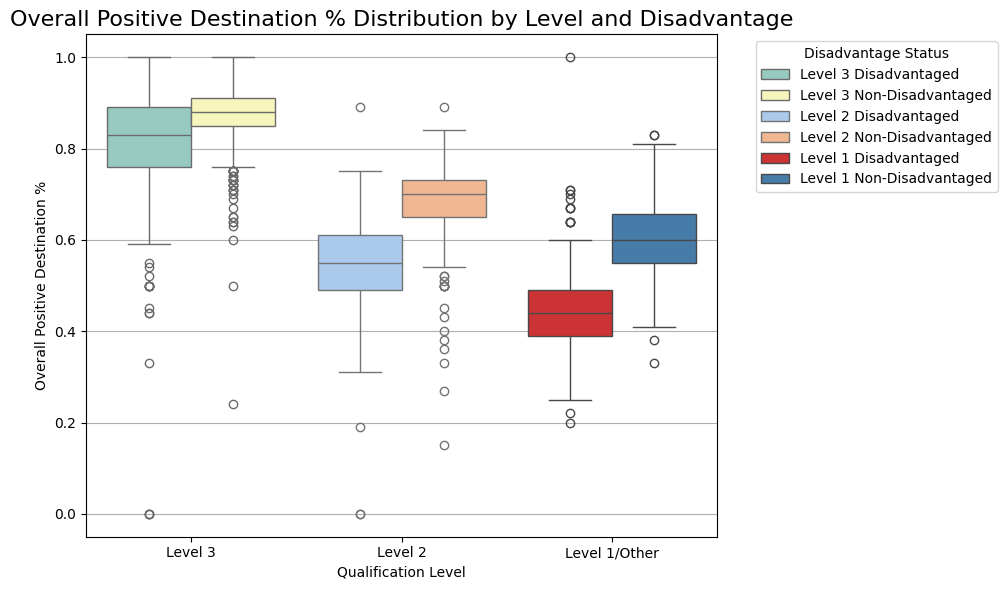

In [ ]:
# --- Prepare DataFrames for Box Plots ---

# Level 3: Create and melt DataFrame for boxplot
boxplot_df_L3 = pd.DataFrame({
    'Level 3 Disadvantaged': L3_df['L3_OVERALLPER_DIS'].reset_index(drop=True),
    'Level 3 Non-Disadvantaged': L3_df['L3_OVERALLPER_NONDIS'].reset_index(drop=True),
    'Level': 'Level 3'
}).melt(id_vars='Level', var_name='Group', value_name='Overall Destination %')

# Level 2: Create and melt DataFrame for boxplot
boxplot_df_L2 = pd.DataFrame({
    'Level 2 Disadvantaged': L2_df['L2_OVERALLPER_DIS'].reset_index(drop=True),
    'Level 2 Non-Disadvantaged': L2_df['L2_OVERALLPER_NONDIS'].reset_index(drop=True),
    'Level': 'Level 2'
}).melt(id_vars='Level', var_name='Group', value_name='Overall Destination %')

# Level 1/Other: Create and melt DataFrame for boxplot
boxplot_df_LALLOTH = pd.DataFrame({
    'Level 1 Disadvantaged': LALLOTH_df['LALLOTH_OVERALLPER_DIS'].reset_index(drop=True),
    'Level 1 Non-Disadvantaged': LALLOTH_df['LALLOTH_OVERALLPER_NONDIS'].reset_index(drop=True),
    'Level': 'Level 1/Other'
}).melt(id_vars='Level', var_name='Group', value_name='Overall Destination %')

# --- Combined Box Plot of Overall Positive Destination Percentage ---
# This section generates box plots to visualize the distribution of overall positive
# destination percentages across different qualification levels and by disadvantage status.
# The 'melted' DataFrames are used to facilitate the grouping and plotting.

plt.figure(figsize=(10, 6))
# Set the size of the figure.

sns.boxplot(data=boxplot_df_L3, x='Level', y='Overall Destination %', hue='Group', palette='Set3')
# Create a box plot for Level 3 data, with 'Level' on the x-axis, 'Overall Destination %' on the y-axis,
# and separate boxes for 'Disadvantaged' and 'Non-Disadvantaged' groups using the 'Set3' palette.

sns.boxplot(data=boxplot_df_L2, x='Level', y='Overall Destination %', hue='Group', palette='pastel')
# Create a box plot for Level 2 data, overlaid on the same axes.

sns.boxplot(data=boxplot_df_LALLOTH, x='Level', y='Overall Destination %', hue='Group', palette='Set1')
# Create a box plot for Level 1/Other data, overlaid on the same axes.

plt.title('Overall Positive Destination % Distribution by Level and Disadvantage', fontsize=16)
# Set the title of the plot.

plt.xlabel('Qualification Level')
# Label the x-axis.

plt.ylabel('Overall Positive Destination %')
# Label the y-axis.

plt.grid(axis='y')
# Add a horizontal grid for better readability.

plt.legend(title='Disadvantage Status', bbox_to_anchor=(1.05, 1), loc='upper left')
# Display the legend to identify the boxes for each disadvantage group.

plt.tight_layout()
# Adjust the plot layout to prevent labels from overlapping.

plt.show()
# Display the generated box plot.

The box plot compares the distribution of overall positive destination percentages across Level 3, Level 2, and Level 1/Other qualifications, separated by disadvantage status.

**Key Points:**

* **Level 3:** High overall positive destination rates for both groups, with a slight advantage for non-disadvantaged students.
* **Level 2:** Lower overall positive destination rates compared to Level 3, with a clearer advantage for non-disadvantaged students.
* **Level 1/Other:** Lowest overall positive destination rates, with a significant disparity favoring non-disadvantaged students.
* **Disadvantage Impact:** Non-disadvantaged students consistently show higher median positive destination percentages across all levels, with the gap widening at lower qualification levels.
* **Variability:** Lower qualification levels, particularly for disadvantaged students, exhibit greater variability in positive outcomes.

Disadvantage consistently correlates with lower overall positive destination percentages, and this gap widens at lower qualification levels. While Level 3 shows the most positive outcomes overall, disparities based on disadvantage persist. The increasing variability for disadvantaged students at lower levels suggests a greater need for targeted support to improve their post-study success.







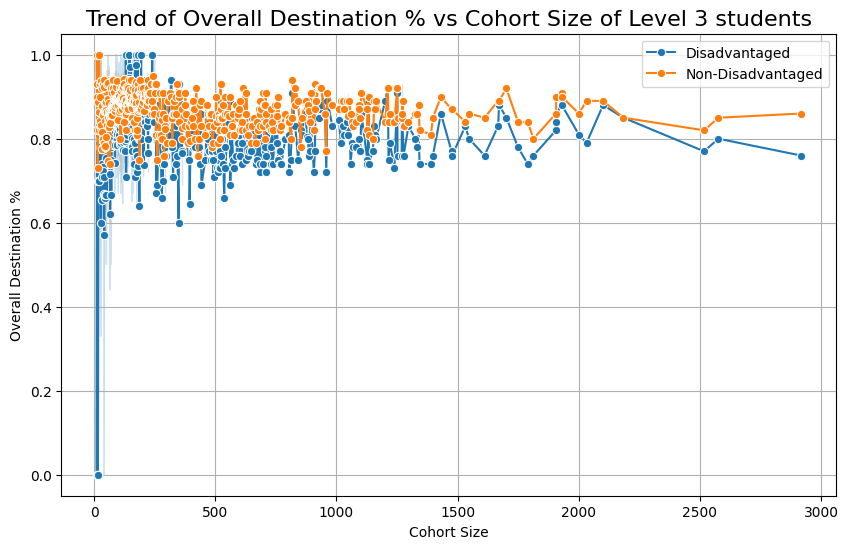

In [ ]:
# If you have rows for different schools/years
plt.figure(figsize=(10,6))
sns.lineplot(data=L3_df, x='L3_COHORT', y='L3_OVERALLPER_DIS', label='Disadvantaged', marker='o')
sns.lineplot(data=L3_df, x='L3_COHORT', y='L3_OVERALLPER_NONDIS', label='Non-Disadvantaged', marker='o')
plt.title('Trend of Overall Destination % vs Cohort Size of Level 3 students', fontsize=16)
plt.xlabel('Cohort Size')
plt.ylabel('Overall Destination %')
plt.legend()
plt.grid(True)
plt.show()

The figure displays line plots illustrating the trend of overall positive destination percentage against cohort size for disadvantaged and non-disadvantaged. Each point represents a school, and the lines connect schools sorted by cohort size.

**Level 3 Trends:** The Level 3 plot indicates a general trend of higher overall positive destination percentages for non-disadvantaged students (orange line) compared to disadvantaged students (blue line) across most cohort sizes. For both groups, there appears to be more variability in overall positive destination percentage at smaller cohort sizes, with a tendency towards stabilization at higher percentages as cohort size increases beyond a few hundred students. The gap between the two lines, representing the disadvantage gap, seems to persist across different cohort sizes.

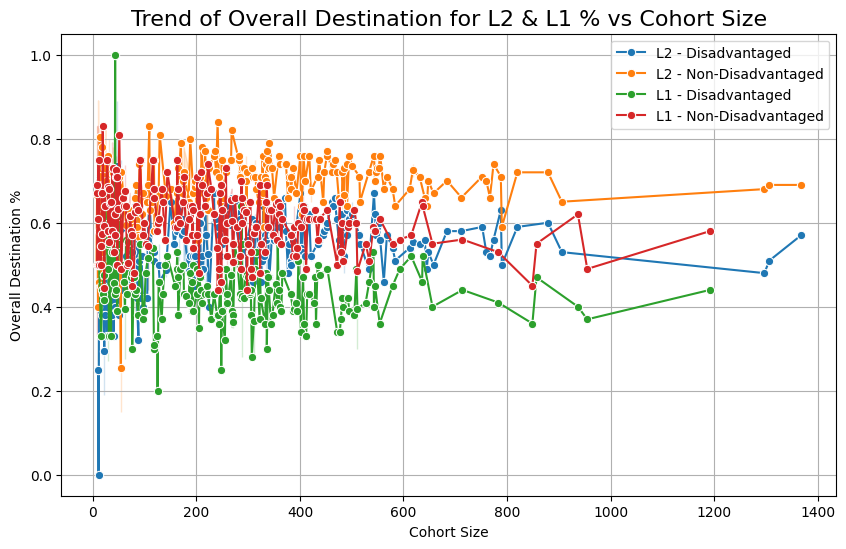

In [ ]:
# If you have rows for different schools/years
plt.figure(figsize=(10,6))
sns.lineplot(data=L2_df, x='L2_COHORT', y='L2_OVERALLPER_DIS', label='L2 - Disadvantaged', marker='o')
sns.lineplot(data=L2_df, x='L2_COHORT', y='L2_OVERALLPER_NONDIS', label='L2 - Non-Disadvantaged', marker='o')
sns.lineplot(data=LALLOTH_df, x='LALLOTH_COHORT', y='LALLOTH_OVERALLPER_DIS', label='L1 - Disadvantaged', marker='o')
sns.lineplot(data=LALLOTH_df, x='LALLOTH_COHORT', y='LALLOTH_OVERALLPER_NONDIS', label='L1 - Non-Disadvantaged', marker='o')
plt.title('Trend of Overall Destination for L2 & L1 % vs Cohort Size', fontsize=16)
plt.xlabel('Cohort Size')
plt.ylabel('Overall Destination %')
plt.legend()
plt.grid(True)
plt.show()

**Level 2 & Level 1 Trends:** The plot shows the trends for Level 2 (blue and orange lines) and Level 1/Other Qualifications (green and red lines). For Level 2, non-disadvantaged students generally maintain a higher overall positive destination percentage than their disadvantaged peers, similar to Level 3. Both lines show considerable fluctuation, especially at smaller cohort sizes. For Level 1/Other, the trends are more varied and show a less consistent gap between disadvantaged and non-disadvantaged students, particularly at smaller cohort sizes. There's a noticeable spread and intersection of the lines, suggesting that the impact of disadvantage on overall positive destination percentage might be more complex and less consistently negative across different cohort sizes at these lower qualification levels.

The relationship between cohort size and overall positive destination percentage appears to show greater stability at larger cohort sizes for Level 3 students. Across all qualification levels, a trend of non-disadvantaged students generally achieving higher overall positive destination percentages is observed, although the magnitude of this gap and its consistency can vary. Notably, the trends for Level 2 and Level 1/Other Qualifications exhibit more volatility, especially at smaller cohort sizes, and the disadvantage gap is less consistently defined compared to Level 3. This suggests that school-level factors or the specific characteristics of smaller cohorts might play a more significant role in influencing overall positive destinations at lower qualification levels, potentially interacting with disadvantage in complex ways. The persistent, albeit varying, gap highlights the continued influence of socio-economic background on student outcomes across the educational spectrum.

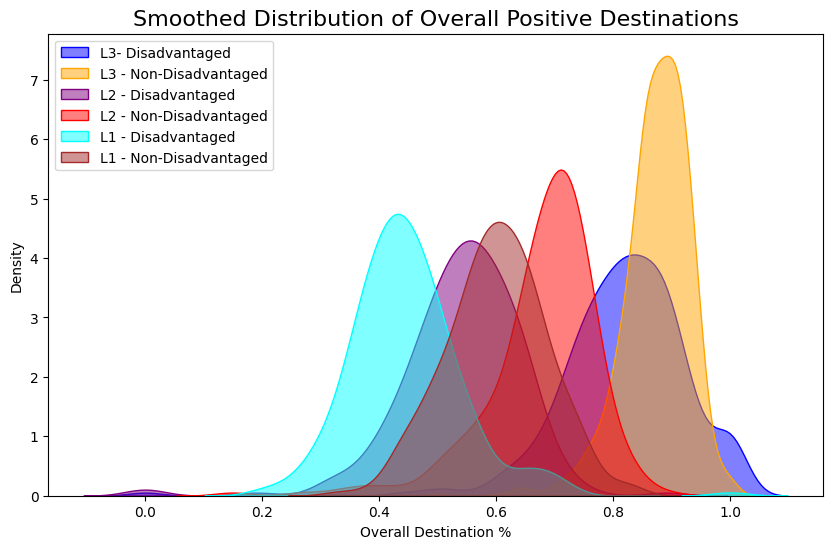

In [ ]:
# --- Smoothed Distribution of Overall Positive Destinations ---
# This section generates a Kernel Density Estimate (KDE) plot to visualize the
# smoothed distribution of the 'Overall Positive Destination %' for different
# qualification levels (Level 3, Level 2, Level 1/Other) and by disadvantage status
# (Disadvantaged and Non-Disadvantaged). KDE plots provide a non-parametric way
# to estimate the probability density function of a continuous variable.

plt.figure(figsize=(10,6))
# Create a new figure with a specified size for better visualization.

sns.kdeplot(L3_df['L3_OVERALLPER_DIS'], label='L3- Disadvantaged', fill=True, color='blue', alpha=.5)
# Generate a KDE plot for the 'Overall Positive Destination %' of disadvantaged students at Level 3.
# 'label' sets the label for the legend.
# 'fill=True' fills the area under the KDE curve.
# 'color' sets the color of the curve and fill.
# 'alpha=.5' sets the transparency of the filled area.

sns.kdeplot(L3_df['L3_OVERALLPER_NONDIS'], label='L3 - Non-Disadvantaged', fill=True, color='orange', alpha=.5)
# Generate a KDE plot for the 'Overall Positive Destination %' of non-disadvantaged students at Level 3.

sns.kdeplot(L2_df['L2_OVERALLPER_DIS'], label='L2 - Disadvantaged', fill=True, color='purple', alpha=.5)
# Generate a KDE plot for the 'Overall Positive Destination %' of disadvantaged students at Level 2.

sns.kdeplot(L2_df['L2_OVERALLPER_NONDIS'], label='L2 - Non-Disadvantaged', fill=True, color='red', alpha=.5)
# Generate a KDE plot for the 'Overall Positive Destination %' of non-disadvantaged students at Level 2.

sns.kdeplot(LALLOTH_df['LALLOTH_OVERALLPER_DIS'], label='L1 - Disadvantaged', fill=True, color='cyan', alpha=.5)
# Generate a KDE plot for the 'Overall Positive Destination %' of disadvantaged students at Level 1/Other.

sns.kdeplot(LALLOTH_df['LALLOTH_OVERALLPER_NONDIS'], label='L1 - Non-Disadvantaged', fill=True, color='brown', alpha=.5)
# Generate a KDE plot for the 'Overall Positive Destination %' of non-disadvantaged students at Level 1/Other.

plt.title('Smoothed Distribution of Overall Positive Destinations', fontsize=16)
# Set the title of the plot.

plt.xlabel('Overall Destination %')
# Label the x-axis.

plt.legend()
# Display the legend to identify each KDE curve.

plt.show()
# Display the generated KDE plot.

The density plot visualizes the smoothed distribution of the overall positive destination percentage for disadvantaged and non-disadvantaged students across Level 3, Level 2, and Level 1/Other Qualifications. Each colored and shaded area represents the estimated probability density of overall positive destination percentages for a specific combination of qualification level and disadvantage status.

**Level 3 Distribution:** The distributions for Level 3 show a strong tendency towards higher overall positive destination percentages for both disadvantaged (blue) and non-disadvantaged (yellow) students. The non-disadvantaged group exhibits a distribution that is more concentrated towards the higher end of the percentage scale, with a peak around 90%, and a relatively narrow spread. The disadvantaged group also peaks at a high percentage, albeit slightly lower than the non-disadvantaged group, and shows a slightly wider distribution with a tail extending towards lower percentages.

**Level 2 Distribution:** The distributions for Level 2 (purple for disadvantaged, red for non-disadvantaged) are shifted towards lower overall positive destination percentages compared to Level 3. Again, the non-disadvantaged group shows a distribution concentrated at higher percentages within the Level 2 range, with a distinct peak. The disadvantaged group's distribution is broader and peaks at a lower percentage than their non-disadvantaged counterparts, indicating a greater variability and a tendency towards less positive overall outcomes.

**Level 1/Other Distribution:** The distributions for Level 1/Other Qualifications (cyan for disadvantaged, brown for non-disadvantaged) are located at the lower end of the overall positive destination percentage spectrum compared to Level 3 and Level 2. The non-disadvantaged group still demonstrates a distribution skewed towards higher percentages within this level, with a discernible peak. The disadvantaged group has the broadest distribution and the lowest peak among all analyzed groups, indicating a wide range of overall positive destination percentages with a central tendency towards lower values.

The smoothed density plots provide a clear visual representation of the differences in overall positive destination percentages across qualification levels and between disadvantaged and non-disadvantaged students. The trend across all levels consistently shows non-disadvantaged students having distributions shifted towards higher overall positive destination percentages compared to their disadvantaged peers. This disparity becomes more pronounced at lower qualification levels, with Level 1/Other showing the most significant separation between the two groups. The increasing spread of the distributions for disadvantaged students at lower levels also suggests greater heterogeneity in their outcomes. These findings reinforce the persistent impact of disadvantage on post-study success and highlight the need for targeted interventions to improve outcomes, particularly for disadvantaged students and those at lower qualification levels.

# **4. Data Cleaning - Census Dataset**

The analysis incorporates school-level data from the School Census, providing a detailed profile of each institution. Key fields include school type, size (total pupils on roll), gender balance, and crucial information on Special Educational Needs (EHC plans, SEN support). Furthermore, the dataset details linguistic diversity (pupils with English as an additional language) and socio-economic background, particularly the percentage of pupils eligible for free school meals in the past 6 years.

**Data Cleaning Considerations:** Before integrating this School Census data, it's crucial to address potential data quality issues. This may involve:

* **Handling Missing Values:** Identifying and appropriately dealing with missing data in key fields (e.g., imputation or exclusion depending on the extent and nature of missingness).
* **Ensuring Data Consistency:** Verifying the consistency of data formats and units across different fields.
* **Identifying and Addressing Outliers:** Detecting and investigating any unusual or extreme values that might skew the analysis.
* **Data Type Conversion:** Ensuring that each column has the correct data type for analysis (e.g., numeric fields are stored as numbers).
* **URN Matching Accuracy:** Rigorously verifying the accuracy of the Unique Reference Number (URN) to ensure correct linking between the School Census and destination datasets, addressing any potential inconsistencies in URN formats or values.

This rich School Census data is being used to supplement the primary destination dataset. By linking each school in the destination data with its corresponding characteristics from the School Census (using the unique URN), we can move beyond simply describing what destinations students reach to understanding why certain patterns might exist. This supplementary data provides crucial context, allowing us to investigate how school-level factors – such as the school's demographic makeup, size, and support provisions – correlate with the proportions of students progressing to different destinations or experiencing lower outcomes. This integration enables a more insightful and nuanced analysis of the determinants of student outcomes, potentially revealing key factors influencing post-study pathways.

In [ ]:
# --- Load England Census Data ---
# This line reads data from a CSV file named 'england_census.csv' located in the '/content/'
# directory and loads it into a Pandas DataFrame named 'census_df'. This DataFrame will
# containing demographic or socio-economic information.
census_df = pd.read_csv('/content/england_census.csv')

In [ ]:
# --- Display the First Few Rows of the Census DataFrame ---
# This line uses the '.head()' method on the 'census_df' DataFrame. By default,
# this method displays the first 5 rows of the DataFrame, along with the column
# headers.
census_df.head()

URN     LA Estab            SCHOOLTYPE   NOR  NORG  NORB   PNORG  \
0  100000  201.0  3614  State-funded primary   244   112   132   45.9%   
1  100001  201.0  6005    Independent school   764   764     0  100.0%   
2  100002  201.0  6006    Independent school   267   103   164   38.6%   
3  100003  201.0  6007    Independent school  1084     0  1084    0.0%   
4  100005  202.0  1048  State-funded nursery   123    60    63   48.8%   

    PNORB  TSENELSE  ... NUMEAL  NUMENGFL NUMUNCFL  PNUMEAL  PNUMENGFL  \
0   54.1%        11  ...  128.0     116.0      0.0    52.5%      47.5%   
1    0.0%         0  ...    NaN       NaN      NaN      NaN        NaN   
2   61.4%         0  ...    NaN       NaN      NaN      NaN        NaN   
3  100.0%         0  ...    NaN       NaN      NaN      NaN        NaN   
4   51.2%         1  ...   29.0      94.0      0.0    23.6%      76.4%   

   PNUMUNCLF NUMFSM NUMFSMEVER NORFSMEVER  PNUMFSMEVER  
0       0.0%   53.0       50.0      205.0        24.4%  
1        NaN    NaN        NaN        NaN          NaN  
2        NaN    NaN        NaN        NaN          NaN  
3        NaN    NaN        NaN        NaN          NaN  
4       0.0%   43.0        NaN        NaN          NaN  

[5 rows x 23 columns]

In [ ]:
# --- Get Information about the Census DataFrame ---
# This line uses the '.info()' method on the 'census_df' DataFrame. This method provides
# a concise summary of the DataFrame
census_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 24447 entries, 0 to 24446
Data columns (total 23 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   URN          24447 non-null  object 
 1   LA           24444 non-null  float64
 2   Estab        24447 non-null  object 
 3   SCHOOLTYPE   24447 non-null  object 
 4   NOR          24447 non-null  int64  
 5   NORG         24447 non-null  int64  
 6   NORB         24447 non-null  int64  
 7   PNORG        24447 non-null  object 
 8   PNORB        24447 non-null  object 
 9   TSENELSE     24447 non-null  int64  
 10  PSENELSE     24447 non-null  object 
 11  TSENELK      24447 non-null  int64  
 12  PSENELK      24447 non-null  object 
 13  NUMEAL       22026 non-null  float64
 14  NUMENGFL     22026 non-null  float64
 15  NUMUNCFL     22026 non-null  float64
 16  PNUMEAL      22026 non-null  object 
 17  PNUMENGFL    22026 non-null  object 
 18  PNUMUNCLF    22026 non-null  object 
 19  NUMF

In [ ]:
# This line uses the '.describe()' method on the 'census_df' DataFrame. This method
# calculates and displays various summary statistics for the numerical columns in the
# DataFrame.
census_df.describe()

LA           NOR          NORG          NORB       TSENELSE  \
count  24444.000000  2.444700e+04  2.444700e+04  2.444700e+04   24447.000000   
mean     696.000777  7.173381e+02  3.509852e+02  3.663529e+02      33.938684   
std      265.578940  3.772248e+04  1.860659e+04  1.911940e+04    1486.487942   
min      201.000000  0.000000e+00  0.000000e+00  0.000000e+00       0.000000   
25%      359.000000  1.450000e+02  6.300000e+01  7.400000e+01       3.000000   
50%      850.000000  2.380000e+02  1.160000e+02  1.220000e+02       7.000000   
75%      891.000000  4.410000e+02  2.150000e+02  2.220000e+02      16.000000   
max      943.000000  4.614990e+06  2.266640e+06  2.348350e+06  159278.000000   

             TSENELK        NUMEAL      NUMENGFL      NUMUNCFL        NUMFSM  \
count   24447.000000  2.202600e+04  2.202600e+04  22026.000000  2.202600e+04   
mean       96.655377  1.601664e+02  6.052363e+02      3.837238  1.895701e+02   
std      5143.700340  8.447916e+03  3.114942e+04    205.460763  9.635933e+03   
min         0.000000  0.000000e+00  0.000000e+00      0.000000  0.000000e+00   
25%        16.000000  6.000000e+00  1.200000e+02      0.000000  2.400000e+01   
50%        34.000000  2.800000e+01  2.000000e+02      0.000000  6.000000e+01   
75%        65.000000  9.400000e+01  3.550000e+02      1.000000  1.240000e+02   
max    651458.000000  1.050199e+06  3.549551e+06  26371.000000  1.120884e+06   

         NUMFSMEVER    NORFSMEVER  
count  2.160000e+04  2.160000e+04  
mean   1.928944e+02  7.157142e+02  
std    9.735976e+03  3.687532e+04  
min    0.000000e+00  1.000000e+00  
25%    2.600000e+01  1.610000e+02  
50%    6.100000e+01  2.350000e+02  
75%    1.250000e+02  4.170000e+02  
max    1.123914e+06  4.346629e+06

In [ ]:
census_df = census_df[census_df['URN'] != 'NAT']

Just as destination data contained national figures requiring removal for school-level analysis, the School Census data also necessitates careful filtering.
This step ensures the School Census data accurately reflects individual school characteristics, preventing national trends from distorting school-specific analyses and correlations with destination data. This precision is vital for reliable insights into school-level factors influencing student outcomes.

In [ ]:
census_df.describe()

LA           NOR          NORG          NORB      TSENELSE  \
count  24444.000000  24444.000000  24444.000000  24444.000000  24444.000000   
mean     696.000777    371.928531    181.888807    190.039723     17.752986   
std      265.578940    363.717690    196.403564    196.676385     36.138739   
min      201.000000      0.000000      0.000000      0.000000      0.000000   
25%      359.000000    145.000000     63.000000     74.000000      3.000000   
50%      850.000000    238.000000    116.000000    122.000000      7.000000   
75%      891.000000    441.000000    215.000000    222.000000     16.000000   
max      943.000000   3467.000000   1917.000000   1812.000000    822.000000   

            TSENELK        NUMEAL      NUMENGFL      NUMUNCFL        NUMFSM  \
count  24444.000000  22023.000000  22023.000000  22023.000000  22023.000000   
mean      50.675626     80.377787    303.562821      1.925759     95.084094   
std       54.090320    135.578943    304.266752      9.705732    106.943163   
min        0.000000      0.000000      0.000000      0.000000      0.000000   
25%       16.000000      6.000000    120.000000      0.000000     24.000000   
50%       34.000000     28.000000    200.000000      0.000000     60.000000   
75%       65.000000     94.000000    355.000000      1.000000    124.000000   
max      684.000000   2293.000000   2499.000000    583.000000   1005.000000   

         NUMFSMEVER    NORFSMEVER  
count  21597.000000  21597.000000  
mean      96.710793    358.266102  
std      107.181695    319.221673  
min        0.000000      1.000000  
25%       26.000000    161.000000  
50%       61.000000    235.000000  
75%      125.000000    417.000000  
max      974.000000   2536.000000

In [ ]:
# --- Select Percentage-Related Columns from Census DataFrame ---
# This line creates a list called 'per_columns'. It iterates through all the column
# names in the 'census_df' DataFrame and includes a column in the list if its name
# starts with the prefix 'P'. This is likely done to select columns that represent
# percentages or proportions within the census data.

per_columns = [col for col in census_df.columns if col.startswith('P')]

# --- Convert Selected Columns to Numeric for Analysis ---
# This loop iterates through each column name stored in the 'per_columns' list.
# For each selected column, it performs the following data cleaning and conversion steps
# to ensure the data is in a numerical format suitable for analysis.

for col in per_columns:
    # Replace 'SUPP' with NaN (Not a Number)
    # This line replaces any occurrences of the string 'SUPP' within the current
    # column with the NumPy NaN value. 'SUPP' might represent suppressed or missing
    # data in the original census file. Converting it to NaN allows Pandas to
    # treat these values as missing.
    census_df[col] = census_df[col].replace('SUPP', np.nan)

    # Remove '%', convert to float, and divide by 100 for percentage
    # This line performs several transformations on the current column:
    # - '.str.rstrip('%')': If the values in the column are strings and end with a
    #   percentage sign ('%'), this part removes the percentage sign.
    # - 'pd.to_numeric(..., errors='coerce')': This function attempts to convert
    #   all values in the column to a numeric type (float). If any value cannot be
    #   converted, it will be replaced with NaN. The 'errors='coerce'' argument
    #   ensures that invalid parsing will result in NaN.
    # - '/ 100': After successful conversion to a numeric type, the values are divided
    #   by 100. This step is crucial if the original percentages were stored as whole
    #   numbers (e.g., 50 for 50%) and need to be represented as proportions (e.g., 0.50)
    #   for mathematical calculations.
    census_df[col] = pd.to_numeric(census_df[col].str.rstrip('%'), errors='coerce') / 100

# **5. Exploratory Data Analysis - Census Dataset**

Following the successful loading and initial cleaning of the School Census data, the next critical phase involves Exploratory Data Analysis (EDA). The primary goal of this stage is to develop a deep understanding of the dataset's characteristics, uncover potential patterns, identify anomalies, and formulate initial hypotheses that can guide further analysis, particularly in its integration with the student destination data.

While the initial steps focus on tabular summaries, the introduction to EDA recognizes the crucial role of visual exploration. Future steps will involve generating visualizations such as histograms, box plots, scatter plots, and bar charts to reveal underlying distributions, relationships between variables, and the prevalence of different categories within the dataset. This visual approach will complement the statistical summaries, offering a more intuitive grasp of the data's complexities.

The insights gained from this introductory EDA will be instrumental in informing subsequent feature engineering efforts, guiding the data integration process with the destination dataset, and ultimately contributing to a more nuanced and insightful analysis of the factors influencing student outcomes. By thoroughly exploring the characteristics of the School Census data at this stage, we lay a robust foundation for uncovering meaningful connections and patterns in the combined datasets.

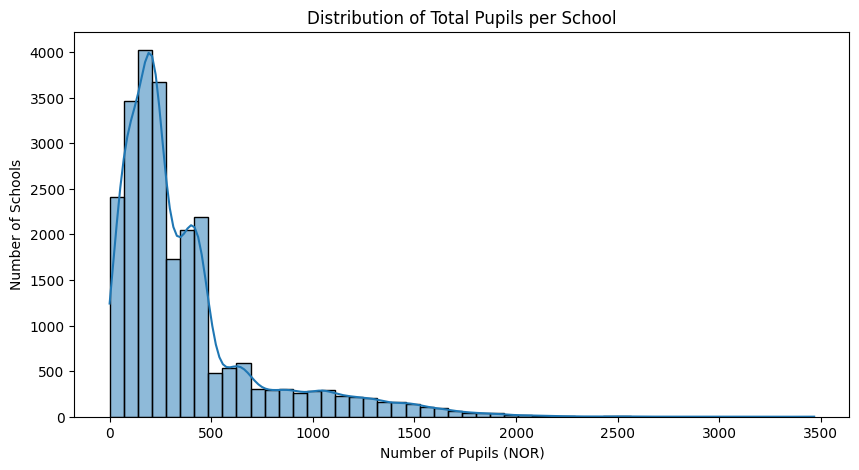

In [ ]:
# --- Distribution of Total Pupils per School ---
# This section generates a histogram with a Kernel Density Estimate (KDE) curve
# to visualize the distribution of the 'NOR' (Number On Roll), which represents
# the total number of pupils in each school within the 'census_df' DataFrame.
# This plot helps to understand the typical school sizes and the frequency of
# different school sizes in the dataset.

plt.figure(figsize=(10, 5))
# Creates a new figure with a specified width and height for better visualization.

sns.histplot(data=census_df, x='NOR', bins=50, kde=True)
# Generates the histogram using Seaborn's 'histplot' function.
# 'data=census_df': Specifies the DataFrame to use for plotting.
# 'x='NOR'': Sets the 'NOR' column as the variable to be plotted on the x-axis.
# 'bins=50': Divides the range of 'NOR' values into 50 intervals (bins) to create the bars of the histogram.
# 'kde=True': Overlays a Kernel Density Estimate (KDE) curve on the histogram. The KDE provides a smoothed estimate of the probability density function of the 'NOR' variable, offering a continuous view of the distribution.

plt.title("Distribution of Total Pupils per School")
# Sets the title of the plot to clearly indicate what the histogram represents.

plt.xlabel("Number of Pupils (NOR)")
# Labels the x-axis with a descriptive name and unit.

plt.ylabel("Number of Schools")
# Labels the y-axis to indicate that the height of the bars represents the number of schools falling into each bin (i.e., having a total number of pupils within that range).

plt.show()
# Displays the generated histogram.

The histogram shows the distribution of total pupils ('NOR') across schools. The right-skewed distribution indicates many schools have smaller pupil counts, with fewer very large schools. A peak around 150-250 pupils represents the most common school size. The spread illustrates the range of school sizes, with a tail suggesting some large outliers.

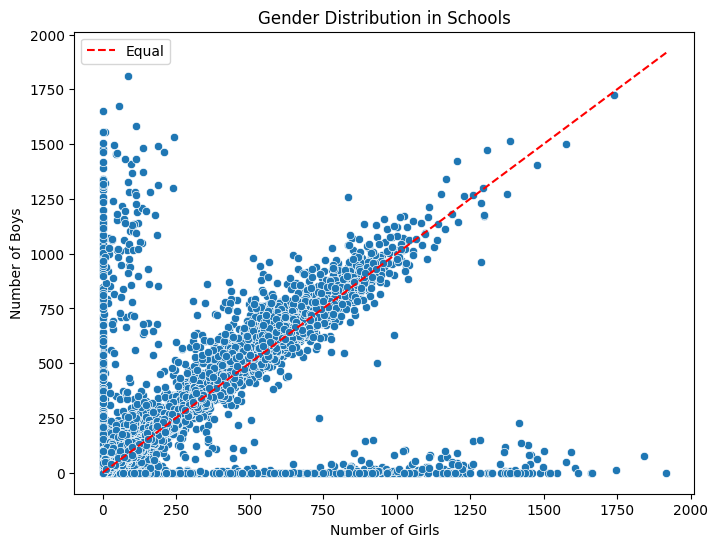

In [ ]:
# --- Gender Distribution in Schools ---
# This section generates a scatter plot to visualize the relationship between the
# number of girls ('NORG') and the number of boys ('NORB') in each school
# within the 'census_df' DataFrame. This helps to understand the gender balance
# across the schools.

plt.figure(figsize=(8, 6))
# Creates a new figure with a specified width and height.

sns.scatterplot(x='NORG', y='NORB', data=census_df)
# Creates the scatter plot using Seaborn's 'scatterplot' function.
# 'x='NORG'': Sets the number of girls on the x-axis.
# 'y='NORB'': Sets the number of boys on the y-axis.
# 'data=census_df': Specifies the DataFrame to use.

plt.title("Gender Distribution in Schools")
# Sets the title of the plot.

plt.xlabel("Number of Girls")
# Labels the x-axis.

plt.ylabel("Number of Boys")
# Labels the y-axis.

plt.plot([0, census_df[['NORG', 'NORB']].max().max()],
         [0, census_df[['NORG', 'NORB']].max().max()],
         'r--', label="Equal")
# Plots a dashed red line representing the scenario where the number of girls equals
# the number of boys. The line extends from the origin to the maximum value observed
# in either 'NORG' or 'NORB'.

plt.legend()
# Displays the legend to identify the 'Equal' line.

plt.show()
# Displays the generated scatter plot.

The scatter plot shows the number of girls versus the number of boys in each school. Most schools cluster around the red dashed line, indicating a relatively balanced gender distribution. However, there's a noticeable spread, with some schools having a higher proportion of either girls or boys. Schools far from the dashed line represent those with a more skewed gender balance.

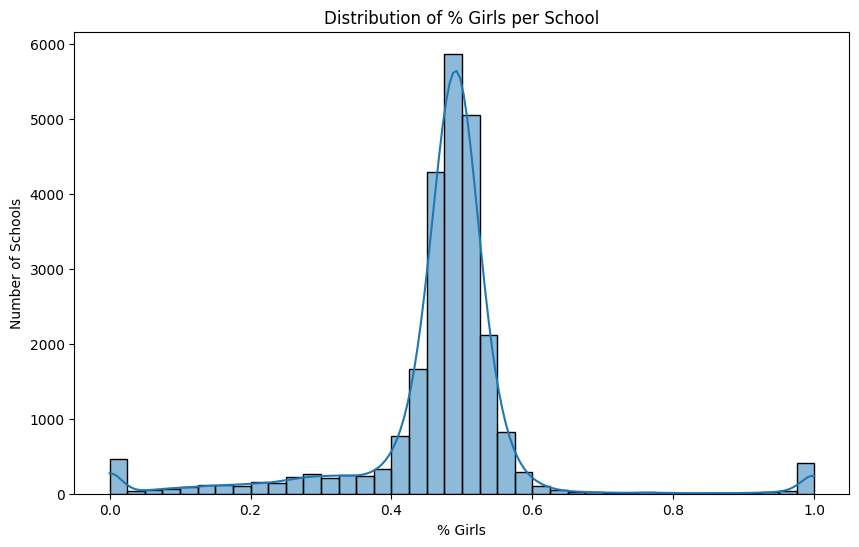

In [ ]:
# --- Distribution of Percentage of Girls per School ---
# This section generates a histogram with a Kernel Density Estimate (KDE) curve
# to visualize the distribution of the 'PNORG' column, which represents the
# percentage of girls in each school within the 'census_df' DataFrame. This plot
# helps to understand the typical proportion of girls across the schools.

plt.figure(figsize=(10, 6))
# Creates a new figure with a specified width and height.

sns.histplot(census_df['PNORG'], bins=40, kde=True)
# Creates the histogram using Seaborn's 'histplot'.
# 'x='PNORG'': Sets the percentage of girls on the x-axis.
# 'bins=40': Divides the percentage range into 40 bins.
# 'kde=True': Overlays a smoothed density estimate.

plt.title("Distribution of % Girls per School")
# Sets the title.

plt.xlabel("% Girls")
# Labels the x-axis.

plt.ylabel("Number of Schools")
# Labels the y-axis.

plt.show()
# Displays the plot.

The histogram shows the distribution of the percentage of girls across schools. The distribution is strongly bimodal, with a large peak around 50% indicating many co-educational schools with a near-equal gender balance. Smaller peaks near 0% and 100% suggest a significant number of single-sex schools (boys' and girls' schools, respectively) in the dataset.

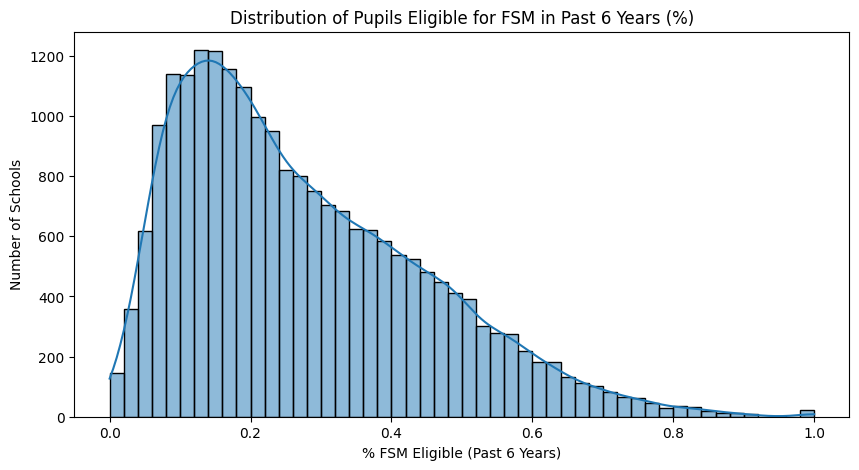

In [ ]:
# --- Distribution of Percentage of Pupils Eligible for FSM (Past 6 Years) ---
# This section generates a histogram with a Kernel Density Estimate (KDE) curve
# to visualize the distribution of 'PNUMFSMEVER', representing the percentage of
# pupils eligible for free school meals in the past 6 years at each school.
# This helps understand the socio-economic profile of the schools.

plt.figure(figsize=(10, 5))
# Creates a new figure with specified dimensions.

sns.histplot(data=census_df, x='PNUMFSMEVER', bins=50, kde=True)
# Creates the histogram using Seaborn.
# 'x='PNUMFSMEVER'': Sets the percentage of FSM eligible pupils on the x-axis.
# 'bins=50': Divides the percentage range into 50 intervals.
# 'kde=True': Overlays a smoothed density estimate.

plt.title("Distribution of Pupils Eligible for FSM in Past 6 Years (%)")
# Sets the title.

plt.xlabel("% FSM Eligible (Past 6 Years)")
# Labels the x-axis.

plt.ylabel("Number of Schools")
# Labels the y-axis.

plt.show()
# Displays the plot.

The histogram displays the distribution of the percentage of pupils eligible for free school meals (FSM) over the past six years across schools. The right-skewed distribution indicates that a larger number of schools have a lower percentage of FSM-eligible pupils, with the peak of the distribution occurring at a relatively low percentage. The tail extending to the right shows that some schools have a very high percentage of pupils from disadvantaged backgrounds based on FSM eligibility.

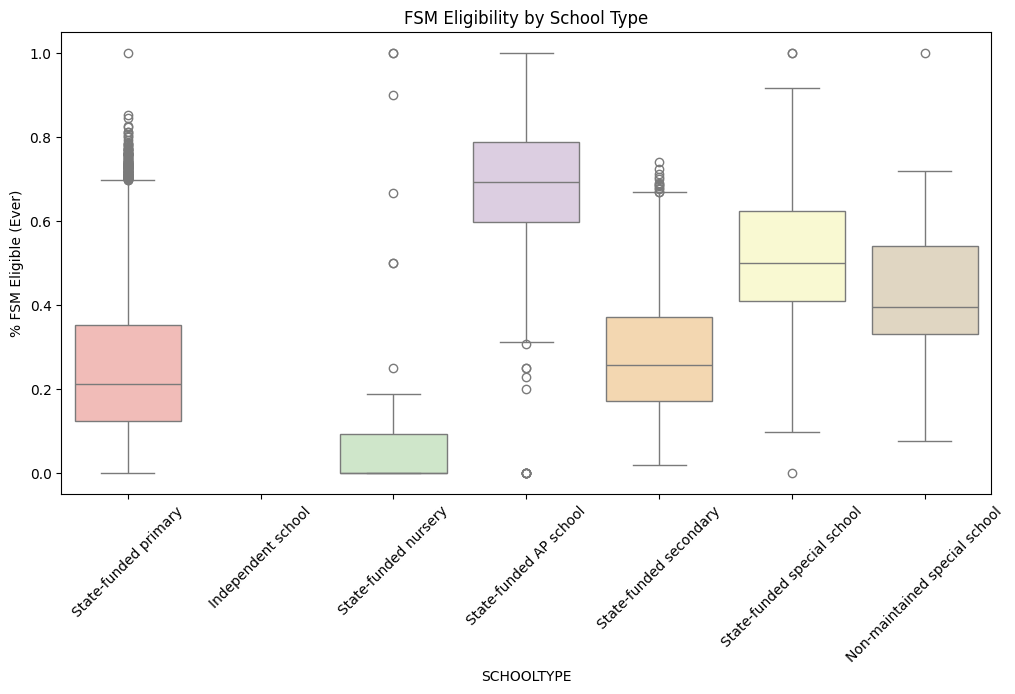

In [ ]:
# --- FSM Eligibility by School Type ---
# This section generates box plots to compare the distribution of the percentage
# of pupils eligible for free school meals (PNUMFSMEVER) across different
# school types ('SCHOOLTYPE') in the 'census_df' DataFrame. Box plots provide
# a visual summary of the central tendency, spread, and potential outliers
# for each school type.

plt.figure(figsize=(12, 6))
# Creates a new figure with specified dimensions for better readability of multiple box plots.

sns.boxplot(data=census_df, x='SCHOOLTYPE', y='PNUMFSMEVER', palette='Pastel1')
# Creates the box plots using Seaborn's 'boxplot' function.
# 'data=census_df': Specifies the DataFrame.
# 'x='SCHOOLTYPE'': Sets the school type categories on the x-axis.
# 'y='PNUMFSMEVER'': Sets the percentage of FSM eligible pupils on the y-axis.
# 'palette='Pastel1'': Applies the 'Pastel1' color palette to the box plots.

plt.title("FSM Eligibility by School Type")
# Sets the title of the plot.

plt.xticks(rotation=45)
# Rotates the x-axis labels (school types) by 45 degrees to prevent overlap and improve readability.

plt.ylabel("% FSM Eligible (Ever)")
# Labels the y-axis.

plt.show()
# Displays the generated box plots.

The box plots compare the distribution of the percentage of pupils ever eligible for free school meals (FSM) across different school types. State-funded primary schools show a relatively higher median FSM eligibility compared to independent and state-funded nursery schools, which exhibit lower medians. State-funded AP (Alternative Provision) schools display the highest median FSM eligibility and a wide spread. State-funded secondary and special schools show intermediate levels, with state-funded special schools having a broader range.

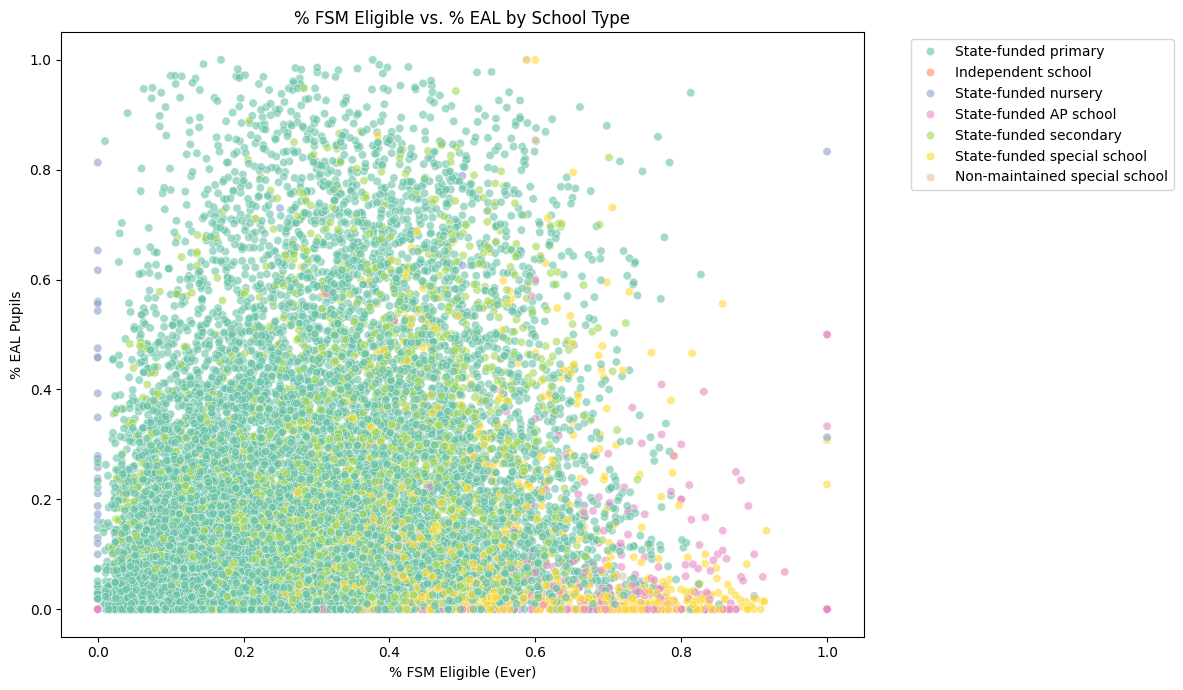

In [ ]:
# --- FSM Eligibility vs. EAL by School Type ---
# This section generates a scatter plot to visualize the relationship between the
# percentage of pupils eligible for free school meals ('PNUMFSMEVER') and the
# percentage of pupils with English as an Additional Language ('PNUMEAL'),
# colored by school type ('SCHOOLTYPE') in the 'census_df' DataFrame. This helps
# to explore potential correlations between socio-economic disadvantage,
# linguistic diversity, and school type.

plt.figure(figsize=(12, 7))
# Creates a new figure with specified dimensions.

sns.scatterplot(
    data=census_df,
    x='PNUMFSMEVER',
    y='PNUMEAL',
    hue='SCHOOLTYPE',
    alpha=0.6,
    palette='Set2'
)
# Creates the scatter plot using Seaborn's 'scatterplot'.
# 'x='PNUMFSMEVER'': Sets the percentage of FSM eligible pupils on the x-axis.
# 'y='PNUMEAL'': Sets the percentage of EAL pupils on the y-axis.
# 'hue='SCHOOLTYPE'': Colors the points based on school type.
# 'alpha=0.6': Sets the transparency of the points.
# 'palette='Set2'': Applies the 'Set2' color palette.

plt.title("% FSM Eligible vs. % EAL by School Type")
# Sets the title.

plt.xlabel("% FSM Eligible (Ever)")
# Labels the x-axis.

plt.ylabel("% EAL Pupils")
# Labels the y-axis.

plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
# Places the legend outside the plot area.

plt.tight_layout()
# Adjusts the layout to prevent overlapping elements.

plt.show()
# Displays the plot.

The scatter plot displays the relationship between the percentage of pupils eligible for free school meals (FSM) and the percentage of pupils with English as an Additional Language (EAL), with each point representing a school and colored by its type. A general trend suggests that schools with a higher proportion of FSM-eligible pupils also tend to have a higher proportion of EAL pupils, although this relationship varies across different school types. State-funded primary schools, the most numerous, exhibit a wide range of both FSM and EAL percentages.

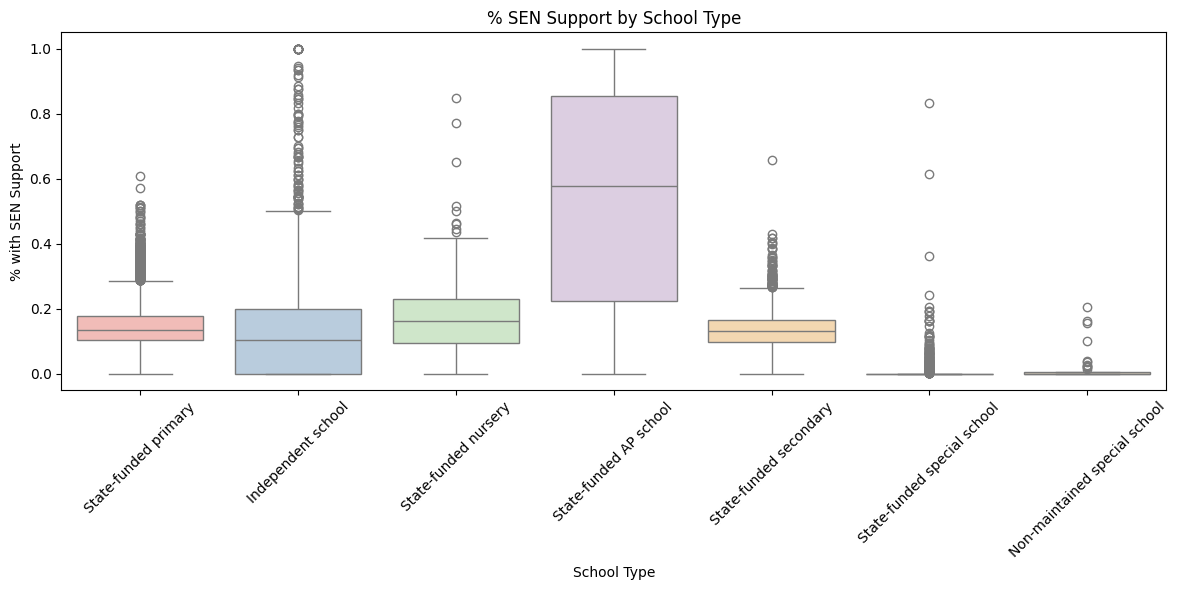

In [ ]:
# --- % SEN Support by School Type ---
# This section generates box plots comparing the distribution of the percentage
# of pupils with SEN (Special Educational Needs) support ('PSENELK') across
# different school types ('SCHOOLTYPE') in the 'census_df' DataFrame.

plt.figure(figsize=(12, 6))
# Sets the figure size.

sns.boxplot(data=census_df, x='SCHOOLTYPE', y='PSENELK', palette='Pastel1')
# Creates the box plots, showing the distribution of '% with SEN Support' for each 'School Type'.

plt.xticks(rotation=45)
# Rotates x-axis labels for readability.

plt.title("% SEN Support by School Type")
# Sets the plot title.

plt.xlabel("School Type")
# Labels the x-axis.

plt.ylabel("% with SEN Support")
# Labels the y-axis.

plt.tight_layout()
# Adjusts layout to prevent label overlap.

plt.show()
# Displays the plot.

The box plots illustrate the distribution of the percentage of students with SEN (Special Educational Needs) support across different school types. State-funded AP (Alternative Provision) schools exhibit the highest median percentage of SEN support, with a wide range. State-funded special schools also show a high median but with less variability. Mainstream school types (primary, secondary, independent) generally have lower median percentages of SEN support, with independent schools showing the lowest.

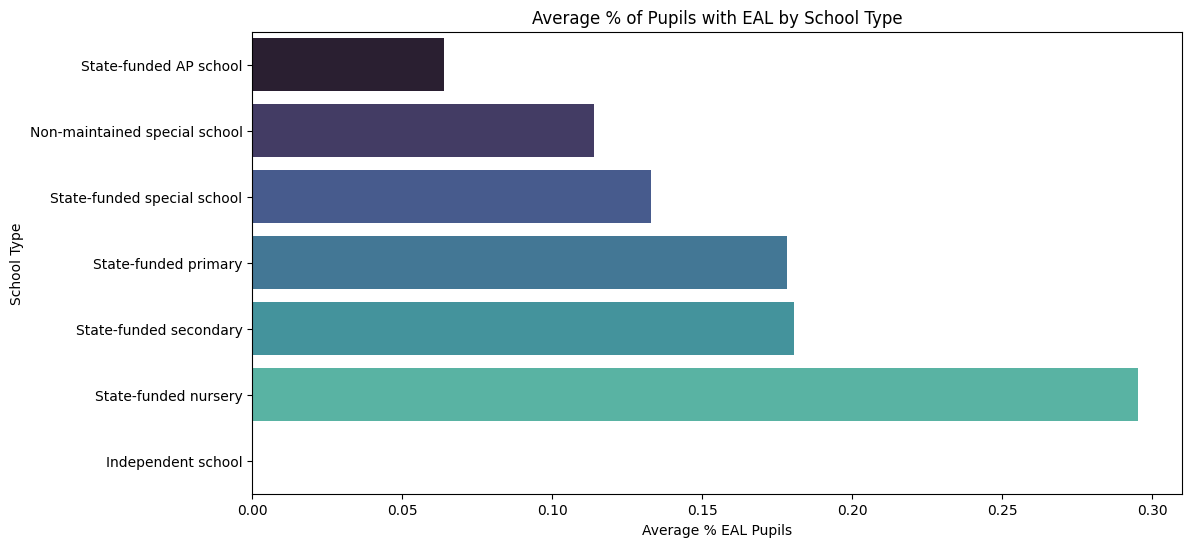

In [ ]:
# --- Average % of Pupils with EAL by School Type ---
# This section calculates the average percentage of pupils with English as an
# Additional Language ('PNUMEAL') for each school type ('SCHOOLTYPE') in the
# 'census_df' DataFrame and then visualizes these averages using a bar plot.

avg_eal = census_df.groupby('SCHOOLTYPE')['PNUMEAL'].mean().sort_values()
# Groups the DataFrame by 'SCHOOLTYPE', calculates the mean of 'PNUMEAL' for each group,
# and then sorts the resulting series by the average EAL percentage.

plt.figure(figsize=(12, 6))
# Creates a new figure with specified dimensions.

sns.barplot(x=avg_eal.values, y=avg_eal.index, palette='mako')
# Creates the bar plot using Seaborn's 'barplot'.
# 'x=avg_eal.values': Sets the average EAL percentages as the bar lengths on the x-axis.
# 'y=avg_eal.index': Sets the school types on the y-axis.
# 'palette='mako'': Applies the 'mako' color palette to the bars.

plt.title("Average % of Pupils with EAL by School Type")
# Sets the title of the plot.

plt.xlabel("Average % EAL Pupils")
# Labels the x-axis.

plt.ylabel("School Type")
# Labels the y-axis.

plt.show()
# Displays the generated bar plot.

The horizontal bar chart displays the average percentage of pupils with English as an Additional Language (EAL) for different school types. State-funded nursery schools show the highest average percentage of EAL pupils, followed by state-funded secondary and primary schools. Non-maintained special schools and state-funded special schools have intermediate average EAL percentages, while independent schools and state-funded AP (Alternative Provision) schools exhibit the lowest averages.

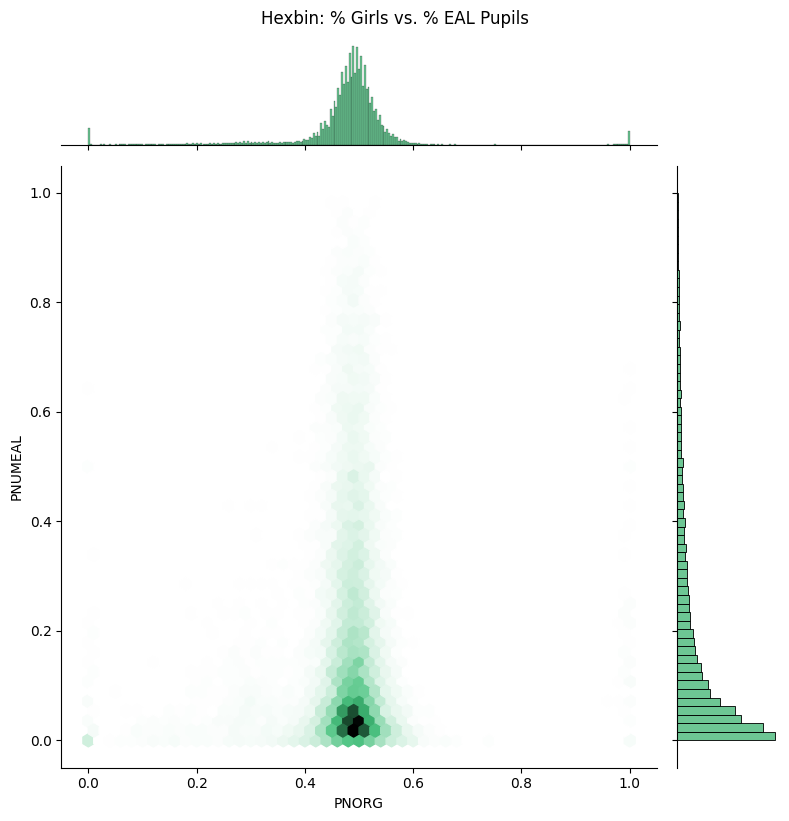

In [ ]:
# --- Hexbin Plot: % Girls vs. % EAL Pupils ---
# This section generates a hexbin plot to visualize the joint distribution of the
# percentage of girls ('PNORG') and the percentage of pupils with English as an
# Additional Language ('PNUMEAL') in the 'census_df' DataFrame. Hexbin plots are
# useful for visualizing the density of points in a scatter plot, especially
# when dealing with a large number of data points that might overlap.

sns.jointplot(
    data=census_df,
    x='PNORG',
    y='PNUMEAL',
    kind='hex',
    color='mediumseagreen',
    height=8
)
# Creates the hexbin plot using Seaborn's 'jointplot' function.
# 'x='PNORG'': Sets the percentage of girls on the x-axis.
# 'y='PNUMEAL'': Sets the percentage of EAL pupils on the y-axis.
# 'kind='hex'': Specifies that a hexbin plot should be created. The data points are
#               aggregated into hexagonal bins, and the color intensity of each bin
#               represents the density of points within that bin.
# 'color='mediumseagreen'': Sets the color of the hexagonal bins.
# 'height=8': Sets the size (height) of the plot.

plt.suptitle("Hexbin: % Girls vs. % EAL Pupils", y=1.02)
# Adds a title to the entire figure, positioned slightly above the plot area.

plt.show()
# Displays the generated hexbin plot.

The hexbin plot visualizes the density of schools based on their percentage of girls ('PNORG') and percentage of pupils with English as an Additional Language ('PNUMEAL'). The darkest hexagonal bins indicate the highest concentration of schools. A dense cluster is observed around 50% girls and a low percentage of EAL pupils. There's a less dense spread extending towards higher EAL percentages, particularly around the 50% girls mark, suggesting some co-educational schools have a significant proportion of EAL students. Marginal histograms along the axes show the individual distributions of each variable.

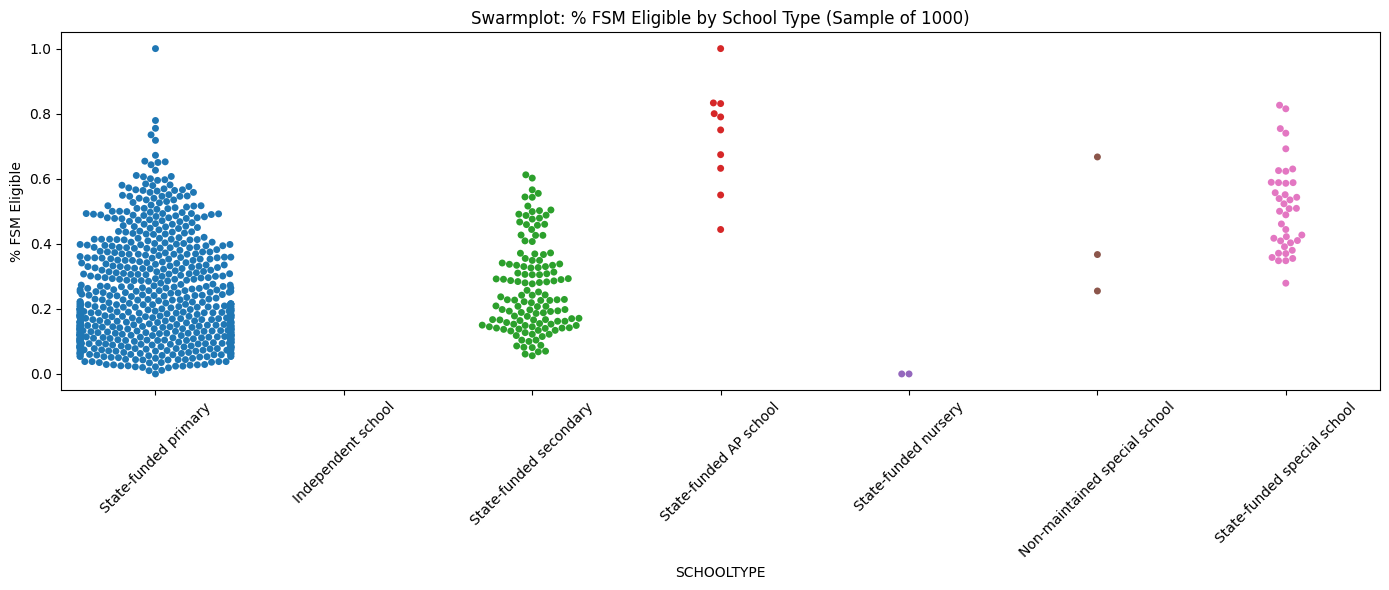

In [ ]:
# --- Swarmplot: % FSM Eligible by School Type (Sample) ---
# This section generates a swarm plot to visualize the distribution of the
# percentage of pupils eligible for free school meals ('PNUMFSMEVER') across
# different school types ('SCHOOLTYPE') in a randomly sampled subset (1000 schools)
# of the 'census_df' DataFrame. Swarm plots are useful for showing the distribution
# of data points and can help to avoid overplotting compared to simple scatter plots.

sampled_df = census_df.sample(1000, random_state=42)  # Reduce crowding
# Creates a random sample of 1000 rows from the 'census_df' to reduce the density
# of points in the swarm plot, making it more interpretable. 'random_state' ensures
# reproducibility of the sample.

plt.figure(figsize=(14, 6))
# Creates a new figure with specified dimensions for better visualization of multiple school types.

sns.swarmplot(data=sampled_df, x='SCHOOLTYPE', y='PNUMFSMEVER', hue='SCHOOLTYPE', palette='tab10', dodge=False)
# Creates the swarm plot using Seaborn's 'swarmplot' function.
# 'data=sampled_df': Specifies the sampled DataFrame.
# 'x='SCHOOLTYPE'': Sets the school type categories on the x-axis.
# 'y='PNUMFSMEVER'': Sets the percentage of FSM eligible pupils on the y-axis.
# 'hue='SCHOOLTYPE'': Colors the points based on school type.
# 'palette='tab10'': Applies the 'tab10' color palette.
# 'dodge=False': Prevents points belonging to the same 'hue' category within the same
#                'x' category from being shifted to avoid overlap (not necessary here
#                as 'hue' is the same as 'x').

plt.xticks(rotation=45)
# Rotates the x-axis labels (school types) by 45 degrees for better readability.

plt.title("Swarmplot: % FSM Eligible by School Type (Sample of 1000)")
# Sets the title of the plot, indicating that it's based on a sample.

plt.ylabel("% FSM Eligible")
# Labels the y-axis.

plt.legend([],[], frameon=False)  # Hide legend since color = schooltype (already shown)
# Hides the legend because the color of the points already corresponds to the school type,
# which is also labeled on the x-axis. 'frameon=False' removes the legend border.

plt.tight_layout()
# Adjusts the plot layout to prevent labels from overlapping.

plt.show()
# Displays the generated swarm plot.

The swarm plot displays the distribution of the percentage of pupils eligible for free school meals (FSM) for a sample of schools, separated by school type. The plot reveals the density and spread of FSM eligibility within each school category. State-funded primary and secondary schools show a wide range of FSM eligibility, with clusters at lower percentages. State-funded AP schools exhibit generally higher FSM eligibility. Independent and state-funded nursery schools tend to have lower FSM eligibility.

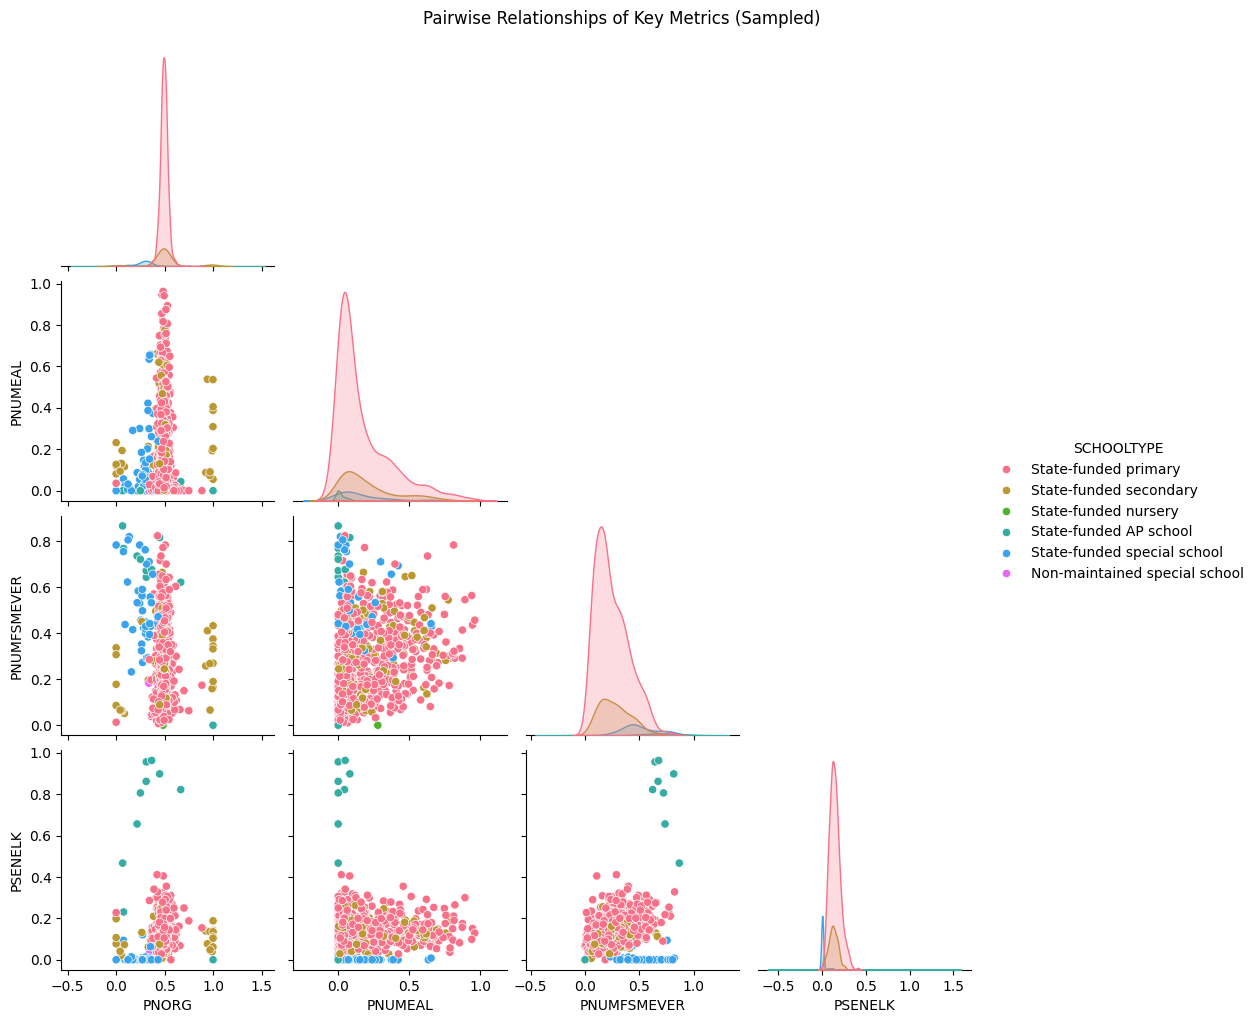

In [ ]:
# --- Pairwise Relationships of Key Metrics (Sampled) ---
# This section generates a pair plot to visualize the pairwise relationships
# between selected percentage-based columns ('PNORG', '% Girls', 'PNUMEAL',
# '% EAL Pupils', 'PNUMFSMEVER', '% FSM Eligible', 'PSENELK', '% SEN Support')
# in a randomly sampled subset (1000 schools) of the 'census_df' DataFrame,
# with different school types ('SCHOOLTYPE') distinguished by color. Pair plots
# are useful for quickly exploring potential correlations and distributions
# of multiple variables.

selected_cols = ['PNORG', 'PNUMEAL', 'PNUMFSMEVER', 'PSENELK']
# Defines a list of the percentage-based columns to be included in the pair plot.

sns.pairplot(
    census_df[selected_cols + ['SCHOOLTYPE']].dropna().sample(1000, random_state=42),
    hue='SCHOOLTYPE',
    palette='husl',
    corner=True
)
# Creates the pair plot using Seaborn's 'pairplot' function.
# 'data=census_df[selected_cols + ['SCHOOLTYPE']].dropna().sample(1000, random_state=42)':
#   - Selects the specified columns along with 'SCHOOLTYPE' from the DataFrame.
#   - '.dropna()' removes any rows with missing values in these selected columns.
#   - '.sample(1000, random_state=42)' takes a random sample of 1000 rows for better
#     visualization and reduced computation time. 'random_state' ensures reproducibility.
# 'hue='SCHOOLTYPE'': Colors the points in the scatter plots and the distributions
#                   in the diagonal plots based on the school type.
# 'palette='husl'': Applies the 'husl' color palette for better visual distinction
#                  between school types.
# 'corner=True': Only displays the lower triangle of the pair plot, reducing redundancy.

plt.suptitle("Pairwise Relationships of Key Metrics (Sampled)", y=1.02)
# Adds a title to the entire figure, positioned slightly above the plot area.

plt.show()
# Displays the generated pair plot.

This pair plot examines the relationships between % Girls (PNORG), % EAL Pupils (PNUMEAL), % FSM Eligible (PNUMFSMEVER), and % SEN Support (PSENELK), with school type as the differentiating factor in color.

* **Diagonal:** Displays the univariate distribution of each metric for each school type. Notice the varying shapes and central tendencies, indicating different demographic profiles across school types. For instance, the distribution of % Girls appears bimodal, likely reflecting single-sex and co-educational schools.

* **Bottom Row (PSENELK vs. Others):** This row specifically analyzes the relationship between the percentage of students with SEN Support and the other three metrics.
    * **PSENELK vs. PNORG (% Girls):** The scatter plot shows a relatively weak correlation, suggesting that the proportion of girls in a school doesn't strongly predict the percentage of students needing SEN support. However, certain school types might exhibit slight clustering.
    * **PSENELK vs. PNUMEAL (% EAL Pupils):** There's a scattered distribution, indicating no strong linear relationship between the overall percentage of EAL students and the percentage of students with SEN support across all school types. However, specific school types might show tendencies; for example, some might have both higher EAL and SEN support percentages.
    * **PSENELK vs. PNUMFSMEVER (% FSM Eligible):** This plot hints at a potential positive association, suggesting that schools with a higher percentage of students eligible for free school meals might also tend to have a higher percentage of students requiring SEN support. This could reflect the complex interplay of socio-economic factors and educational needs. Different school types appear to occupy distinct regions, further emphasizing the influence of school type on these relationships.

Overall, the pair plot provides a valuable initial exploration of potential multivariate relationships within the school census data, highlighting the complex interplay of gender balance, linguistic diversity, socio-economic background, and special educational needs across various school types.

# **6. Data Wrangling - Merging Datasets**
To facilitate a comprehensive analysis of student destinations in relation to school characteristics, a crucial step involved the creation of a unified dataset. This was achieved through a two-stage process: collating individual qualification-level data and subsequently merging it with the detailed school-level information from the School Census.

Initially, the destination data was provided in three separate DataFrames, each representing a distinct qualification level: Level 3 (L3_df), Level 2 (L2_df), and Level 1/Other (LALLOTH_df). To streamline analysis across all qualification levels, a new 'QUALIFICATION' column was engineered within each DataFrame. This column was populated with the corresponding qualification level identifier ("3" for Level 3, "2" for Level 2, and "1" for Level 1/Other), providing a clear distinction between the different student cohorts within the consolidated dataset.

To ensure consistency and ease of use, the column names within each qualification-specific DataFrame were standardized. This involved removing the qualification-level prefix ('L3_', 'L2_', 'LALLOTH_') from the beginning of each column name, resulting in a uniform set of descriptive column headers across all three DataFrames. Following this standardization, the three DataFrames were vertically concatenated using the `pd.concat()` function, creating a single, comprehensive DataFrame named `destinations_df` containing destination data for all qualification levels.

The second stage of data wrangling focused on integrating this consolidated destination data with the rich contextual information available in the `census_df`. A key requirement for this merge was ensuring that the unique school identifier, the 'URN' (Unique Reference Number), had a consistent data type and format across both DataFrames. The 'URN' column in the `destinations_df` was first converted to an integer type and then back to a string, with any leading or trailing whitespace removed to ensure accurate matching. Similarly, the 'URN' column in the `census_df` was explicitly cast to a string type.

Finally, the `destinations_df` and `census_df` were merged using the `pd.merge()` function with a **left join** on the 'URN' column. **A left join was chosen to ensure that all records from the `destinations_df` (representing student destination outcomes) were preserved in the `merged_df`.** This is critical because the primary focus of the analysis is understanding destination patterns. By performing a left join, we guarantee that every student record in our destination data is included in the final merged dataset. Where a corresponding URN exists in the `census_df`, the school-level characteristics are added as new columns. However, if a school in the destination data has no matching URN in the census data, the destination record is still retained, with the census-related columns populated with missing values. This approach prioritizes the preservation of destination information while allowing us to incorporate school context where available. The resulting merged DataFrame, named `merged_df`, became the central dataset for subsequent analysis, combining detailed student destination information with a wealth of school-level contextual variables. The shape of the `merged_df` was then inspected to confirm the number of rows and the expanded set of columns resulting from the merge.







In [ ]:
# --- Add Qualification Level Identifier ---
# These lines create a new column named 'QUALIFICATION' in each of the
# DataFrames: 'L3_df', 'L2_df', and 'LALLOTH_df'. This new column is populated
# with a string representing the qualification level ('3' for Level 3, '2' for
# Level 2, and '1' for Level 1/Other). This will be useful for distinguishing
# between different qualification levels when the DataFrames are combined.

L3_df['QUALIFICATION'] = "3"
L2_df['QUALIFICATION'] = "2"
LALLOTH_df['QUALIFICATION'] = "1"

In [ ]:
# --- Standardize Column Names ---
# These lines rename the columns in each qualification-level DataFrame ('L3_df',
# 'L2_df', 'LALLOTH_df') by removing the qualification-specific prefix ('L3_',
# 'L2_', 'LALLOTH_') from the beginning of each column name. This ensures
# consistent column names across all DataFrames before they are combined. The
# `lambda x: x.replace(prefix, '', 1)` function is applied to each column name,
# replacing only the first occurrence of the prefix.

L3_df = L3_df.rename(columns=lambda x: x.replace('L3_', '', 1))
L2_df = L2_df.rename(columns=lambda x: x.replace('L2_', '', 1))
LALLOTH_df = LALLOTH_df.rename(columns=lambda x: x.replace('LALLOTH_', '', 1))

In [ ]:
# --- Combine Qualification DataFrames ---
# This line uses the Pandas `concat()` function to vertically stack the three
# DataFrames ('L3_df', 'L2_df', 'LALLOTH_df') into a single DataFrame named
# 'destinations_df'. The `axis=0` argument specifies that the concatenation
# should occur along the rows (i.e., adding the rows of each DataFrame to the
# end of the previous one). This creates a unified DataFrame containing
# destination data for all qualification levels.

destinations_df = pd.concat([L3_df, L2_df, LALLOTH_df], axis=0)

In [ ]:
# --- Display First Few Rows of Combined Destinations Data ---
# This line uses the `.head()` method on the `destinations_df` DataFrame.
# It displays the first 5 rows (by default) of the combined DataFrame,
# along with the column headers. This allows for a quick inspection of the
# structure and the initial data entries of the unified destination dataset
# after the concatenation of the individual qualification-level DataFrames.

destinations_df.head()

RECTYPE    LEA   ESTAB       URN                 SCHNAME NFTYPE  FEEDER  \
0       1  202.0  4000.0  137181.0         The UCL Academy     AC     0.0   
1       1  202.0  4104.0  100049.0       Haverstock School     CY     0.0   
2       1  202.0  4166.0  100050.0  Parliament Hill School     CY     1.0   
3       1  202.0  4196.0  100051.0      Regent High School     CY     0.0   
4       1  202.0  4275.0  100052.0        Hampstead School     CY     0.0   

   ICLOSE  COHORT  OVERALL  ...  APPRENPER_NONDIS  EDUCATIONPER_NONDIS  \
0     0.0   136.0    125.0  ...               NaN                  NaN   
1     0.0    77.0     61.0  ...               0.0                  NaN   
2     0.0   135.0    115.0  ...               NaN                  NaN   
3     0.0    75.0     62.0  ...               NaN                 0.57   
4     0.0   106.0     87.0  ...               NaN                  NaN   

   FEPER_NONDIS  HEPER_NONDIS  OTHER_EDUPER_NONDIS  EMPLOYMENTPER_NONDIS  \
0           NaN           NaN                  NaN                   NaN   
1          0.00           NaN                  0.0                   NaN   
2           NaN           NaN                  NaN                   NaN   
3          0.09          0.48                  0.0                   NaN   
4           NaN           NaN                  NaN                   NaN   

   NOT_SUSTAINEDPER_NONDIS  NOT_CAPTUREDPER_NONDIS  LOWER_OUTCOME_PCT  \
0                      NaN                     NaN           0.080882   
1                      NaN                     NaN           0.207792   
2                      NaN                     NaN           0.148148   
3                     0.17                    0.09           0.173333   
4                      NaN                     NaN           0.179245   

   QUALIFICATION  
0              3  
1              3  
2              3  
3              3  
4              3  

[5 rows x 67 columns]

In [ ]:
# --- Get Shape of Combined Destinations Data ---
# This line uses the `.shape` attribute of the `destinations_df` DataFrame.
# It returns a tuple representing the dimensions of the DataFrame: (number of rows, number of columns).
# This is useful for quickly checking the size of the combined destination dataset.

destinations_df.shape

(2947, 67)

In [ ]:
# --- Ensure Consistent URN Data Type and Format ---
# These lines standardize the data type and format of the 'URN' (Unique Reference Number)
# column in both the 'destinations_df' and 'census_df' DataFrames to facilitate accurate merging.

destinations_df['URN'] = destinations_df['URN'].astype(int).astype(str).str.strip()
# Converts the 'URN' column in 'destinations_df' to integer type first, then to string type,
# and finally removes any leading or trailing whitespace using `.str.strip()`. This handles
# potential variations in URN formatting.

census_df['URN'] = census_df['URN'].astype(str)
# Explicitly casts the 'URN' column in 'census_df' to string type to ensure compatibility
# with the 'URN' column in 'destinations_df' during the merge operation.

In [ ]:
# --- Merge Destination and Census Data ---
# This line merges the 'destinations_df' with the 'census_df' based on the common
# 'URN' (Unique Reference Number) column. A left merge ('how='left'') is performed,
# ensuring that all rows from 'destinations_df' are included in the 'merged_df'.
# If a matching 'URN' exists in 'census_df', the corresponding census data is added;
# otherwise, the census-related columns will have missing values (NaN).

merged_df = pd.merge(destinations_df, census_df, on='URN', how='left')

# --- Get Shape of Merged DataFrame ---
# This line uses the `.shape` attribute of the 'merged_df' DataFrame to return
# a tuple representing its dimensions (number of rows, number of columns). This
# allows for verification of the merge outcome, showing the total number of
# destination records and the combined number of columns from both DataFrames.

merged_df.shape

(2947, 89)

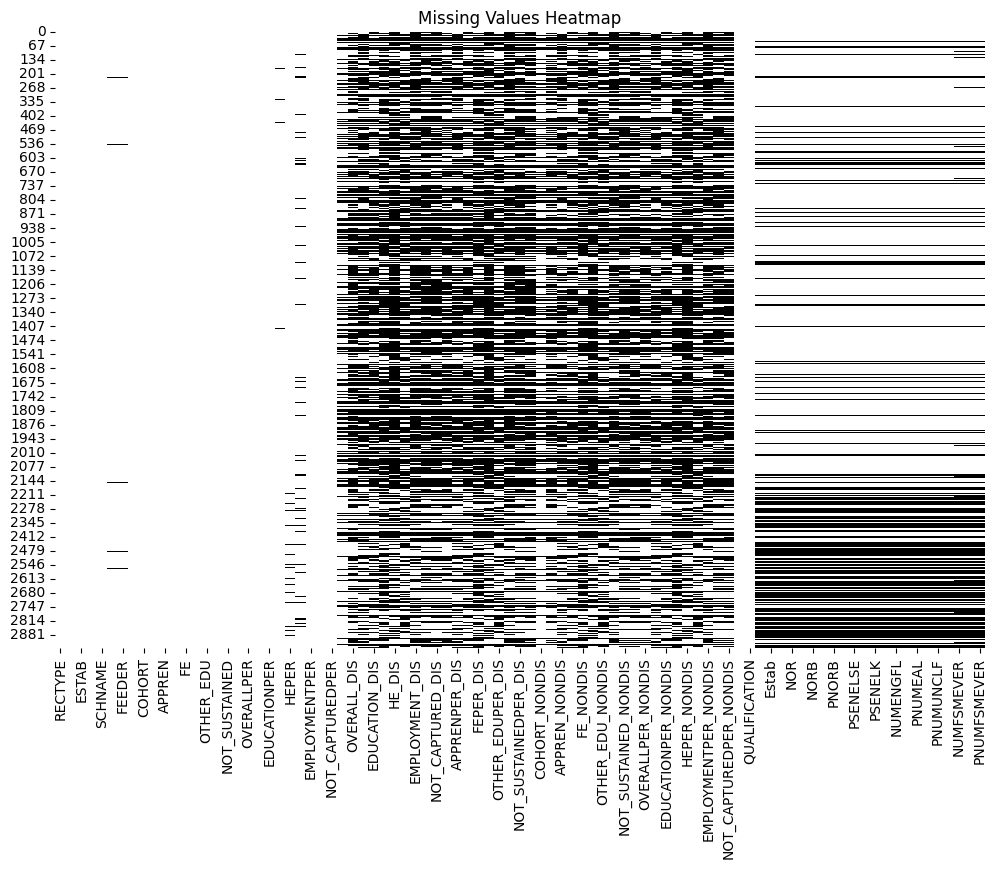

In [ ]:
# --- Visualize Missing Values in Merged Data ---
# This section generates a heatmap to visualize the pattern of missing values
# in the 'merged_df' DataFrame. Each row represents a record, and each column
# represents a variable. White lines indicate the presence of missing values (NaN),
# while dark areas indicate non-missing values. This visualization helps to
# quickly identify which columns have the most missing data and if there are
# any patterns in the missingness.

plt.figure(figsize=(12, 8))  # Adjust figure size as needed
# Creates a new figure with a specified width and height for better visualization
# of potentially many columns.

sns.heatmap(merged_df.isnull(), cbar=False, cmap='binary')
# Creates the heatmap using Seaborn's 'heatmap' function.
# 'merged_df.isnull()': Returns a boolean DataFrame of the same shape as 'merged_df',
#                      where True indicates a missing value and False indicates a
#                      non-missing value.
# 'cbar=False': Hides the color bar, as the color only represents missingness (binary).
# 'cmap='binary'': Uses a binary colormap (e.g., black for False, white for True)
#                  to clearly distinguish between missing and non-missing values.

plt.title('Missing Values Heatmap')
# Sets the title of the heatmap.

plt.show()
# Displays the generated heatmap.

# **7. Exploratory Data Analysis - Merged Dataset**
Following the creation of the `merged_df`, a critical phase of Exploratory Data Analysis (EDA) was undertaken with a specific focus on understanding how socio-economic factors, captured within the School Census data, might influence student destinations at each qualification level. The merging of the destination data with the census data provided the necessary foundation to explore these complex relationships.

The EDA process began by examining the distribution of key socio-economic indicators, such as the percentage of pupils eligible for free school meals (PNUMFSMEVER), across the dataset. Histograms and summary statistics were used to understand the prevalence of socio-economic disadvantage within the student population. Subsequently, the distribution of student destinations (e.g., percentage progressing to Further Education, Higher Education, Apprenticeships) at each qualification level was analyzed to establish baseline outcome patterns.

The core of this EDA phase involved investigating the potential correlations between these socio-economic factors and destination outcomes, stratified by qualification level. Scatter plots were generated, plotting destination percentages against PNUMFSMEVER, with different colors or markers potentially used to distinguish between qualification levels. These visualizations aimed to reveal any apparent trends, such as a negative correlation between FSM eligibility and progression to Higher Education, or a positive correlation with entry into Further Education or Apprenticeships.

To further explore the nature and strength of these relationships, regression plots (using `seaborn.regplot`) were employed. These plots overlaid a regression line onto the scatter plots of destination percentages against socio-economic indicators like PNUMFSMEVER, separately for each qualification level. This allowed for a visual assessment of the linear relationship and provided an indication of the magnitude and direction of the effect of socio-economic factors on destination outcomes at different qualification levels. The confidence intervals around the regression line offered insights into the uncertainty of the estimated relationship. By examining these regression lines across qualification levels, we could identify if the impact of socio-economic background on student destinations varied.

To explore more nuanced relationships, additional socio-economic indicators available in the census data, such as the percentage of students with English as an Additional Language (PNUMEAL) or indicators of neighborhood deprivation (if available), were also examined in relation to destination outcomes at each qualification level. Pair plots and correlation matrices were utilized to explore the interrelationships between these multiple socio-economic factors and their combined influence on student pathways.

The insights gleaned from this targeted EDA were crucial for informing subsequent statistical modeling and analysis. By visualizing and summarizing the relationships between socio-economic factors and student destinations at each qualification level, this phase aimed to identify key patterns, potential inequities, and important variables for further investigation into the determinants of post-education outcomes. The findings from this EDA would ultimately contribute to a deeper understanding of how socio-economic background shapes students' educational trajectories and destination choices following different qualification levels.

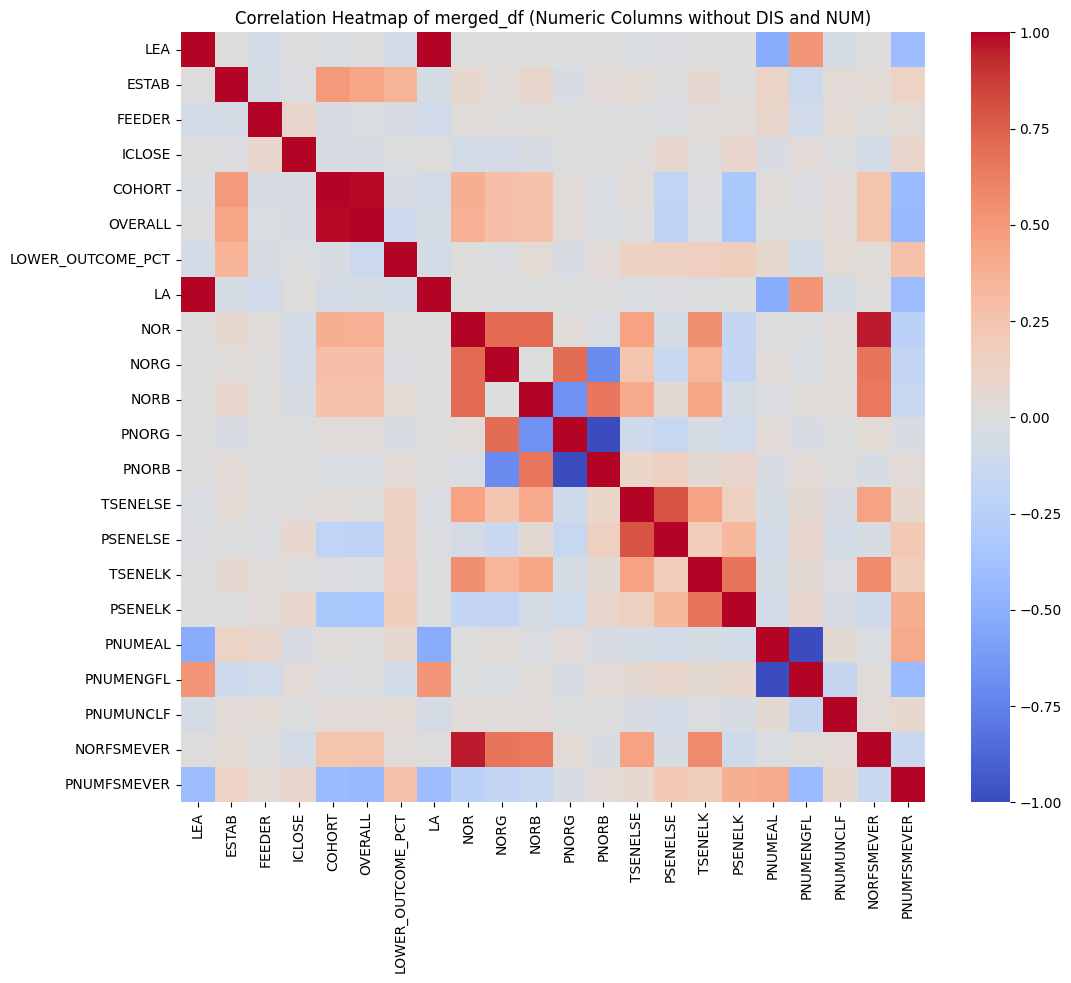

In [ ]:
# --- Select Subset of Columns ---
# This section defines a list named 'selected_columns' containing specific column
# names from the 'merged_df' DataFrame. These columns appear to be chosen for
# further analysis, likely representing key identifiers, outcome measures,
# qualification levels, and school characteristics.

selected_columns = ['RECTYPE', 'LEA', 'ESTAB', 'URN', 'SCHNAME', 'NFTYPE', 'FEEDER',
                    'ICLOSE', 'COHORT', 'OVERALL', 'LOWER_OUTCOME_PCT', 'QUALIFICATION',
                    'LA', 'Estab', 'SCHOOLTYPE', 'NOR', 'NORG', 'NORB', 'PNORG',
                    'PNORB', 'TSENELSE', 'PSENELSE', 'TSENELK', 'PSENELK', 'NUMEAL',
                    'NUMENGFL', 'NUMUNCFL', 'PNUMEAL', 'PNUMENGFL', 'PNUMUNCLF',
                    'NUMFSM', 'NUMFSMEVER', 'NORFSMEVER', 'PNUMFSMEVER']

# --- Display Selected Columns ---
# This line accesses and displays the subset of columns defined in 'selected_columns'
# from the 'merged_df' DataFrame. This allows for a focused view of the data intended
# for subsequent steps, such as correlation analysis.

merged_df[selected_columns]

# --- Correlation Heatmap of Selected Numeric Columns ---
# This section generates a correlation heatmap to visualize the pairwise linear
# relationships between the numeric columns within the previously selected subset
# of the 'merged_df', excluding columns whose names start with 'NUM'. The heatmap
# uses a 'coolwarm' color scheme to represent the strength and direction of
# correlations, with values displayed as two decimal places.

plt.figure(figsize=(12, 10))  # Adjust figure size as needed
# Creates a new figure with specified dimensions for better visualization of the heatmap.

# Select numeric columns from the selected columns, excluding those starting with 'NUM'
numeric_selected_columns = [
    col for col in merged_df[selected_columns].select_dtypes(include=np.number).columns
    if not col.startswith('NUM')
]
# Creates a list 'numeric_selected_columns' by:
# 1. Selecting the data from 'merged_df' within the 'selected_columns'.
# 2. Using `.select_dtypes(include=np.number)` to get only the numeric columns from this selection.
# 3. Filtering out columns whose names start with 'NUM', likely to focus on percentage-based or rate variables rather than raw counts.

sns.heatmap(merged_df[numeric_selected_columns].corr(), cmap='coolwarm', fmt=".2f")
# Generates the heatmap using Seaborn's 'heatmap' function.
# 'merged_df[numeric_selected_columns].corr()': Calculates the pairwise correlation
#                                               matrix for the selected numeric columns.
# 'cmap='coolwarm'': Sets the color map to 'coolwarm', where cooler colors typically
#                    represent negative correlations and warmer colors represent
#                    positive correlations.
# 'fmt=".2f"': Formats the correlation values displayed on the heatmap to two decimal places.

plt.title('Correlation Heatmap of merged_df (Numeric Columns without DIS and NUM)')
# Sets the title of the heatmap to describe its content.

plt.show()
# Displays the generated correlation heatmap.

This heatmap visualizes Spearman's rank correlations between key numeric variables in the merged dataset, excluding raw counts (starting with 'NUM') and potential disadvantage indices (ending with 'DIS') to focus on proportions and direct measures. Red indicates strong positive, blue strong negative, and white near-zero correlation.

**Rationale for Exclusion:** Raw counts can be influenced by school size, and disadvantage indices are often composite, potentially obscuring direct relationships. Percentages offer standardized comparisons.

**Key Observations:**

* **Strong Positive:** NOR (Total number of pupils on roll) with NORG/NORB (Number of girls/boys on roll); TSENELSE (Number of eligible pupils with SEN support) with PSENELSE (Percentage of eligible pupils with an EHC plan)/TSENELK (Number of eligible pupils with SEN support) with PSENELK (Percentage of eligible pupils with SEN support).
* **Strong Negative:** OVERALL with LOWER_OUTCOME_PCT; PNORG with PNORB.
* **Moderate:** Socio-economic indicators (e.g., FSM-related) with outcome measures; PNUMEAL with other demographics.
* **Weak:** Many variable pairs show limited linear association.

The heatmap provides a concise overview of linear relationships between key numeric factors potentially influencing student outcomes.

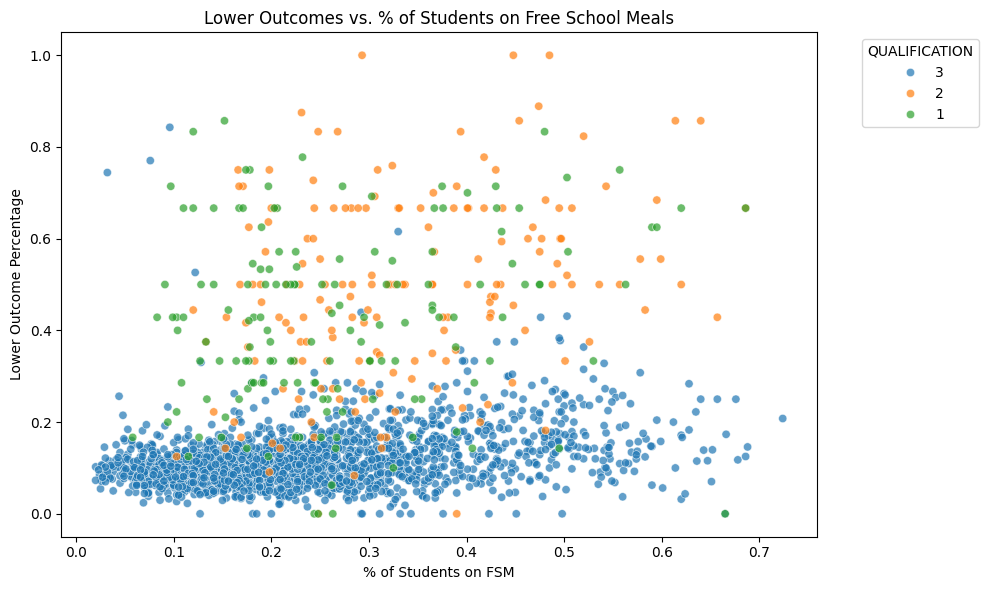

In [ ]:
# --- Lower Outcomes vs. % Free School Meals by Qualification ---
# This section generates a scatter plot to visualize the relationship between
# the percentage of students eligible for free school meals ('PNUMFSMEVER') and
# the lower outcome percentage ('LOWER_OUTCOME_PCT'), with points colored by
# the qualification level ('QUALIFICATION') in the 'merged_df' DataFrame. This
# helps to explore potential associations between socio-economic disadvantage
# and lower educational outcomes at different qualification levels.

plt.figure(figsize=(10, 6))
# Creates a new figure with specified dimensions.

sns.scatterplot(
    data=merged_df,
    x='PNUMFSMEVER',  # Free School Meals %
    y='LOWER_OUTCOME_PCT',
    hue='QUALIFICATION',
    alpha=0.7
)
# Creates the scatter plot using Seaborn's 'scatterplot'.
# 'x='PNUMFSMEVER'': Sets the percentage of students on free school meals on the x-axis.
# 'y='LOWER_OUTCOME_PCT'': Sets the lower outcome percentage on the y-axis.
# 'hue='QUALIFICATION'': Colors the points based on the qualification level.
# 'alpha=0.7': Sets the transparency of the points.

plt.title('Lower Outcomes vs. % of Students on Free School Meals')
# Sets the title of the plot.

plt.xlabel('% of Students on FSM')
# Labels the x-axis.

plt.ylabel('Lower Outcome Percentage')
# Labels the y-axis.

plt.legend(title='QUALIFICATION', bbox_to_anchor=(1.05, 1), loc='upper left')
# Places the legend outside the plot area.

plt.tight_layout()
# Adjusts the layout to prevent overlapping elements.

plt.show()
# Displays the generated scatter plot.

This scatter plot examines the relationship between the percentage of students eligible for free school meals (FSM) and the percentage of lower qualification outcomes, colored by qualification level. A general trend suggests a positive association: schools with a higher percentage of FSM-eligible students tend to have a higher percentage of lower outcomes, particularly for Qualification Level 3. Qualification Levels 1 and 2 show a wider spread and generally higher lower outcome percentages across varying levels of FSM eligibility.

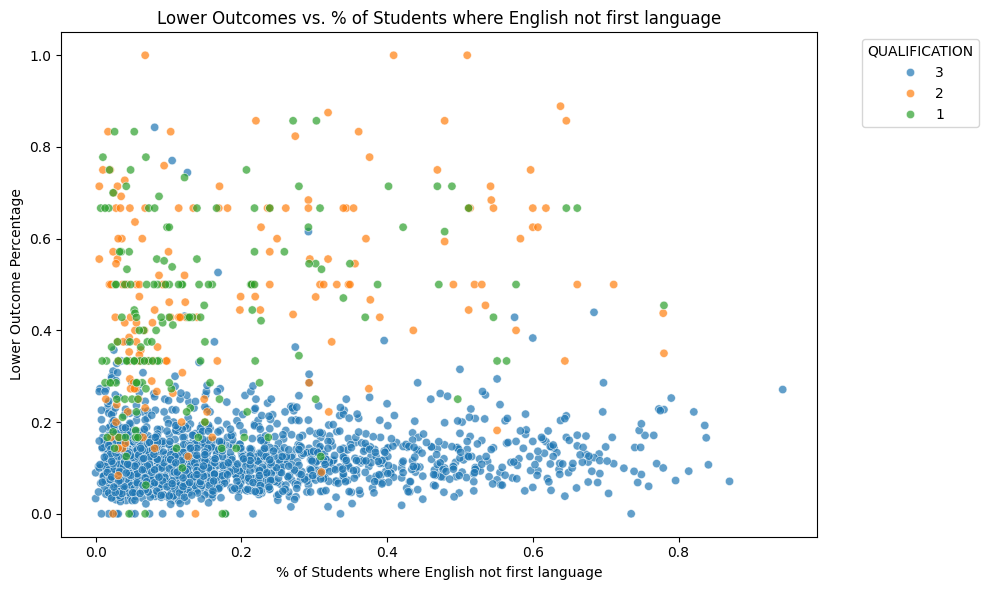

In [ ]:
# --- Lower Outcomes vs. % EAL by Qualification ---
# Scatter plot showing the relationship between the percentage of students
# where English is not first Language ('PNUMEAL') and the percentage of
# lower qualification outcomes ('LOWER_OUTCOME_PCT'), with points colored by
# qualification level ('QUALIFICATION').

plt.figure(figsize=(10, 6))
# Set plot size.

sns.scatterplot(
    data=merged_df,
    x='PNUMEAL',  # Percentage of Students where English is not their first language
    y='LOWER_OUTCOME_PCT',
    hue='QUALIFICATION',
    alpha=0.7
)
# Create scatter plot with % EAL on x-axis, lower outcome % on y-axis,
# colored by qualification level, and with some transparency.

plt.title('Lower Outcomes vs. % of Students where English not first language')
# Set plot title.

plt.xlabel('% of Students where English not first language')
# Label x-axis.

plt.ylabel('Lower Outcome Percentage')
# Label y-axis.

plt.legend(title='QUALIFICATION', bbox_to_anchor=(1.05, 1), loc='upper left')
# Place legend outside the plot.

plt.tight_layout()
# Adjust layout to prevent overlap.

plt.show()
# Show the plot.

This scatter plot illustrates the relationship between the percentage of students whose first language is not English and the percentage of lower qualification outcomes, differentiated by qualification level. For Qualification Level 3, there appears to be a slight positive trend, suggesting that schools with a higher proportion of students with English as an Additional Language (EAL) may also experience a slightly higher percentage of lower outcomes. Qualification Levels 1 and 2 exhibit a more dispersed pattern, with a generally higher percentage of lower outcomes across varying levels of EAL.

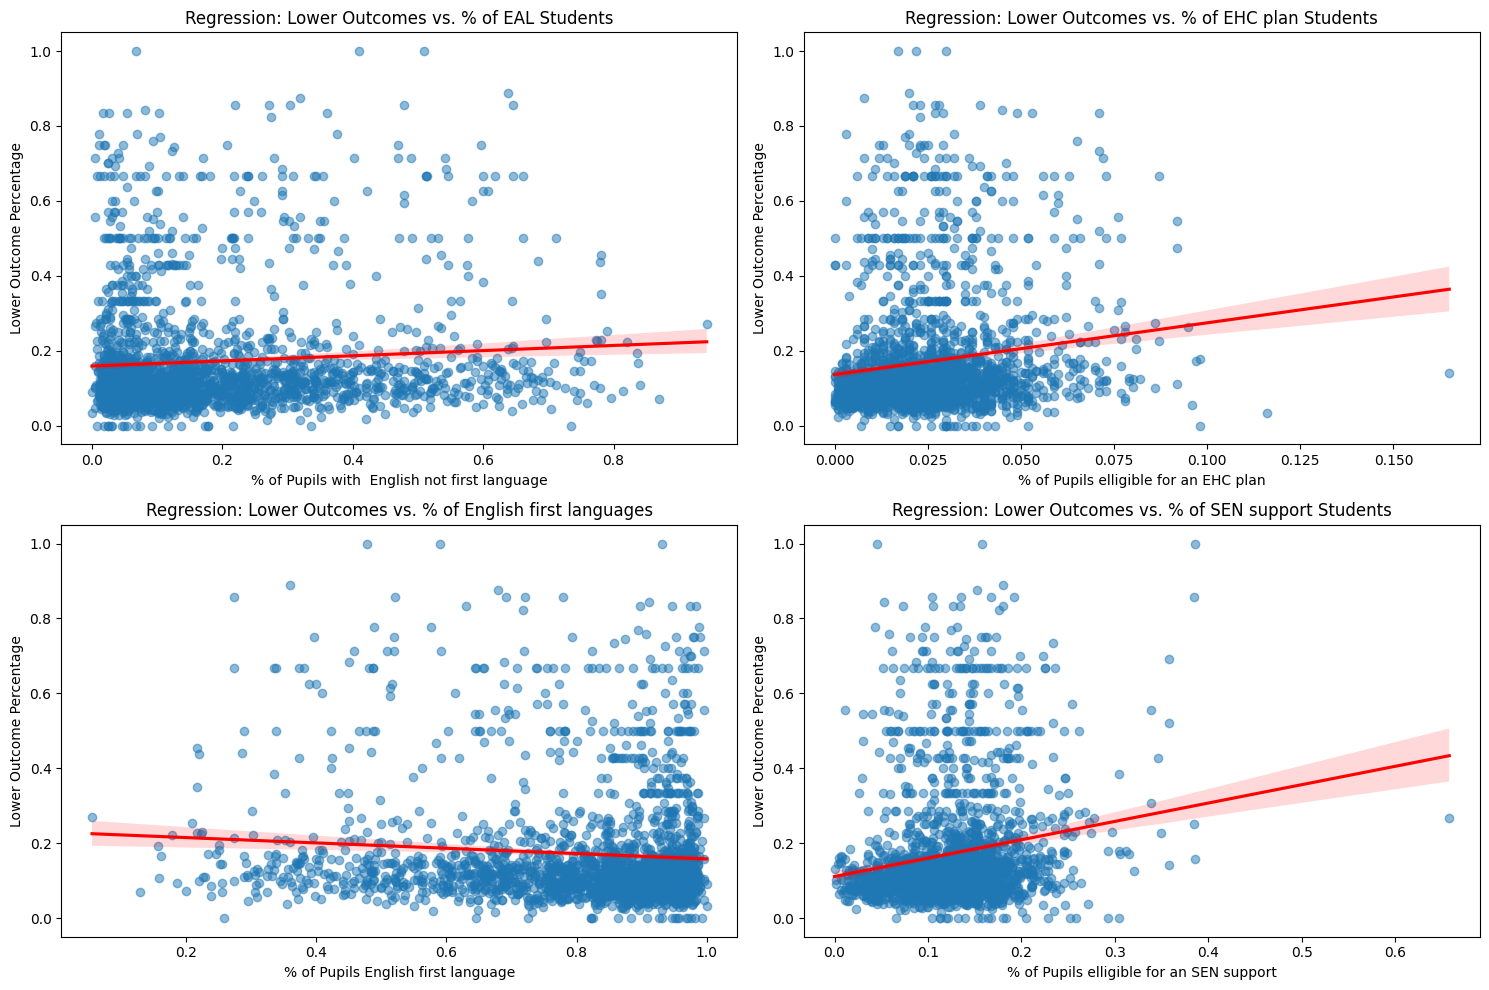

In [ ]:
# --- Regression Plots: Lower Outcomes vs. Key School Characteristics ---
# This section generates four regression plots in a 2x2 grid to visualize the
# linear relationship between the percentage of lower qualification outcomes
# ('LOWER_OUTCOME_PCT') and four key school characteristics:
# - Percentage of pupils with English not as their first language ('PNUMEAL')
# - Percentage of pupils eligible for an Education, Health and Care (EHC) plan ('PSENELSE')
# - Percentage of pupils eligible for SEN support ('PSENELK')
# - Percentage of pupils with English as their first language ('PNUMENGFL')
# Each plot includes a scatter of the data points with some transparency and a
# red regression line with a confidence interval.

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
# Creates a figure and a 2x2 grid of subplots with a specified size. 'axes' is a
# 2D numpy array containing the individual axes objects for each subplot.

sns.regplot(
    data=merged_df,
    x='PNUMEAL',  # English not first language %
    y='LOWER_OUTCOME_PCT',
    scatter_kws={'alpha': 0.5},
    line_kws={'color': 'red'},
    ax=axes[0, 0]  # Specify the axes for the plot (top-left)
)
axes[0,0].set_title('Regression: Lower Outcomes vs. % of EAL Students')
axes[0,0].set_xlabel('% of Pupils with  English not first language')
axes[0,0].set_ylabel('Lower Outcome Percentage')
# Generates a regression plot on the top-left subplot (axes[0, 0]) showing the
# relationship between '% EAL Students' and 'Lower Outcome Percentage'.

sns.regplot(
    data=merged_df,
    x='PSENELSE',  #  Eligible pupils with an EHC plan %
    y='LOWER_OUTCOME_PCT',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'},
    ax=axes[0,1] # Specify the axes for the plot (top-right)
)
axes[0,1].set_title('Regression: Lower Outcomes vs. % of EHC plan Students')
axes[0,1].set_xlabel('% of Pupils elligible for an EHC plan')
axes[0,1].set_ylabel('Lower Outcome Percentage')
# Generates a regression plot on the top-right subplot (axes[0, 1]) showing the
# relationship between '% EHC plan Students' and 'Lower Outcome Percentage'.

sns.regplot(
    data=merged_df,
    x='PSENELK',  #  Eligible pupils with SEN support %
    y='LOWER_OUTCOME_PCT',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'},
    ax=axes[1,1] # Specify the axes for the plot (bottom-right)
)
axes[1,1].set_title('Regression: Lower Outcomes vs. % of SEN support Students')
axes[1,1].set_xlabel('% of Pupils elligible for an SEN support')
axes[1,1].set_ylabel('Lower Outcome Percentage')
# Generates a regression plot on the bottom-right subplot (axes[1, 1]) showing the
# relationship between '% SEN support Students' and 'Lower Outcome Percentage'.

sns.regplot(
    data=merged_df,
    x='PNUMENGFL',  #  English first language %
    y='LOWER_OUTCOME_PCT',
    scatter_kws={'alpha':0.5},
    line_kws={'color': 'red'},
    ax=axes[1,0] # Specify the axes for the plot (bottom-left)
)
axes[1,0].set_title('Regression: Lower Outcomes vs. % of English first languages')
axes[1,0].set_xlabel('% of Pupils English first language')
axes[1,0].set_ylabel('Lower Outcome Percentage')
# Generates a regression plot on the bottom-left subplot (axes[1, 0]) showing the
# relationship between '% English first language' and 'Lower Outcome Percentage'.

plt.tight_layout()
# Adjusts the spacing between subplots to prevent overlapping titles and labels.

plt.show()
# Displays the grid of regression plots.

To further explore the factors potentially influencing lower qualification outcomes, a series of regression plots were generated, examining the relationship between the percentage of lower outcomes and key pupil demographic characteristics, including the percentage of students with English as an Additional Language (EAL), the percentage of students eligible for an Education, Health and Care (EHC) plan, the percentage of students eligible for SEN support, and the percentage of students with English as their first language.

The regression plot examining the relationship between the percentage of EAL students and lower outcomes suggests a slight positive trend, indicating that schools with a higher proportion of EAL students may be associated with a marginally higher percentage of lower qualification outcomes. However, the spread of the data points indicates considerable variability, suggesting this is not a deterministic relationship and other factors are likely at play.

Similarly, the regression plot focusing on the percentage of students with an EHC plan reveals a more pronounced positive association with lower outcomes. Schools with a higher percentage of students with EHC plans tend to exhibit a notably higher percentage of students achieving lower qualifications. This aligns with expectations, as students with more significant special educational needs, who often have EHC plans, may face greater challenges in achieving higher-level qualifications.

The relationship between the percentage of students eligible for SEN support (but without an EHC plan) and lower outcomes also shows a positive trend, although perhaps less steep than that observed for students with EHC plans. This suggests that even students with identified SEN support needs, but at a less intensive level than those with EHC plans, may be more likely to experience lower qualification outcomes.

Conversely, the regression plot exploring the percentage of students with English as their first language and lower outcomes indicates a slight negative trend. Schools with a higher proportion of students whose first language is English tend to have a slightly lower percentage of lower qualification outcomes. This finding could be related to the additional support and resources that may be required for students learning English as an additional language.

Overall, these regression analyses provide visual evidence suggesting that pupil demographic characteristics, particularly those related to special educational needs and linguistic background, have some association with the percentage of lower qualification outcomes at the school level. While these plots illustrate potential linear trends, it is important to acknowledge the complexity of educational outcomes and the likelihood of multiple interacting factors influencing student achievement. Further statistical modeling would be necessary to quantify the strength and significance of these relationships while controlling for other potentially confounding variables.

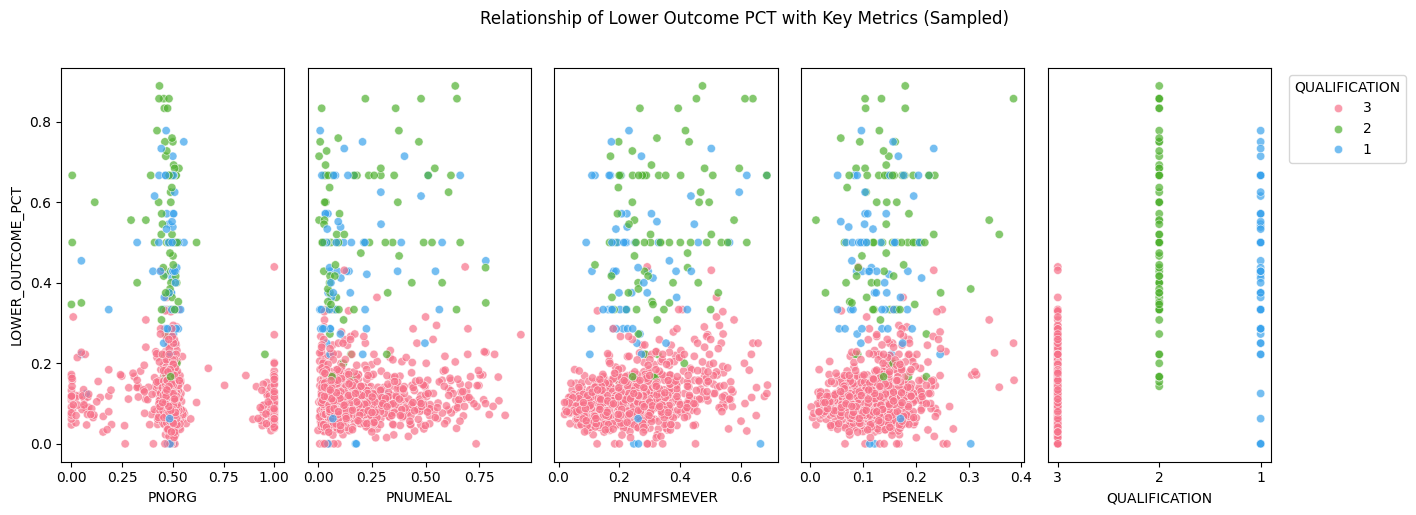

In [ ]:
# Assuming your merged_df DataFrame is already loaded.

selected_cols = ['PNORG', 'PNUMEAL', 'PNUMFSMEVER', 'PSENELK', 'QUALIFICATION']
# List of columns to explore the relationship with 'LOWER_OUTCOME_PCT', plus the hue variable.

df_subset = merged_df[selected_cols + ['LOWER_OUTCOME_PCT']].dropna().sample(1000, random_state=42)
# Creates a subset of the merged DataFrame with the selected columns and 'LOWER_OUTCOME_PCT',
# dropping rows with missing values and sampling 1000 random data points for visualization.

num_vars = len(selected_cols)
# Determines the number of variables (excluding 'LOWER_OUTCOME_PCT') to create subplots for.

fig, axes = plt.subplots(1, num_vars, figsize=(15, 5)) # Adjust figsize as needed
# Creates a figure and a row of subplots. The number of subplots equals the number of
# selected columns. 'figsize' controls the overall size of the figure.

for i, col in enumerate(selected_cols):
    sns.scatterplot(data=df_subset, x=col, y='LOWER_OUTCOME_PCT', hue='QUALIFICATION', palette='husl', alpha=0.7, ax=axes[i])
    # Generates a scatter plot in the i-th subplot.
    # 'x': The current column from 'selected_cols' is plotted on the x-axis.
    # 'y': 'LOWER_OUTCOME_PCT' is plotted on the y-axis.
    # 'hue': Points are colored based on the 'QUALIFICATION' level.
    # 'palette': Uses the 'husl' color palette for distinct colors.
    # 'alpha': Sets the transparency of the points.
    # 'ax': Specifies the subplot to draw on.
    axes[i].set_xlabel(col)
    axes[i].set_ylabel('LOWER_OUTCOME_PCT')
    # Sets the label for the x and y axes of the current subplot.
    if i > 0:
        axes[i].yaxis.set_visible(False) # Hide y-axis labels for subsequent plots
        # Hides the y-axis labels for all subplots except the first one to reduce redundancy.
    if i == num_vars - 1:
        axes[i].legend(title='QUALIFICATION', bbox_to_anchor=(1.05, 1), loc='upper left')
        # Adds a legend to the last subplot, placing it outside the plot area.
    else:
        axes[i].legend().remove() # Remove individual legends to avoid clutter
        # Removes the legend from all subplots except the last one to prevent overlapping legends.

plt.suptitle("Relationship of Lower Outcome PCT with Key Metrics (Sampled)", y=1.02)
# Sets a title for the entire figure, positioned slightly above the subplots.

plt.tight_layout(rect=[0, 0, 0.95, 1]) # Adjust layout to accommodate legend
# Adjusts the spacing between subplots to prevent overlapping elements and make space for the external legend.

plt.show()
# Displays the generated figure with the row of scatter plots.

To further dissect the factors associated with lower qualification outcomes, a series of scatter plots were generated, each examining the relationship between 'LOWER\_OUTCOME\_PCT' and one of the key school characteristics: '% Girls' (PNORG), '% EAL Pupils' (PNUMEAL), '% FSM Eligible' (PNUMFSMEVER), and '% SEN Support' (PSENELK). The data points in each plot are colored by the qualification level ('QUALIFICATION') to discern if these relationships vary across different levels.

The plot of 'LOWER\_OUTCOME\_PCT' against '% Girls' (PNORG) reveals a somewhat scattered distribution with no strong linear trend apparent across all qualification levels. However, there might be subtle differences in the density of points for each qualification level at different percentages of girls, warranting further investigation.

When examining the relationship with '% EAL Pupils' (PNUMEAL), a slight positive tendency appears to emerge, particularly for Qualification Level 3 (pink). Schools with a higher percentage of EAL pupils seem to have a modestly higher percentage of lower outcomes, although considerable variation exists. Qualification Levels 1 and 2 show a broader spread across the EAL percentage.

The relationship between 'LOWER\_OUTCOME\_PCT' and '% FSM Eligible' (PNUMFSMEVER) also suggests a positive association, most notably for Qualification Level 3. Schools with a higher proportion of students eligible for free school meals tend to exhibit a higher percentage of lower qualification outcomes. This aligns with findings from the regression analysis, indicating a potential link between socio-economic disadvantage and lower attainment.

The plot against '% SEN Support' (PSENELK) indicates a clear positive correlation. Schools with a higher percentage of students receiving SEN support consistently demonstrate a higher percentage of lower qualification outcomes across all qualification levels, with Qualification Level 3 again showing a distinct cluster towards lower SEN support percentages and lower outcome percentages.

Finally, the distribution of 'LOWER\_OUTCOME\_PCT' across the different 'QUALIFICATION' levels themselves (the rightmost plot) reinforces the inherent differences in outcome percentages based on the qualification type, with Level 3 generally exhibiting the lowest percentage of lower outcomes and Level 1 the highest.

These individual scatter plots provide a more granular view of the relationships observed in the correlation heatmap and regression analyses, highlighting the complex interplay between school demographics, socio-economic factors, special educational needs, and qualification outcomes. The consistent trends observed, particularly the positive association of lower outcomes with higher percentages of FSM-eligible students and students with SEN support, warrant further quantitative analysis to determine the statistical significance and magnitude of these effects while controlling for other potentially confounding variables.

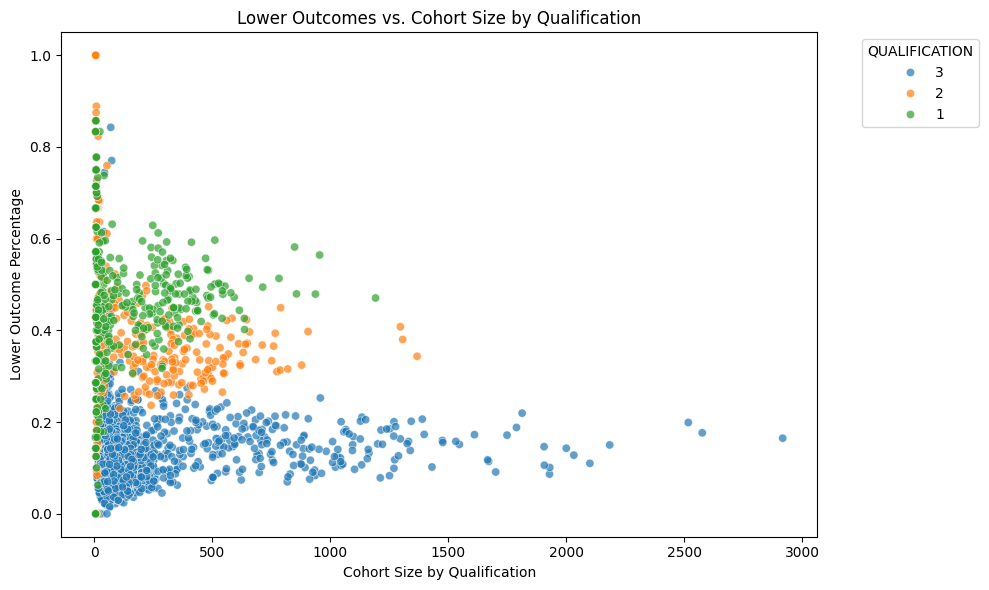

In [ ]:
# --- Lower Outcomes vs. Cohort Size by Qualification ---
# Scatter plot showing the relationship between the count of
# students in the cohort ('COHORT') and the percentage of lower
# qualification outcomes ('LOWER_OUTCOME_PCT'), with points colored by
# qualification level ('QUALIFICATION').

plt.figure(figsize=(10, 6))
# Set plot size.

sns.scatterplot(
    data=merged_df,
    x='COHORT',
    y='LOWER_OUTCOME_PCT',
    hue='QUALIFICATION',
    alpha=0.7
)
# Create scatter plot with count of students on x-axis,
# lower outcome % on y-axis, colored by qualification level, and with transparency.

plt.title('Lower Outcomes vs. Cohort Size by Qualification')
# Set plot title

plt.xlabel('Cohort Size by Qualification')
# Label x-axis

plt.ylabel('Lower Outcome Percentage')
# Label y-axis

plt.legend(title='QUALIFICATION', bbox_to_anchor=(1.05, 1), loc='upper left')
# Place legend outside the plot.

plt.tight_layout()
# Adjust layout to prevent overlap.

plt.show()
# Show the plot.

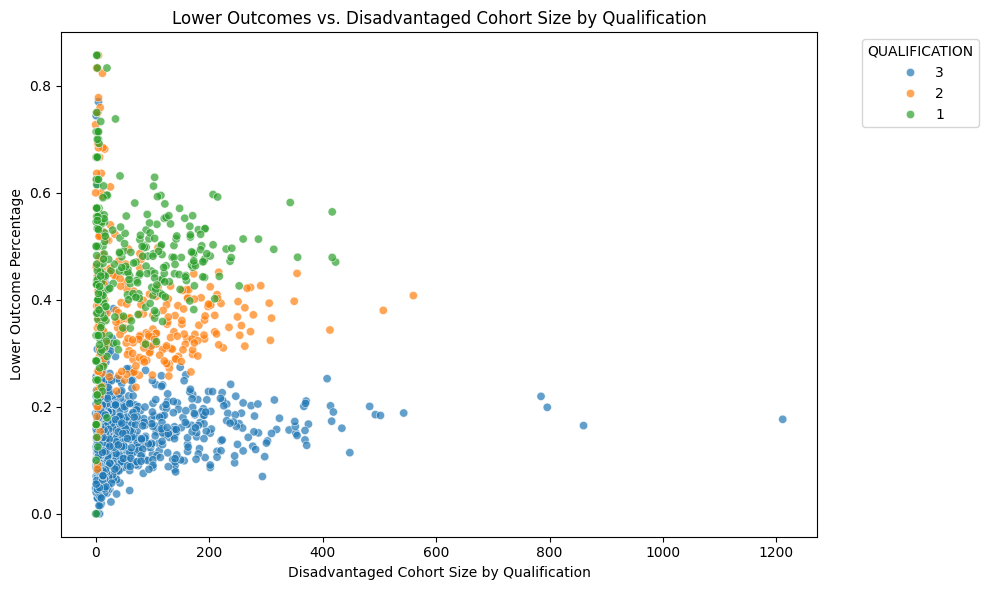

In [ ]:
# --- Lower Outcomes vs. Disadvantaged Cohort Size by Qualification ---
# Scatter plot showing the relationship between the count of disadvantaged
# students in the cohort ('COHORT_DIS') and the percentage of lower
# qualification outcomes ('LOWER_OUTCOME_PCT'), with points colored by
# qualification level ('QUALIFICATION').

plt.figure(figsize=(10, 6))
# Set plot size.

sns.scatterplot(
    data=merged_df,
    x='COHORT_DIS',
    y='LOWER_OUTCOME_PCT',
    hue='QUALIFICATION',
    alpha=0.7
)
# Create scatter plot with count of disadvantaged students on x-axis,
# lower outcome % on y-axis, colored by qualification level, and with transparency.

plt.title('Lower Outcomes vs. Disadvantaged Cohort Size by Qualification')
# Set plot title

plt.xlabel('Disadvantaged Cohort Size by Qualification')
# Label x-axis

plt.ylabel('Lower Outcome Percentage')
# Label y-axis

plt.legend(title='QUALIFICATION', bbox_to_anchor=(1.05, 1), loc='upper left')
# Place legend outside the plot.

plt.tight_layout()
# Adjust layout to prevent overlap.

plt.show()
# Show the plot.

To further understand the interplay between qualification level, disadvantaged student population, and lower outcome percentages, we visualized the relationship between 'Disadvantaged Cohort Size by Qualification' and 'Lower Outcome Percentage', colored by the 'QUALIFICATION' category. This scatter plot reveals several key trends that inform our subsequent modeling efforts.

As visually evident, schools categorized under **QUALIFICATION 1 (represented by green points)** tend to exhibit a wide range of lower outcome percentages, from near zero to over 80%. Notably, a significant cluster of these schools with smaller disadvantaged cohort sizes shows a higher prevalence of lower outcomes. This suggests that for schools focusing on this qualification level, factors beyond just the size of the disadvantaged cohort might be strongly influencing student outcomes.

Schools with **QUALIFICATION 2 (represented by orange points)** generally display a moderate range of lower outcome percentages, predominantly falling between 20% and 60%. There appears to be a slight positive trend, indicating that as the disadvantaged cohort size increases, the lower outcome percentage also tends to rise, although with considerable variability.

The most striking observation pertains to schools offering **QUALIFICATION 3 (represented by blue points)**. These schools consistently exhibit the lowest percentages of lower outcomes, with the vast majority falling below 25%. Furthermore, there is no strong visual correlation between the disadvantaged cohort size and the lower outcome percentage for this qualification level. This suggests that achieving this qualification might be associated with factors that mitigate the impact of a larger disadvantaged student population on lower outcomes.

Furthermore, the varying relationship between disadvantaged cohort size and lower outcomes across qualification levels highlights the complexity of the factors at play. Our model will need to capture these nuanced interactions to accurately predict lower outcome percentages.

##Conclusion of EDA on Merged Dataset

The Exploratory Data Analysis of the merged dataset has provided valuable initial insights into the complex interplay between school characteristics, socio-economic factors, and student qualification outcomes. We observed potential correlations between socio-economic indicators like FSM eligibility and linguistic background with lower outcome percentages. Furthermore, the analysis of disadvantaged cohort size in relation to higher outcomes suggests a nuanced relationship, particularly for the highest qualification level.

These initial visual explorations highlight the multi-faceted nature of educational attainment and suggest that a combination of pupil demographics, school context, and qualification level likely influences student destinations. The patterns identified warrant further rigorous statistical modeling to quantify the strength and significance of these relationships, control for potential confounding variables, and ultimately gain a deeper understanding of the factors driving student success and progression following different qualification pathways. The findings from this EDA will inform the subsequent stages of analysis, guiding the development of predictive models and the identification of key levers for improving student outcomes.

# **8. Feature Engineering**
The feature engineering phase aimed to refine the `merged_df` into a more suitable format for subsequent modeling by selecting relevant features, handling missing values, and creating new informative variables. The initial step involved a targeted selection of columns based on their potential predictive power and data characteristics.

A list comprehension was used to filter the existing columns, retaining those that did not end with '_DIS' (representing counts of disadvantaged students, which we aimed to handle separately), did not end with '_PER' (as percentage features were generally preferred), and did not start with 'NUM' (to focus on aggregated or percentage-based school characteristics rather than raw numbers, which can be influenced by school size).

Further refinement involved explicitly removing several outcome variables ('OVERALL', 'APPREN', 'EDUCATION', 'FE', 'HE', 'OTHER_EDU', 'EMPLOYMENT', 'NOT_SUSTAINED', 'NOT_CAPTURED', 'HIGH_OUTCOME_PCT') and related school-level counts ('NOR', 'NORG', 'NORB', 'TSENELSE', 'TSENELK', 'NORFSMEVER'). These were excluded for several reasons: the outcome variables represent the target variables or closely related measures that could lead to data leakage or are not direct predictors of the overall outcome patterns. The raw counts were removed in line with the earlier decision to prioritize percentage-based features for better comparability across schools of different sizes. The 'COHORT' column was also implicitly removed as it was used later to engineer a percentage-based feature for disadvantaged students.

The resulting `final_merged_df` initially contained a subset of the original features along with the 'COHORT_DIS' column, which represents the count of disadvantaged students in the cohort. To address missing values in 'COHORT_DIS', a binary indicator feature, 'COHORT_DIS_SUPP', was created. This new column flags records where 'COHORT_DIS' was originally missing (represented by 1) and where it was present (represented by 0). This allows the model to potentially learn from the missingness pattern itself, rather than simply imputing or dropping the missing values.

Further data cleaning involved identifying and removing redundant or less informative features. The 'LA' (Local Authority number) and 'Estab' (Establishment number) were dropped as they were duplicate columns. The 'URN' (School Unique Reference Number) and 'SCHNAME' (School Name) were also removed as they are unique identifiers and not suitable for direct inclusion in most statistical models.

To optimize memory usage and potentially improve model performance, the data types of several categorical columns ('RECTYPE', 'LEA', 'ESTAB', 'NFTYPE', 'QUALIFICATION', 'SCHOOLTYPE') were converted to the 'category' data type. Similarly, binary-like features ('FEEDER', 'ICLOSE', 'COHORT_DIS_SUPP') were converted to the 'bool' data type.

Finally, to provide a more normalized measure of disadvantage within the school cohort, a new feature, 'COHORT_DIS_PCT', was engineered by calculating the percentage of disadvantaged students in each school's cohort ('COHORT_DIS' divided by 'COHORT'). This percentage-based feature offers a more standardized way to compare the proportion of disadvantaged students across schools of different sizes and is expected to be a more informative predictor than the raw count. The `final_merged_df` at this stage contained a curated set of features, with missing values in 'COHORT_DIS' handled by an indicator variable and a more informative percentage-based feature for disadvantaged students added, ready for subsequent model training and evaluation.

In [ ]:
# --- Display Column Names ---
# This line uses the `.columns` attribute of the `merged_df` DataFrame.
# It returns an Index object containing the names of all columns in the DataFrame.
# This is useful for inspecting the available features after the merge operation.

merged_df.columns

Index(['RECTYPE', 'LEA', 'ESTAB', 'URN', 'SCHNAME', 'NFTYPE', 'FEEDER',
       'ICLOSE', 'COHORT', 'OVERALL', 'APPREN', 'EDUCATION', 'FE', 'HE',
       'OTHER_EDU', 'EMPLOYMENT', 'NOT_SUSTAINED', 'NOT_CAPTURED',
       'OVERALLPER', 'APPRENPER', 'EDUCATIONPER', 'FEPER', 'HEPER',
       'OTHER_EDUPER', 'EMPLOYMENTPER', 'NOT_SUSTAINEDPER', 'NOT_CAPTUREDPER',
       'COHORT_DIS', 'OVERALL_DIS', 'APPREN_DIS', 'EDUCATION_DIS', 'FE_DIS',
       'HE_DIS', 'OTHER_EDU_DIS', 'EMPLOYMENT_DIS', 'NOT_SUSTAINED_DIS',
       'NOT_CAPTURED_DIS', 'OVERALLPER_DIS', 'APPRENPER_DIS',
       'EDUCATIONPER_DIS', 'FEPER_DIS', 'HEPER_DIS', 'OTHER_EDUPER_DIS',
       'EMPLOYMENTPER_DIS', 'NOT_SUSTAINEDPER_DIS', 'NOT_CAPTUREDPER_DIS',
       'COHORT_NONDIS', 'OVERALL_NONDIS', 'APPREN_NONDIS', 'EDUCATION_NONDIS',
       'FE_NONDIS', 'HE_NONDIS', 'OTHER_EDU_NONDIS', 'EMPLOYMENT_NONDIS',
       'NOT_SUSTAINED_NONDIS', 'NOT_CAPTURED_NONDIS', 'OVERALLPER_NONDIS',
       'APPRENPER_NONDIS', 'EDUCATIONPER_NONDIS', 'FE

In [ ]:
# --- Select Initial Feature Set ---
# This section first creates a list called 'columns' containing all column names
# from the 'merged_df' that do NOT end with 'DIS', do NOT end with 'PER', and
# do NOT start with 'NUM'. This initial selection aims to exclude raw counts,
# percentage-based features (which might be redundant or handled differently),
# and features related to counts of disadvantaged students (intended for separate handling).

columns = [i for i in merged_df.columns if not i.endswith('DIS') and not i.endswith('PER') and not i.startswith('NUM')]

# --- Remove Specific Outcome and Count Variables ---
# This loop iterates through a predefined list of column names representing
# overall outcomes, specific destination categories (APPREN, EDUCATION, FE, HE,
# OTHER_EDU, EMPLOYMENT, NOT_SUSTAINED, NOT_CAPTURED, HIGH_OUTCOME_PCT), and
# school-level enrollment and SEN counts (NOR, NORG, NORB, TSENELSE, TSENELK,
# NORFSMEVER). For each column name in this list, it checks if that name is
# present in the 'columns' list created in the previous step. If the column
# exists in 'columns', it is removed. This further refines the feature set by
# excluding target-related variables and raw enrollment figures.

for col in ['OVERALL', 'APPREN', 'EDUCATION', 'FE', 'HE', 'OTHER_EDU', 'EMPLOYMENT', 'NOT_SUSTAINED', 'NOT_CAPTURED', 'NOR', 'NORG', 'NORB', 'TSENELSE', 'TSENELK', 'NORFSMEVER','HIGH_OUTCOME_PCT']:
    if col in columns:  # Check if the element exists before removing
        columns.remove(col)

# --- Display Selected Feature Names ---
# This line displays the final list of column names that have been selected
# after the initial filtering and the removal of specific variables. This list
# represents the features that will be used for further analysis or modeling.

columns

['RECTYPE',
 'LEA',
 'ESTAB',
 'URN',
 'SCHNAME',
 'NFTYPE',
 'FEEDER',
 'ICLOSE',
 'COHORT',
 'LOWER_OUTCOME_PCT',
 'QUALIFICATION',
 'LA',
 'Estab',
 'SCHOOLTYPE',
 'PNORG',
 'PNORB',
 'PSENELSE',
 'PSENELK',
 'PNUMEAL',
 'PNUMENGFL',
 'PNUMUNCLF',
 'PNUMFSMEVER']

In [ ]:
# --- Create Final DataFrame with Selected Features ---
# Creates a new DataFrame 'final_merged_df' containing the columns selected
# in the 'columns' list, along with the 'COHORT_DIS' column (count of
# disadvantaged students in the cohort).

final_merged_df = merged_df[columns+['COHORT_DIS']]

In [ ]:
# --- Get Shape of Final DataFrame ---
# Returns the dimensions (number of rows, number of columns) of the
# 'final_merged_df'.

final_merged_df.shape

(2947, 23)

In [ ]:
# --- Count Missing Values per Column ---
# Calculates and displays the number of missing values (NaN) in each column
# of the 'final_merged_df'.

final_merged_df.isna().sum()

RECTYPE                0
LEA                    0
ESTAB                  0
URN                    0
SCHNAME                0
NFTYPE                22
FEEDER                22
ICLOSE                 0
COHORT                 0
LOWER_OUTCOME_PCT      0
QUALIFICATION          0
LA                   746
Estab                746
SCHOOLTYPE           746
PNORG                746
PNORB                746
PSENELSE             746
PSENELK              746
PNUMEAL              746
PNUMENGFL            746
PNUMUNCLF            746
PNUMFSMEVER          792
COHORT_DIS           996
dtype: int64

In [ ]:
# --- Create Missing 'COHORT_DIS' Indicator ---
# Creates a new boolean column 'COHORT_DIS_SUPP' in 'final_merged_df'.
# It assigns 1 if the 'COHORT_DIS' value is missing (NaN), and 0 otherwise,
# then converts these boolean values to integers.

final_merged_df['COHORT_DIS_SUPP'] = final_merged_df['COHORT_DIS'].isnull().astype(int)

In [ ]:
# --- Count Duplicate Rows ---
# Calculates and returns the total number of duplicate rows present in the
# 'final_merged_df'.

final_merged_df.duplicated().sum()

np.int64(0)

In [ ]:
# --- Check for Duplicate Column Names ---
# Returns a boolean Series indicating whether each column name in the
# 'final_merged_df' is a duplicate of a previous column name.

final_merged_df.columns.duplicated()

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False])

In [ ]:
# --- Drop Identifier Columns ---
# These lines remove identifier columns from the 'final_merged_df' as they
# are generally unique and not useful for modeling.

final_merged_df = final_merged_df.drop(columns=['LA'], axis=1)    # Drop Local Authority number.
final_merged_df = final_merged_df.drop(columns=['Estab'], axis=1) # Drop Establishment number.
final_merged_df = final_merged_df.drop(columns=['URN'], axis=1)    # Drop School Unique Reference Number.
final_merged_df = final_merged_df.drop(columns=['SCHNAME'], axis=1) # Drop School Name.
final_merged_df = final_merged_df.drop(columns=['ESTAB'], axis=1) # Drop Establishment number (again, likely a repetition).

In [ ]:
# --- Convert Columns to Appropriate Data Types ---
# These lines convert the data types of specified columns in 'final_merged_df'
# to more suitable formats for analysis and potential modeling.

final_merged_df[['RECTYPE','LEA','NFTYPE','QUALIFICATION','SCHOOLTYPE']] = final_merged_df[['RECTYPE','LEA','NFTYPE','QUALIFICATION','SCHOOLTYPE']].astype('category')
# Converts the specified columns, which represent categorical variables, to the
# 'category' data type. This can save memory and may be required by some models.

final_merged_df[['FEEDER','ICLOSE','COHORT_DIS_SUPP']] = final_merged_df[['FEEDER','ICLOSE','COHORT_DIS_SUPP']].astype('bool')
# Converts the specified columns, which likely represent binary or boolean
# information, to the 'bool' (boolean) data type. This improves data
# clarity and can also be more memory-efficient.

In [ ]:
# --- Create Percentage of Disadvantaged Cohort ---
# This line creates a new column named 'COHORT_DIS_PCT' in 'final_merged_df'.
# It calculates the percentage of disadvantaged students in each school's
# cohort by dividing the 'COHORT_DIS' (count of disadvantaged students)
# by the 'COHORT' (total cohort size).

final_merged_df['COHORT_DIS_PCT'] = final_merged_df['COHORT_DIS']/final_merged_df['COHORT']

In [ ]:
# --- Display Final Merged DataFrame Information ---
# This line uses the `.info()` method on the 'final_merged_df'.

final_merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2947 entries, 0 to 2946
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   RECTYPE            2947 non-null   category
 1   LEA                2947 non-null   category
 2   NFTYPE             2925 non-null   category
 3   FEEDER             2947 non-null   bool    
 4   ICLOSE             2947 non-null   bool    
 5   COHORT             2947 non-null   float64 
 6   LOWER_OUTCOME_PCT  2947 non-null   float64 
 7   QUALIFICATION      2947 non-null   category
 8   SCHOOLTYPE         2201 non-null   category
 9   PNORG              2201 non-null   float64 
 10  PNORB              2201 non-null   float64 
 11  PSENELSE           2201 non-null   float64 
 12  PSENELK            2201 non-null   float64 
 13  PNUMEAL            2201 non-null   float64 
 14  PNUMENGFL          2201 non-null   float64 
 15  PNUMUNCLF          2201 non-null   float64 
 16  PNUMFS

# **9. Building Preprocessing Pipeline**
This section outlines the development of a comprehensive preprocessing pipeline aimed at preparing the school census and destination data for predictive modeling. A key challenge identified during Exploratory Data Analysis (EDA) was the presence of missing values in the 'COHORT_DIS' (count of disadvantaged students in the cohort) feature and the need to appropriately scale numerical features and encode categorical ones. To address these challenges effectively, we are developing a flexible pipeline that allows us to systematically test different imputation and scaling techniques.

## Setting Hypothesis - Evaluating Multiple Preprocessing Strategies

* **'COHORT_DIS' Imputation Strategies:**
    * **Zero Imputation:** Replacing missing values with zero. This is a simple approach and might be suitable if missingness implies an absence of disadvantaged students in those specific contexts.
    * **Mean Imputation (Grouped):** Imputing missing values with the mean 'COHORT_DIS' calculated within groups defined by 'QUALIFICATION' (qualification level) and 'NFTYPE' (type of school). This strategy assumes that the number of disadvantaged students might be related to the qualification level and school type.
    * **Median Imputation (Grouped):** Similar to mean imputation, but using the median instead. The median is less sensitive to outliers.
    * **K-Nearest Neighbors (KNN) Imputation:** Imputing missing values based on the values of the nearest neighbors in the feature space. This can capture more complex relationships in the data.

* **Numerical Feature Imputation Strategies:**
    * **Mean Imputation:** Replacing missing numerical values with the mean of the respective column.
    * **Median Imputation:** Replacing missing numerical values with the median of the respective column.
    * **Most Frequent Imputation:** Replacing missing numerical values with the most frequent value in the respective column (although typically used for categorical data, we'll test it for completeness).
    * **K-Nearest Neighbors (KNN) Imputation:** Similar to 'COHORT_DIS' imputation, but applied to all numerical features.

* **Numerical Feature Scaling:** Applying `StandardScaler` to standardize numerical features by removing the mean and scaling to unit variance. This is crucial for algorithms sensitive to feature scales, such as distance-based methods and gradient-based optimizers.

* **Categorical Feature Encoding:** Using `OneHotEncoder` to convert categorical features into a numerical format suitable for machine learning models.

The rationale behind testing these multiple strategies is to identify the preprocessing steps that lead to the best predictive performance for the model that will be chosen. Missing values can introduce bias and reduce model accuracy if not handled appropriately. Different imputation methods make different assumptions about the nature of the missing data, and the optimal method can depend on the underlying data distribution and the relationship between variables. Similarly, scaling numerical features ensures that all features contribute equally to the model training process, preventing features with larger scales from dominating. One-hot encoding is a standard technique for handling categorical data in many machine learning algorithms. By systematically evaluating these combinations, we aim to build a robust and effective preprocessing pipeline tailored to our specific dataset and predictive task.


In [ ]:
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
# Imports tools for splitting data, cross-validation, and hyperparameter tuning.
from sklearn.pipeline import Pipeline
# Imports the Pipeline class for building sequential data transformations and models.
from sklearn.impute import SimpleImputer, KNNImputer
# Imports classes for handling missing values using simple statistics or nearest neighbors.
from sklearn.preprocessing import StandardScaler, LabelEncoder, OneHotEncoder, FunctionTransformer
# Imports tools for scaling numerical features, encoding categorical features, and applying custom functions.
from sklearn.compose import ColumnTransformer
# Imports the ColumnTransformer for applying different transformations to different columns.
from sklearn.decomposition import PCA
# Imports Principal Component Analysis for dimensionality reduction.
from sklearn.base import BaseEstimator, TransformerMixin
# Imports base classes for creating custom transformers and estimators.
from sklearn.ensemble import RandomForestRegressor
# Imports the Random Forest Regressor model.
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
# Imports metrics for evaluating regression model performance.

In [ ]:
class CohortDisImputer(BaseEstimator, TransformerMixin):
    # Custom imputer for 'COHORT_DIS' based on different strategies.
    def __init__(self, strategy='zero'):
        # Initializes the imputer with a specified strategy ('zero', 'mean', 'median', 'knn').
        self.strategy = strategy
        self.qual_col = 'QUALIFICATION' # Column name for qualification level.
        self.nftype_col = 'NFTYPE'     # Column name for school type.
        self.knn_neighbors = 5         # Number of neighbors for KNN imputation.

    def fit(self, X, y=None):
        # Fits the imputer based on the chosen strategy.
        if self.strategy == 'mean':
            # Calculates the mean 'COHORT_DIS' for each group of 'QUALIFICATION' and 'NFTYPE'.
            self.group_means = X.groupby([self.qual_col, self.nftype_col])['COHORT_DIS'].mean()
        elif self.strategy == 'median':
            # Calculates the median 'COHORT_DIS' for each group of 'QUALIFICATION' and 'NFTYPE'.
            self.group_medians = X.groupby([self.qual_col, self.nftype_col])['COHORT_DIS'].median()
        elif self.strategy == 'knn':
            # Initializes and fits the KNNImputer on the 'COHORT_DIS' column.
            self.knn_imputer = KNNImputer(n_neighbors=self.knn_neighbors)
            self.knn_imputer.fit(X[['COHORT_DIS']])
        return self

    def transform(self, X):
        # Imputes missing 'COHORT_DIS' values in the DataFrame 'X' based on the fitted strategy.
        X_copy = X.copy() # Creates a copy to avoid modifying the original DataFrame.
        if self.strategy == 'zero':
            # Fills missing 'COHORT_DIS' values with 0.
            X_copy['COHORT_DIS'] = X_copy['COHORT_DIS'].fillna(0)
        elif self.strategy == 'mean':
            # Fills missing 'COHORT_DIS' values with the group mean based on 'QUALIFICATION' and 'NFTYPE'.
            X_copy['COHORT_DIS'] = X_copy.apply(
                lambda row: self.group_means.get((row[self.qual_col], row[self.nftype_col]), 0)
                if pd.isnull(row['COHORT_DIS']) else row['COHORT_DIS'],
                axis=1
            )
        elif self.strategy == 'median':
            # Fills missing 'COHORT_DIS' values with the group median based on 'QUALIFICATION' and 'NFTYPE'.
            X_copy['COHORT_DIS'] = X_copy.apply(
                lambda row: self.group_medians.get((row[self.qual_col], row[self.nftype_col]), 0)
                if pd.isnull(row['COHORT_DIS']) else row['COHORT_DIS'],
                axis=1
            )
        elif self.strategy == 'knn':
            # Fills missing 'COHORT_DIS' values using the fitted KNNImputer.
            X_copy['COHORT_DIS'] = self.knn_imputer.transform(X_copy[['COHORT_DIS']])[:, 0]
        return X_copy

In [ ]:
def create_pipeline(num_features, cat_features, bool_features, output_as_df=False, num_imputer="mean", dis_strategy='zero', knn_neighbors=5):
    # --- Define Preprocessing Pipeline ---
    # This function constructs a preprocessing pipeline for a machine learning model.
    # It handles numerical, categorical, and boolean features, and includes options for
    # imputing missing values in numerical features and the 'COHORT_DIS' column.

    if num_imputer_strategy == 'knn':
        num_imputer = KNNImputer(n_neighbors=knn_neighbors)
    else:
        num_imputer = SimpleImputer(strategy=num_imputer)
    # Selects either KNNImputer or SimpleImputer based on the 'num_imputer_strategy'.

    # Numerical pipeline
    num_pipeline = Pipeline([
        ('imputer', num_imputer),
        ('scaler', StandardScaler()),
    ])
    # Creates a pipeline for numerical features: impute, then scale.

    # Categorical pipeline
    cat_pipeline = Pipeline([
        ('imputer', SimpleImputer(strategy='most_frequent')),
        ('onehot', OneHotEncoder(sparse_output=False, handle_unknown='ignore'))
    ])
    # Creates a pipeline for categorical features: impute with the most frequent value, then one-hot encode.

    # Preprocessor
    preprocessor = ColumnTransformer(
        transformers=[
            ('num', num_pipeline, num_features),
            ('cat', cat_pipeline, cat_features),
        ], remainder='passthrough'
    )
    # Applies different pipelines to different feature types (numerical, categorical),
    # and leaves other columns unchanged.

    # --- Function to wrap output into DataFrame ---
    def to_dataframe(X):
        feature_names = preprocessor.get_feature_names_out()
        return pd.DataFrame(X, columns=feature_names)
    # Defines a function to convert the transformed output to a DataFrame, preserving feature names.

    cohortDisImputer = CohortDisImputer(strategy=dis_strategy)
    # Initializes the custom CohortDisImputer with the specified strategy.

    steps = [('cohort_dis', cohortDisImputer), ('preprocessor', preprocessor)]
    # Defines the steps of the full pipeline:  impute 'COHORT_DIS', then apply the ColumnTransformer.

    if output_as_df:
        steps.append(('to_dataframe', FunctionTransformer(to_dataframe, validate=False)))
    # Optionally adds a step to convert the output to a DataFrame.

    full_pipeline = Pipeline(steps)
    # Creates the complete preprocessing pipeline.

    return full_pipeline
    # Returns the constructed pipeline.

In [ ]:
X = final_merged_df.drop(columns=['LOWER_OUTCOME_PCT'])
# Creates the feature matrix 'X' by removing the target variable.
y = final_merged_df['LOWER_OUTCOME_PCT']
# Creates the target vector 'y' containing the values to be predicted.

In [ ]:
# Define numerical and categorical features
num_features = X.select_dtypes(include=['number']).columns.tolist()
# Identifies and stores the names of all numerical columns in the feature matrix 'X'.
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
# Identifies and stores the names of all categorical and boolean columns in 'X'.
bool_features = X.select_dtypes(include=['bool']).columns.tolist()
# Identifies and stores the names of all boolean columns in 'X'.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Testing Hypothesis - Evaluating Preprocessing Methods with Baseline Model
To empirically test our hypotheses regarding the impact of different preprocessing strategies, we will integrate our custom `CohortDisImputer` and scikit-learn's imputation and scaling tools within a `Pipeline`. This pipeline will be applied to our training data, and the performance of a baseline `RandomForestRegressor` will be evaluated on the held-out test set.

We will iterate through various combinations of 'COHORT_DIS' imputation strategies (zero, mean, median, KNN) and numerical feature imputation strategies (mean, median, most frequent, KNN). For each combination, a complete preprocessing pipeline will be constructed, including the `CohortDisImputer`, numerical imputation, `StandardScaler` for numerical features, and `OneHotEncoder` for categorical features.

The pipeline will then be used to transform both the training and testing datasets. A `RandomForestRegressor` with a fixed set of hyperparameters (to isolate the impact of preprocessing) will be trained on the transformed training data, and its performance will be evaluated on the transformed test data using metrics such as Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.

The results of this systematic evaluation, including the performance metrics for each combination of preprocessing strategies, will be stored and compared. The combination that yields the best performance on the baseline `RandomForestRegressor` (e.g., lowest RMSE or highest R-squared) will be considered the most effective preprocessing approach for our dataset.


Using a baseline model like `RandomForestRegressor` allows us to isolate the impact of different preprocessing techniques on model performance without the added complexity of hyperparameter tuning. By evaluating the model's performance across various preprocessing pipelines, we can directly compare the effectiveness of different imputation and scaling methods. This step is crucial for selecting the optimal preprocessing strategy before proceeding to more advanced modeling techniques or hyperparameter optimization. The chosen evaluation metrics (MSE, RMSE, R-squared) provide a comprehensive assessment of the model's predictive accuracy and the variance explained by the model.

In [ ]:
# Define the strategies you want to try
cohort_dis_strategies = ['zero', 'mean', 'median','knn']
# Lists imputation strategies to test for 'COHORT_DIS'.
num_imputer_strategies = ['mean', 'median','most_frequent','knn']  # Strategies for numerical imputer
# Lists imputation strategies to test for numerical features.

# Create an empty list to store the results
results = []
# Initializes an empty list to store the evaluation metrics for each strategy combination.

# Iterate through all combinations of strategies
for cohort_dis_strategy in cohort_dis_strategies:
    for num_imputer_strategy in num_imputer_strategies:

        # Create the pipeline with the current strategies
        preprocessing_pipeline = create_pipeline(
            num_features,
            cat_features,
            bool_features,
            dis_strategy=cohort_dis_strategy,
            num_imputer=num_imputer_strategy
        )
        # Creates a preprocessing pipeline instance with the current imputation settings.

        # Transform the data
        X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
        # Fits and transforms the training data using the current preprocessing pipeline.
        X_test_transformed = preprocessing_pipeline.transform(X_test)
        # Transforms the test data using the fitted preprocessing pipeline.
        rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
        # Initializes a RandomForestRegressor with fixed hyperparameters for baseline evaluation.

        # 4. Train the model on the entire training set
        rf_regressor.fit(X_train_transformed, y_train)
        # Trains the Random Forest model on the preprocessed training data.

        # 5. Make predictions on the test set
        y_pred = rf_regressor.predict(X_test_transformed)
        # Makes predictions on the preprocessed test data.

        # 6. Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(y_test, y_pred)
        # Calculates evaluation metrics (MSE, RMSE, R-squared) to assess model performance.

        # Store the results
        results.append({
            'CohortDis Strategy': cohort_dis_strategy,
            'Num Imputer Strategy': num_imputer_strategy,  # Add num imputer strategy
            'MSE': mse,
            'RMSE': rmse,
            'R-squared': r2
        })
        # Stores the imputation strategies and the corresponding evaluation metrics in the 'results' list.

# Create a DataFrame from the results
results_df = pd.DataFrame(results)
# Creates a Pandas DataFrame from the collected results for easier analysis.
results_df.sort_values(by='R-squared', ascending=False, inplace=True)
# Sorts the DataFrame by the R-squared score in descending order to identify the best-performing preprocessing configurations.

In [ ]:
results_df

CohortDis Strategy Num Imputer Strategy       MSE      RMSE  R-squared
11             median                  knn  0.007559  0.086941   0.736359
7                mean                  knn  0.007880  0.088768   0.725159
3                zero                  knn  0.007882  0.088780   0.725084
4                mean                 mean  0.008084  0.089913   0.718023
14                knn        most_frequent  0.008094  0.089967   0.717687
8              median                 mean  0.008101  0.090003   0.717456
2                zero        most_frequent  0.008130  0.090167   0.716428
6                mean        most_frequent  0.008136  0.090202   0.716209
15                knn                  knn  0.008154  0.090298   0.715606
10             median        most_frequent  0.008171  0.090395   0.714994
1                zero               median  0.008182  0.090453   0.714629
12                knn                 mean  0.008189  0.090493   0.714376
5                mean               median  0.008189  0.090496   0.714357
0                zero                 mean  0.008194  0.090521   0.714195
9              median               median  0.008203  0.090569   0.713893
13                knn               median  0.008223  0.090680   0.713195

The results indicate that employing **KNN imputation for both the 'COHORT_DIS' feature and other numerical features** generally leads to the best performance, as evidenced by the highest R-squared values and the lowest MSE and RMSE scores across different 'COHORT_DIS' imputation strategies. Specifically, using median imputation for 'COHORT_DIS' combined with KNN imputation for numerical features yielded the top-performing pipeline in this initial assessment.

The consistent outperformance of pipelines incorporating KNN imputation highlights the potential for leveraging relationships within the data to estimate missing values more accurately than simple statistical measures. This is particularly relevant for 'COHORT_DIS', where the number of disadvantaged students might be influenced by complex interactions with other school characteristics.

Moving forward, the preprocessing pipeline employing **median imputation for 'COHORT_DIS' and KNN imputation for numerical features, followed by standard scaling and one-hot encoding**, will be adopted as the foundation for subsequent model development and hyperparameter tuning. While other combinations showed promising results, the top-performing configuration provides a strong starting point for building a robust and accurate predictive model for lower qualification outcomes. Further experimentation with the number of neighbors in the KNN imputer and other aspects of the preprocessing steps might yield additional improvements.

# **10. Validating Effectiveness of PCA**
To assess the effectiveness of Principal Component Analysis (PCA) in reducing the dimensionality of our preprocessed features while retaining relevant information for predicting 'LOWER_OUTCOME_PCT', we followed these steps:

1.  **Applied PCA:** We reduced the dimensionality of the preprocessed feature matrix `X_transformed` to just 2 principal components (`n_components=2`). This drastic reduction allows for a simplified evaluation of how much predictive power is retained.

2.  **Trained a Baseline Model on Principal Components:** We trained a standard `RandomForestRegressor` on these two principal components (`PC1` and `PC2`) to predict the target variable `y`. This serves as a benchmark to see how well a basic model can perform with significantly reduced feature space.

3.  **Evaluated Model Performance:** We evaluated the trained Random Forest model on the held-out test set (also transformed using the same PCA) using standard regression metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), and R-squared.


In [ ]:
from sklearn.decomposition import PCA
# Imports the Principal Component Analysis (PCA) class for dimensionality reduction.

X = final_merged_df.drop(columns=['LOWER_OUTCOME_PCT'])
# Creates the feature matrix 'X' by removing the target variable 'LOWER_OUTCOME_PCT'.
y = final_merged_df['LOWER_OUTCOME_PCT']
# Creates the target vector 'y' containing the values to be predicted.


# Define numerical and categorical features
num_features = X.select_dtypes(include=['number']).columns.tolist()
# Identifies and stores the names of all numerical columns in the feature matrix 'X'.
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
# Identifies and stores the names of all categorical and boolean columns in 'X'.
bool_features = X.select_dtypes(include=['bool']).columns.tolist()
# Identifies and stores the names of all boolean columns in 'X'.

preprocessing_pipeline = create_pipeline(
    num_features,
    cat_features,
    bool_features,
    dis_strategy='median',
    num_imputer='knn',
)
# Creates an instance of the preprocessing pipeline with specified imputation strategies.

X_transformed = preprocessing_pipeline.fit_transform(X)
# Applies the preprocessing pipeline to the feature matrix 'X', handling missing values and encoding categorical features.

pca = PCA(n_components=2)
# Initializes a PCA object, specifying that we want to reduce the data to 2 principal components.

principal_components = pca.fit_transform(X_transformed)
# Fits PCA to the transformed data and then applies the dimensionality reduction, resulting in the principal components.

principal_df = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2'])
# Creates a Pandas DataFrame to store the principal components, named 'PC1' and 'PC2'.

X_train, X_test, y_train, y_test = train_test_split(principal_df, y, test_size=0.2, random_state=42)
# Splits the principal components (as features) and the target variable into training and testing sets.

rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)
# Initializes a RandomForestRegressor model with 100 trees and a fixed random state for reproducibility.

rf_regressor.fit(X_train, y_train)
# Trains the Random Forest model on the principal components of the training data and the corresponding target values.

y_pred = rf_regressor.predict(X_test)
# Makes predictions on the principal components of the test data using the trained Random Forest model.
mse = mean_squared_error(y_test, y_pred)
# Calculates the Mean Squared Error between the predicted and actual target values on the test set.
rmse = np.sqrt(mse)
# Calculates the Root Mean Squared Error, the square root of the MSE.
r2 = r2_score(y_test, y_pred)
# Calculates the R-squared score, which represents the proportion of variance in the target variable explained by the model.

print(f"MSE: {mse}")
# Prints the calculated Mean Squared Error.
print(f"RMSE: {rmse}")
# Prints the calculated Root Mean Squared Error.
print(f"R-squared: {r2}")
# Prints the calculated R-squared score.

MSE: 0.02731820402207296
RMSE: 0.1652821951151211
R-squared: 0.04715981706733874


The extremely low number of components (2) has resulted in a severe loss of model performance compared to results obtained using the full set of preprocessed features. The R-squared of approximately 0.047 indicates that only a minuscule fraction (around 4.7%) of the variance in 'LOWER_OUTCOME_PCT' is explained by these two principal components. The RMSE of 0.1653, which is notably higher than what was achieved with the full feature set, signifies a substantial increase in the average prediction error. The MSE further reinforces this poor performance.

**Conclusion on PCA Effectiveness (with n_components=2):**

Reducing the feature space to just two principal components has led to a catastrophic loss of information crucial for accurately predicting 'LOWER_OUTCOME_PCT'. The near-zero R-squared and significantly elevated RMSE demonstrate that these two components utterly fail to capture the underlying relationships in the original data relevant to the target variable. In this scenario, applying PCA with `n_components=2` has rendered the model almost useless for prediction.

Based on this stark outcome with just two components, it is highly probable that retaining a much larger number of principal components would be necessary to achieve any reasonable predictive power, potentially negating the benefits of significant dimensionality reduction. This suggests that the original feature space, even with potential multicollinearity, likely contains crucial information that is lost when compressed too aggressively.

# **11. Building Machine Learning Model Pipeline**
Following the establishment of a robust preprocessing pipeline, the next phase involves building and evaluating machine learning models to predict 'LOWER_OUTCOME_PCT'. As 'LOWER_OUTCOME_PCT' is a continuous numerical variable, this task falls under the domain of **supervised regression**. Our goal is to train models that can learn the complex relationships between various school characteristics (features) and the percentage of students achieving lower qualification outcomes (the target variable). This section details the process of shortlisting potential regression models, fine-tuning their hyperparameters, and interpreting the final results to achieve the most accurate predictions.

## Shortlisting Models by Running Cross-Validation on Multiple Baselines
To identify promising models for predicting the percentage of lower qualification outcomes, we employed cross-validation on a diverse set of baseline regression algorithms. This approach allows us to assess the generalizability of each model on the training data without overfitting to a specific train-test split.

We instantiated pipelines for various regression models, including tree-based methods (Random Forest, XGBoost, Gradient Boosting, Extra Trees, Decision Tree), linear models (Linear Regression, Ridge, Lasso, Elastic Net), a nearest neighbors algorithm (KNN), and a support vector machine (SVR). Each pipeline consisted of the optimized preprocessing steps identified in the previous phase (median imputation for 'COHORT_DIS', KNN imputation for other numerical features, standard scaling, and one-hot encoding) followed by the respective model.

A function `evaluate_models` was created to perform k-fold cross-validation (with k=5) on each pipeline using the negative mean squared error ('neg_mean_squared_error') and R-squared ('r2') as scoring metrics. The output of this evaluation was a DataFrame summarizing the mean MSE, RMSE, standard deviation of MSE, and mean R-squared for each baseline model across the cross-validation folds.

The models with the lowest average RMSE and highest average R-squared from this initial evaluation were shortlisted for further hyperparameter tuning. This step helps to narrow down the search space to models that demonstrate the most potential for accurate prediction on our data.

In [ ]:
X = final_merged_df.drop(columns=['LOWER_OUTCOME_PCT'])
# Creates the feature matrix 'X' by removing the target variable.
y = final_merged_df['LOWER_OUTCOME_PCT']
# Creates the target vector 'y' containing the values to be predicted.

In [ ]:
# Define numerical and categorical features
num_features = X.select_dtypes(include=['number']).columns.tolist()
# Identifies and stores the names of all numerical columns in the feature matrix 'X'.
cat_features = X.select_dtypes(include=['object', 'category']).columns.tolist()
# Identifies and stores the names of all categorical and boolean columns in 'X'.
bool_features = X.select_dtypes(include=['bool']).columns.tolist()
# Identifies and stores the names of all boolean columns in 'X'.

In [ ]:
# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
preprocessing_pipeline = create_pipeline(
    num_features,
    cat_features,
    bool_features,
    dis_strategy='median',
    num_imputer='knn',
)
# Creates an instance of the preprocessing pipeline using the 'create_pipeline' function.
# It specifies the lists of numerical, categorical, and boolean features to be processed.
# It sets the imputation strategy for 'COHORT_DIS' to 'median'.
# It sets the imputation strategy for other numerical features to 'knn'.

In [ ]:
from sklearn.ensemble import RandomForestRegressor
# Imports the Random Forest Regressor model.
from sklearn.linear_model import LinearRegression
# Imports the Linear Regression model.
from xgboost import XGBRegressor
# Imports the XGBoost Regressor model.
from sklearn.ensemble import AdaBoostRegressor
# Imports the AdaBoost Regressor model.
from sklearn.ensemble import GradientBoostingRegressor
# Imports the Gradient Boosting Regressor model.
from sklearn.ensemble import ExtraTreesRegressor
# Imports the Extra Trees Regressor model.
from sklearn.neighbors import KNeighborsRegressor
# Imports the K-Nearest Neighbors Regressor model.
from sklearn.svm import SVR
# Imports the Support Vector Regression model.
from sklearn.linear_model import Ridge
# Imports the Ridge Regression model (L2 regularization).
from sklearn.linear_model import Lasso
# Imports the Lasso Regression model (L1 regularization).
from sklearn.linear_model import ElasticNet
# Imports the Elastic Net Regression model (combination of L1 and L2).
from sklearn.tree import DecisionTreeRegressor
# Imports the Decision Tree Regressor model.

In [ ]:
# --- Define Pipelines for Various Regression Models ---
# This section creates scikit-learn Pipeline objects for different regression models.
# Each pipeline first applies the previously defined 'preprocessing_pipeline' and then
# instantiates a specific regression model.

rf_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', RandomForestRegressor(random_state=42))
])

linreg_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', LinearRegression())
])

xgb_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', XGBRegressor(random_state=42))
])

adaboost_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', AdaBoostRegressor(random_state=42))
])

gb_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', GradientBoostingRegressor(random_state=42))
])

extratrees_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', ExtraTreesRegressor(random_state=42))
])

knn_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', KNeighborsRegressor())
])

svr_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', SVR())
])

ridge_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', Ridge())
])

lasso_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', Lasso())
])

elasticnet_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', ElasticNet())
])

dt_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', DecisionTreeRegressor(random_state=42))
])

In [ ]:
# --- Store Pipelines in a Dictionary ---
# Creates a dictionary 'pipelines' where keys are the names of the models
# and values are the corresponding scikit-learn Pipeline objects.

pipelines = {
    'Random Forest': rf_pipeline,
    'Linear Regression': linreg_pipeline,
    'XGBoost': xgb_pipeline,
    'AdaBoost': adaboost_pipeline,
    'Gradient Boosting': gb_pipeline,
    'ExtraTrees': extratrees_pipeline,
    'KNN': knn_pipeline,
    'SVR': svr_pipeline,
    'Ridge': ridge_pipeline,
    'Lasso': lasso_pipeline,
    'ElasticNet': elasticnet_pipeline,
    'Decision Tree': dt_pipeline
}

In [ ]:
def evaluate_models(models, X, y, cv=5, scoring='neg_mean_squared_error'):
    """
    Evaluates a dictionary of models using cross-validation.

    models : dict
        Dictionary of model name and pipeline pairs.
    X : pandas DataFrame
        Input features.
    y : pandas Series
        Target variable.
    cv : int, default=5
        Number of cross-validation folds.
    scoring : str, default='neg_mean_squared_error'
        Scoring metric to use for cross-validation.
    """
    results = []
    # Initializes an empty list to store the evaluation results for each model.

    for name, model in models.items():
        print(f"Evaluating {name}...")
        # Prints the name of the model being evaluated.

        # Calculate MSE and RMSE
        scores = cross_val_score(model, X, y, cv=cv, scoring=scoring)
        # Performs cross-validation using the specified scoring metric.
        MSE_score = -np.mean(scores)
        # Calculates the mean of the negative MSE scores (to get positive MSE).
        RMSE_score = (np.mean(-scores))**0.5
        # Calculates the Root Mean Squared Error from the mean MSE.
        std_score = np.std(scores)
        # Calculates the standard deviation of the cross-validation scores.

        # Calculate R-squared
        r2_scores = cross_val_score(model, X, y, cv=cv, scoring='r2')
        # Performs cross-validation again, this time using R-squared as the scoring metric.
        R2_score = np.mean(r2_scores)
        # Calculates the mean R-squared score.

        results.append({
            'Model': name,
            'MSE_Score': MSE_score,
            'RMSE_Score': RMSE_score,
            'Std_Score': std_score,
            'R2_Score': R2_score  # Add R-squared to results
        })
        # Appends a dictionary containing the model name and its evaluation metrics to the results list.

    results_df = pd.DataFrame(results).sort_values(by="RMSE_Score")
    # Creates a Pandas DataFrame from the results and sorts it by the RMSE score.
    return results_df
    # Returns the DataFrame containing the evaluation results of all models.

In [ ]:
results = evaluate_models(pipelines, X_train, y_train, cv=5)
# Calls the 'evaluate_models' function to perform cross-validation on the defined
# 'pipelines' using the training features 'X_train' and target 'y_train' with 5 folds.
results
# Displays the DataFrame containing the cross-validation results for each model.

Evaluating Random Forest...
Evaluating Linear Regression...
Evaluating XGBoost...
Evaluating AdaBoost...
Evaluating Gradient Boosting...
Evaluating ExtraTrees...
Evaluating KNN...
Evaluating SVR...
Evaluating Ridge...
Evaluating Lasso...
Evaluating ElasticNet...
Evaluating Decision Tree...


Model  MSE_Score  RMSE_Score  Std_Score  R2_Score
4   Gradient Boosting   0.007746    0.088011   0.001050  0.729039
0       Random Forest   0.007866    0.088689   0.001065  0.723893
5          ExtraTrees   0.008032    0.089622   0.000967  0.718328
8               Ridge   0.008556    0.092500   0.000743  0.701040
2             XGBoost   0.008677    0.093150   0.001139  0.695954
1   Linear Regression   0.008714    0.093351   0.000757  0.695524
3            AdaBoost   0.009870    0.099348   0.000849  0.653666
7                 SVR   0.009891    0.099454   0.000676  0.653542
6                 KNN   0.012190    0.110408   0.001627  0.575599
11      Decision Tree   0.013381    0.115678   0.001671  0.529485
9               Lasso   0.028652    0.169268   0.001453 -0.001722
10         ElasticNet   0.028652    0.169268   0.001453 -0.001722

## Fine-tuning Shortlisted Models
Based on the cross-validation results, the top-performing models (Random Forest, ExtraTrees, and Gradient Boosting) were selected for hyperparameter tuning. Hyperparameter tuning aims to find the optimal set of parameters for each model that maximizes its performance on the given task.

We utilized `GridSearchCV` to systematically search through a predefined grid of hyperparameter values for each shortlisted model. For Random Forest, the hyperparameters tuned included the number of trees (`n_estimators`), the maximum depth of the trees (`max_depth`), and the minimum number of samples required to split an internal node (`min_samples_split`). For Extra Trees, a similar grid focusing on the number of estimators, maximum depth, and minimum samples for split was explored. Similarly, a parameter grid was defined for Gradient Boosting, encompassing the number of estimators, learning rate, maximum depth, subsample ratio, minimum samples for split and leaf, and the number of features to consider at each split.

`GridSearchCV` performs k-fold cross-validation (k=5 in this case) for each combination of hyperparameters in the grid, evaluating the model's performance using the negative root mean squared error ('neg_root_mean_squared_error') as the scoring metric. The best set of hyperparameters for each model was identified based on the cross-validation performance. The `best_estimator_` attribute of the `GridSearchCV` object provides the model instance trained with the optimal hyperparameters.

In [ ]:
# RF pipeline grid search
param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30],
    'model__min_samples_split': [2, 5, 10]
}
# Defines the hyperparameter grid to search for the RandomForestRegressor.

grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_root_mean_squared_error', verbose=2)
# Initializes GridSearchCV to find the best hyperparameters for the RF pipeline using 5-fold cross-validation
# and negative root mean squared error as the scoring metric. 'verbose=2' provides detailed output.

grid_search.fit(X_train, y_train)
# Fits the GridSearchCV object to the training data, performing the hyperparameter search.

best_rf_model = grid_search.best_estimator_
# Retrieves the best performing model (with the optimal hyperparameters) found by GridSearchCV.

best_rf_params = grid_search.best_params_
# Retrieves the dictionary of the best hyperparameter values found by GridSearchCV.

Fitting 5 folds for each of 27 candidates, totalling 135 fits
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=100; total time=   2.4s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=100; total time=   2.4s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=100; total time=   2.5s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=100; total time=   3.0s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=100; total time=   2.8s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=200; total time=   4.5s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=200; total time=   4.8s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=200; total time=   5.1s
[CV] END model__max_depth=10, model__min_samples_split=2, model__n_estimators=200; total time=   4.4s
[CV] END model__max_

In [ ]:
# Print results
print("Best Random Forrest Model Parameters:", best_rf_params)
# Prints the best hyperparameters found for the Random Forrest model.

Best Random Forrest Model Parameters: {'model__max_depth': 10, 'model__min_samples_split': 2, 'model__n_estimators': 300}


In [ ]:
# ExtraTrees pipeline grid search
extratrees_param_grid = {
    'model__n_estimators': [100, 200, 300],
    'model__max_depth': [10, 20, 30, None],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4]
}
# Defines the hyperparameter grid to search for the ExtraTreesRegressor.

grid_search_et = GridSearchCV(
    extratrees_pipeline,
    param_grid=extratrees_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=1,
    n_jobs=-1
)
# Initializes GridSearchCV to find the best hyperparameters for the ExtraTrees pipeline using 5-fold cross-validation
# and negative root mean squared error as the scoring metric. 'verbose=1' provides some output,
# and 'n_jobs=-1' uses all available CPU cores for parallel execution.

# Fit the model
grid_search_et.fit(X_train, y_train)
# Fits the GridSearchCV object to the training data, performing the hyperparameter search.

# Get best parameters and model
best_et_model = grid_search_et.best_estimator_
# Retrieves the best performing model (with the optimal hyperparameters) found by GridSearchCV.

best_et_params = grid_search_et.best_params_
# Retrieves the dictionary of the best hyperparameter values found by GridSearchCV.

# Print results
print("Best ExtraTrees Model Parameters:", best_et_params)
# Prints the best hyperparameters found for the ExtraTrees model.

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best ExtraTrees Model Parameters: {'model__max_depth': 10, 'model__min_samples_leaf': 4, 'model__min_samples_split': 10, 'model__n_estimators': 100}


In [ ]:
# Define the parameter grid for Gradient Boosting
gb_param_grid = {
    'model__n_estimators': [50, 100, 200],
    'model__learning_rate': [0.01, 0.05, 0.1],
    'model__max_depth': [3, 5, 7],
    'model__subsample': [0.8, 1.0],
    'model__min_samples_split': [2, 5, 10],
    'model__min_samples_leaf': [1, 2, 4],
    'model__max_features': ['auto', 'sqrt', 'log2']
}
# Defines the hyperparameter grid to search for the GradientBoostingRegressor.

# Set up GridSearchCV for Gradient Boosting with RMSE (neg_root_mean_squared_error)
grid_search_gb = GridSearchCV(
    gb_pipeline,
    param_grid=gb_param_grid,
    cv=5,
    scoring='neg_root_mean_squared_error',  # Use negative RMSE
    verbose=1,
    n_jobs=-1
)
# Initializes GridSearchCV to find the best hyperparameters for the Gradient Boosting pipeline using 5-fold cross-validation
# and negative root mean squared error as the scoring metric. 'verbose=1' provides some output,
# and 'n_jobs=-1' uses all available CPU cores for parallel execution.

# Fit the model
grid_search_gb.fit(X_train, y_train)
# Fits the GridSearchCV object to the training data, performing the hyperparameter search.

# Get best parameters and model
best_gb_model = grid_search_gb.best_estimator_
# Retrieves the best performing model (with the optimal hyperparameters) found by GridSearchCV.

best_gb_params = grid_search_gb.best_params_
# Retrieves the dictionary of the best hyperparameter values found by GridSearchCV.

# Print results
print("Best Gradient Boosting Model Parameters:", best_gb_params)
# Prints the best hyperparameters found for the Gradient Boosting model.

Fitting 5 folds for each of 1458 candidates, totalling 7290 fits
Best Gradient Boosting Model Parameters: {'model__learning_rate': 0.05, 'model__max_depth': 7, 'model__max_features': 'sqrt', 'model__min_samples_leaf': 1, 'model__min_samples_split': 5, 'model__n_estimators': 100, 'model__subsample': 1.0}


## Analysing Model Results
After fine-tuning the shortlisted models, the best performing versions of XGBoost, Gradient Boosting, and Random Forest were evaluated on the held-out test set to estimate their generalization performance on unseen data. A function `evaluate_multiple_tuned_models` was created to train each best model on the entire training set and then make predictions on both the training and test sets.

The performance of each tuned model was assessed using several regression metrics, including Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared (coefficient of determination). Evaluating the models on both the training and test sets allows us to assess not only their predictive accuracy but also the extent of potential overfitting (large differences between training and test performance).

The final results, presented in a DataFrame sorted by the test RMSE, provide a clear comparison of the tuned models' ability to predict the percentage of lower qualification outcomes. The model with the lowest test RMSE and highest test R-squared is considered the most effective for this prediction task.

In [ ]:
def evaluate_multiple_tuned_models(models, X_train, y_train, X_test, y_test):
    """
    Evaluates multiple trained and tuned models.

    models: dict
        Dictionary where keys are model names and values are trained models (best estimators).
    X_train, y_train: training data.
    X_test, y_test: test data.
    """
    evaluation_results = []
    # Initializes an empty list to store the evaluation metrics for each model.

    for name, model in models.items():
        print(f"Evaluating {name}...")
        # Prints the name of the model being evaluated.

        # Predictions
        y_train_pred = model.predict(X_train)
        # Makes predictions on the training data using the trained model.
        y_test_pred = model.predict(X_test)
        # Makes predictions on the test data using the trained model.

        # Metrics
        train_mse = mean_squared_error(y_train, y_train_pred)
        # Calculates the Mean Squared Error on the training data.
        test_mse = mean_squared_error(y_test, y_test_pred)
        # Calculates the Mean Squared Error on the test data.

        train_rmse = np.sqrt(train_mse)
        # Calculates the Root Mean Squared Error on the training data.
        test_rmse = np.sqrt(test_mse)
        # Calculates the Root Mean Squared Error on the test data.

        train_mae = mean_absolute_error(y_train, y_train_pred)
        # Calculates the Mean Absolute Error on the training data.
        test_mae = mean_absolute_error(y_test, y_test_pred)
        # Calculates the Mean Absolute Error on the test data.

        train_r2 = r2_score(y_train, y_train_pred)
        # Calculates the R-squared score on the training data.
        test_r2 = r2_score(y_test, y_test_pred)
        # Calculates the R-squared score on the test data.

        evaluation_results.append({
            'Model': name,
            'Train_MSE': train_mse,
            'Test_MSE': test_mse,
            'Train_RMSE': train_rmse,
            'Test_RMSE': test_rmse,
            'Train_MAE': train_mae,
            'Test_MAE': test_mae,
            'Train_R2': train_r2,
            'Test_R2': test_r2
        })
        # Appends a dictionary containing the model name and its training and testing metrics to the list.

    # Convert to DataFrame for better visualization
    results_df = pd.DataFrame(evaluation_results).sort_values(by="Test_RMSE")
    # Creates a Pandas DataFrame from the evaluation results and sorts it by the test RMSE.

    return results_df
    # Returns the DataFrame containing the evaluation results of the tuned models.

In [ ]:
tuned_models = {
    'ExtraTree': grid_search_et.best_estimator_,
    'GradientBoosting': grid_search_gb.best_estimator_,
    'RandomForest': grid_search.best_estimator_
}
# Creates a dictionary 'tuned_models' storing the best estimator (model with optimal
# hyperparameters) found by GridSearchCV for each of the shortlisted models.

In [ ]:
results_df = evaluate_multiple_tuned_models(tuned_models, X_train, y_train, X_test, y_test)
# Calls the 'evaluate_multiple_tuned_models' function to evaluate the performance
# of the best tuned models on both the training and testing datasets.

results_df
# Displays the DataFrame containing the evaluation metrics (MSE, RMSE, MAE, R-squared)
# for each of the tuned models on both the training and testing sets.

Evaluating ExtraTree...
Evaluating GradientBoosting...
Evaluating RandomForest...


Model  Train_MSE  Test_MSE  Train_RMSE  Test_RMSE  Train_MAE  \
2      RandomForest   0.002941  0.007287    0.054231   0.085362   0.038851   
0         ExtraTree   0.004466  0.007832    0.066827   0.088497   0.043816   
1  GradientBoosting   0.003121  0.008328    0.055867   0.091260   0.039623   

   Test_MAE  Train_R2   Test_R2  
2  0.053761  0.897289  0.745845  
0  0.054531  0.844033  0.726835  
1  0.056676  0.890998  0.709513

The final evaluation of the top-performing tuned models – Random Forest, Extra Trees, and Gradient Boosting – on the held-out test set provides crucial insights into their ability to accurately predict the 'LOWER_OUTCOME_PCT' of schools. The table above summarizes the performance of these models across several key regression metrics: Mean Squared Error (MSE), Root Mean Squared Error (RMSE), Mean Absolute Error (MAE), and R-squared ($R^2$).

**Analysis of Key Metrics:**

* **Root Mean Squared Error (RMSE):** This metric, representing the standard deviation of the prediction errors, is particularly important as it provides an interpretable measure of the average magnitude of errors in our predictions. A lower RMSE indicates a better fit. The Random Forest model exhibits the lowest Test RMSE (0.085362), suggesting it makes the smallest average errors in predicting the percentage of students achieving lower outcomes on unseen data. Extra Trees follows closely with a Test RMSE of 0.088497, while Gradient Boosting has a slightly higher Test RMSE of 0.091260.

* **R-squared ($R^2$):** This metric represents the proportion of the variance in the dependent variable (LOWER\_OUTCOME\_PCT) that is predictable from the independent variables. An $R^2$ value closer to 1 indicates that the model explains a larger portion of the variance. The Random Forest model achieves the highest Test $R^2$ (0.745845), implying that approximately 74.6% of the variability in lower outcome percentages can be explained by the features used in the model. Extra Trees shows a Test $R^2$ of 0.726835, and Gradient Boosting achieves 0.709513.

* **Mean Absolute Error (MAE):** This metric measures the average absolute difference between the predicted and actual values. It provides a more robust measure of error magnitude compared to RMSE as it is less sensitive to outliers. The Random Forest model has the lowest Test MAE (0.053761), indicating the smallest average absolute difference between its predictions and the actual lower outcome percentages.

* **Mean Squared Error (MSE):** Similar to RMSE but without the square root, MSE penalizes larger errors more heavily. The trends observed in RMSE are mirrored in the Test MSE, with Random Forest exhibiting the lowest value (0.007287).

The results suggest that all three tuned models (Random Forest, Extra Trees, and Gradient Boosting) demonstrate a reasonable ability to predict the percentage of students achieving lower qualification outcomes. The relatively high $R^2$ values indicate that a significant portion of the variance in lower outcome percentages can be explained by the school-level features included in our analysis.

The Random Forest model consistently outperforms the other two models across all test metrics, achieving the lowest RMSE and MAE, and the highest $R^2$. This implies that, on average, the Random Forest model's predictions of the lower outcome percentage are closest to the actual values and that it explains the largest proportion of the variability in this outcome.

While Gradient Boosting also shows good performance, its slightly higher error metrics and lower $R^2$ suggest it might not generalize as well to unseen data compared to Random Forest and Extra Trees in this specific context.

In conclusion, based on the evaluation metrics, the **Random Forest model appears to be the most effective in predicting the lower outcome percentage of schools** using the developed preprocessing pipeline and features. Its superior performance across RMSE, MAE, and $R^2$ on the test set indicates a better balance between accuracy and generalization ability.

## Ensemble - Stacking fine tuned models
To further potentially improve the prediction accuracy of the lower outcome percentage, we employed a stacking ensemble technique. This involved combining the predictions of our best-performing, fine-tuned models – Extra Trees, Gradient Boosting, and Random Forest – using a Linear Regression model as the meta-learner.

The stacking regressor works by first having each base model make predictions on the training data (using cross-validation internally). These out-of-fold predictions are then fed as input features to the meta-learner. The meta-learner learns an optimal way to combine these base model predictions to make the final prediction.

By leveraging the strengths of each individual model and allowing the meta-learner to learn complex relationships between their predictions, stacking can often lead to improved generalization and higher predictive performance compared to using a single best model. The evaluation metrics for our stacked model will determine if this ensemble approach yields a significant improvement in predicting the lower outcome percentage of schools.

In [ ]:
from sklearn.ensemble import StackingRegressor
# Define base estimators for the stacking ensemble using the tuned models
estimators = [
    ('et', tuned_models['ExtraTree']),
    ('gb', tuned_models['GradientBoosting']),
    ('rf', tuned_models['RandomForest']),
]

# Define the final estimator (meta-learner) for regression
final_estimator = LinearRegression()

# Create the stacking regressor
stacking_regressor = StackingRegressor(
    estimators=estimators,
    final_estimator=final_estimator,
)

# Fit the stacking regressor on the training data
stacking_regressor.fit(X_train, y_train)

# Evaluate the stacking regressor on the test set
y_pred = stacking_regressor.predict(X_test)
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"Root Mean Squared Error: {rmse}")
print(f"R-squared: {r2}")

Mean Squared Error: 0.007990849049240537
Root Mean Squared Error: 0.08939154909296816
R-squared: 0.7212846765580356


Evaluation of the stacking regressor (RMSE: 0.0894, R-squared: 0.7213) reveals lower predictive performance compared to the standalone, fine-tuned Random Forest model (RMSE: 0.0854, R-squared: 0.7458). The Random Forest exhibits a smaller average prediction error (lower RMSE) and explains a larger proportion of the variance in lower outcome percentage (higher R-squared). Despite the potential of ensemble methods, in this case, the standalone Random Forest model is the superior choice for predicting school lower outcome percentages.

# **12. Interpreting Model Results**

In [ ]:
preprocessing_pipeline = create_pipeline(
    num_features,
    cat_features,
    bool_features,
    dis_strategy='median',
    num_imputer='knn',
    output_as_df=True
)
X_train_transformed = preprocessing_pipeline.fit_transform(X_train)
X_test_transformed = preprocessing_pipeline.transform(X_test)

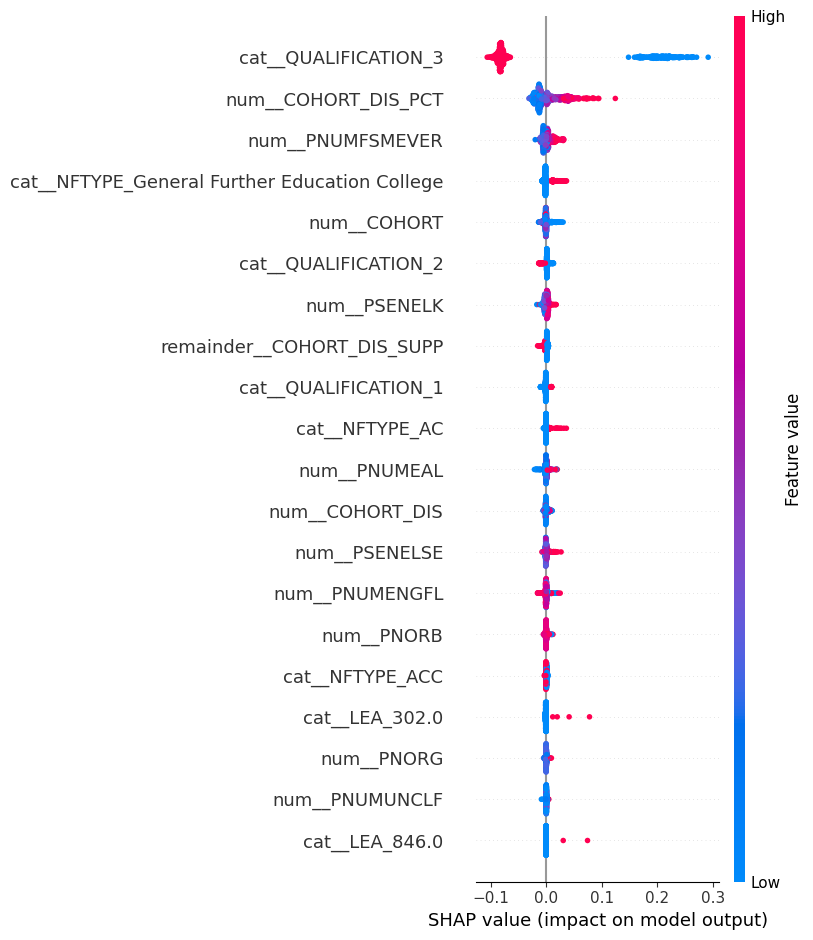

In [ ]:
import shap
# Imports the SHAP library, which is used for explaining the output of machine learning models.

# Access the trained model from the pipeline
best_model = grid_search.best_estimator_['model']  # Access the 'model' step
# Extracts the best trained model from the 'grid_search' object.
# It assumes that your pipeline in 'grid_search.best_estimator_' has a step named 'model'
# which contains the actual machine learning model (e.g., RandomForestRegressor).

# Create a SHAP explainer
explainer = shap.Explainer(best_model)
# Initializes a SHAP explainer object. This object takes the trained model as input
# and is used to compute SHAP values for the model's predictions.
# The 'Explainer' can automatically handle different types of models.

# Calculate SHAP values for a sample of data (e.g., X_test)
shap_values = explainer(X_test_transformed)  # Assuming X_test is your test data
# Calculates the SHAP values for each instance in the transformed test data ('X_test_transformed').
# SHAP values quantify the contribution of each feature to the prediction of each individual instance.
# It's important to use the transformed data as this is what the model was trained on.

# Summarize the SHAP values for all features
shap.summary_plot(shap_values, X_test_transformed, feature_names=X_test_transformed.columns)
# Generates a summary plot of the calculated SHAP values.
# This plot provides an overview of the importance of each feature and its relationship
# with the model's output. It shows the distribution of SHAP values for each feature,
# colored by the feature value. 'feature_names' ensures the plot labels the features correctly.

The SHAP value analysis of our fine-tuned Random Forest model reveals key school characteristics that significantly influence the prediction of lower outcome percentages.

The most impactful features include qualification level, where low values of `cat__QUALIFICATION_3 `(**corresponding to students pursuing Qualification Levels 1 or 2**) are strongly associated with higher predicted lower outcome percentages. This is indicated by the cluster of blue points (low feature values) with high positive SHAP values.

**The percentage of disadvantaged students in the cohort** (`num__COHORT_DIS_PCT`) is another critical predictor. **Higher percentages of disadvantaged students tend to increase the predicted lower outcome percentage** (as shown by the red points associated with positive SHAP values), while lower percentages correspond to reduced risk.

T**he proportion of pupils ever eligible for free school meals** (`num__PNUMFSMEVER`) shows a **more complex and less directional impact**. The distribution of SHAP values across both high and low feature values suggests that this variable does not consistently predict better or worse outcomes on its own, and may interact with other school characteristics.

**Categorical school type** (`cat__NFTYPE`) also influences the predictions. For example, being classified as a **'General Further Education College' is associated with a higher predicted lower outcome percentage**, as shown by the high SHAP values corresponding to this category.

**Cohort size** (`num__COHORT`) shows a more dispersed influence, but there is a slight tendency for larger cohort sizes to be associated with lower predicted lower outcome percentages.

**Implications for Targeting At-Risk Schools:**

This model provides a valuable framework for identifying schools that are at higher risk of having a larger percentage of students with lower qualification outcomes. By analyzing these key features for individual schools, educational authorities and policymakers can proactively target interventions and allocate resources more strategically.

For instance, schools with:

A high prevalence of cat__QUALIFICATION_1 and cat__QUALIFICATION_2, likely indicating a larger proportion of students pursuing lower-level qualifications.

A high current percentage of disadvantaged students (num__COHORT_DIS_PCT).

School type classifications such as 'General Further Education College', which are associated with elevated risk in the model.

...can be flagged as potentially higher risk.

This approach supports a more nuanced and data-driven allocation of support, moving beyond broad generalizations. Instead of one-size-fits-all strategies, interventions can be tailored to each school’s profile based on the model’s identified predictors. This can lead to more efficient and effective support, ultimately improving outcomes for students in the most vulnerable settings.

In conclusion, our Random Forest model, informed by SHAP value analysis, offers a practical and interpretable method for identifying schools exhibiting characteristics associated with higher predicted lower outcome percentages. The most influential features include the prevalence of lower qualification levels, the proportion of disadvantaged students, and school type. This insight can drive proactive, targeted strategies to reduce educational disparities.

# **13. Final Pipeline**

This carefully constructed `final_pipeline`, with its integrated and fine-tuned preprocessing, directly supports the final solution for predicting 'LOWER_OUTCOME_PCT'. By automating the data preparation steps in a consistent and optimized manner, the pipeline ensures:

* **Reliable and Consistent Predictions:** Any new data fed into this pipeline will undergo the exact same preprocessing steps as the training data, guaranteeing consistency and reliability in the model's predictions in a deployment scenario.
* **Simplified Deployment:** The entire process, from raw data to prediction, is encapsulated within a single `Pipeline` object (`rf_pipeline`). This simplifies deployment and management of the final solution, as only this single object needs to be maintained and applied to new data.
* **Reproducibility:** The fixed `random_state` in the Random Forest model ensures that the predictions are reproducible given the same input data.
* **Scalability:** The pipeline can be easily applied to larger datasets, making the final solution scalable for real-world application with increasing volumes of school data.

In essence, this fine-tuned pipeline is not just a preliminary step but an integral component of the final, deployable solution for accurately and reliably predicting lower outcome percentages in schools.

In [ ]:
preprocessing_pipeline = create_pipeline(
    num_features,
    cat_features,
    bool_features,
    dis_strategy='median',
    num_imputer='knn',
    output_as_df=True
)

final_pipeline = Pipeline([
    ('preprocessing', preprocessing_pipeline),
    ('model', RandomForestRegressor(random_state=42, max_depth=10, min_samples_split=2, n_estimators=300))
])
